In [ ]:
import sklearn

In [ ]:
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = fetch_20newsgroups(subset = 'all', shuffle = True, random_state = 0,remove=('headers','footers'))

In [ ]:
data = pd.DataFrame(data.data)

In [ ]:
categories = ['comp.graphics','comp.os.ms-windows.misc','comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware','rec.autos','rec.motorcycles','rec.sport.baseball','rec.sport.hockey']
data = fetch_20newsgroups(subset='all', categories=categories,shuffle=True, random_state=42,remove=('headers','footers'))
y = [0 if i<4 else 1 for i in data.target]

# TF-IDF Matrix

## Question 1
Report the dimensions of the TF-IDF matrix you obtain.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_vector = TfidfVectorizer(stop_words='english',min_df=3)
data_tfidf = tfidf_vector.fit_transform(data.data)
print("Shape of TF-IDF train matrix: ", data_tfidf.shape)

Shape of TF-IDF train matrix:  (7882, 23522)


# K MEANS


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0, max_iter=1000, n_init=30)
data_kmeans = kmeans.fit_predict(data_tfidf)

## Question 2 
Report the contingency table of your clustering result. You may use the provided plotmat.py to visualize the matrix. Does the contingency matrix have to be square-shaped?

In [ ]:
import plotmat
from plotmat import plot_mat
from sklearn.metrics.cluster import contingency_matrix

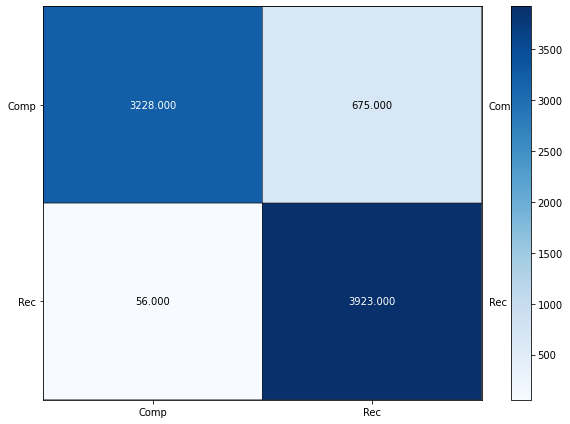

In [ ]:
plot_mat(contingency_matrix(y, kmeans.labels_), size = (8,6), xticklabels = ['Comp','Rec'],yticklabels = ['Comp','Rec'])

## Question 3 
Report the 5 clustering measures explained in the introduction for umap clustering.

In [ ]:
from sklearn.metrics.cluster import homogeneity_score, completeness_score, adjusted_rand_score, adjusted_mutual_info_score,v_measure_score

In [ ]:
print("Homogeneity score %f" %(homogeneity_score(y, data_kmeans)))
print("Completeness score %f" % (completeness_score(y, data_kmeans)))
print("V-measure score for %f" % (v_measure_score(y, data_kmeans)))
print("Adjusted Rand Index score %f" % (adjusted_rand_score(y, data_kmeans)))
print("Adjusted mutual information score %f" % (adjusted_mutual_info_score(y, data_kmeans)))

Homogeneity score 0.597026
Completeness score 0.609257
V-measure score for 0.603080
Adjusted Rand Index score 0.663391
Adjusted mutual information score 0.603043


# SVD

## Question 4
Report the plot of the percentage of variance that the top r principle components retain v.s. r, for r = 1 to 1000.


In [ ]:
from sklearn.decomposition import TruncatedSVD

In [ ]:
svd = TruncatedSVD(n_components=1000, random_state=42)

In [ ]:
train_svd = svd.fit_transform(data_tfidf) # performing LSI on the tfidf train matrix
exp_var_svd = svd.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_svd)

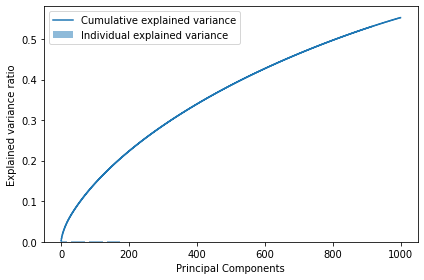

In [ ]:
  plt.bar(range(0,len(exp_var_svd)), exp_var_svd, alpha=0.5, align='center', label='Individual explained variance')
  plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
  plt.ylabel('Explained variance ratio')
  plt.xlabel('Principal Components')
  plt.legend(loc='best')
  plt.tight_layout()
  plt.show()

## Question 5
Let r be the dimension that we want to reduce the data to (i.e. n components).
Try r = 1 − 10, 20, 50, 100, 300, and plot the 5 measure scores v.s. r for both SVD and NMF. Report a good choice of r for SVD and NMF respectively.


In [ ]:
from sklearn.decomposition import NMF

In [ ]:
r = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 50, 100, 300]
svd_hs = []
svd_cs = []
svd_vms = []
svd_aris = []
svd_amis = []

nmf_hs = []
nmf_cs = []
nmf_vms = []
nmf_aris = []
nmf_amis = []

for k in r:
    svd_r = TruncatedSVD(n_components=k, random_state=42)
    data_svd = svd_r.fit_transform(data_tfidf)
    kmeans.fit(data_svd)
    svd_hs.append(homogeneity_score(y, kmeans.labels_))
    svd_cs.append(completeness_score(y, kmeans.labels_))
    svd_vms.append(v_measure_score(y, kmeans.labels_))
    svd_aris.append(adjusted_rand_score(y, kmeans.labels_))
    svd_amis.append(adjusted_mutual_info_score(y, kmeans.labels_))

    nmf_r = NMF(n_components=k, init='random', random_state=42, max_iter=1000)
    data_nmf = nmf_r.fit_transform(data_tfidf)
    kmeans.fit(data_nmf)
    nmf_hs.append(homogeneity_score(y, kmeans.labels_))
    nmf_cs.append(completeness_score(y, kmeans.labels_))
    nmf_vms.append(v_measure_score(y, kmeans.labels_))
    nmf_aris.append(adjusted_rand_score(y, kmeans.labels_))
    nmf_amis.append(adjusted_mutual_info_score(y, kmeans.labels_))

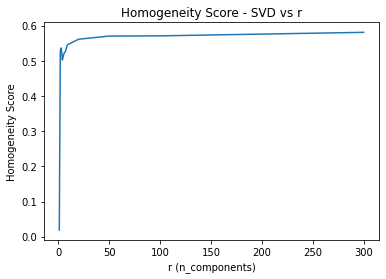

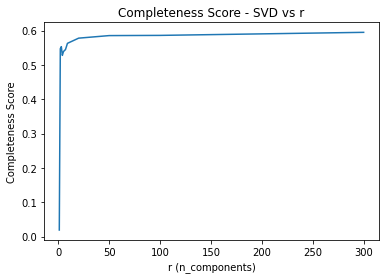

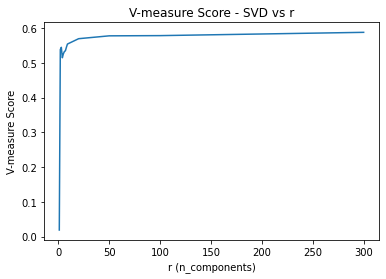

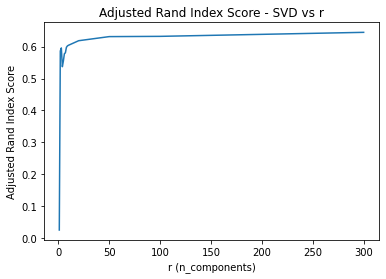

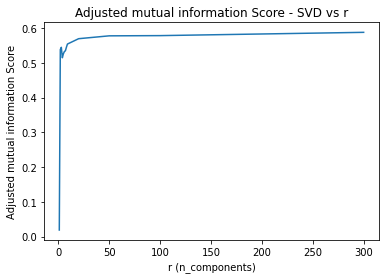

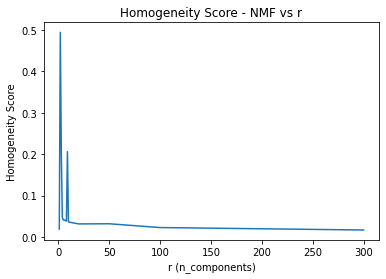

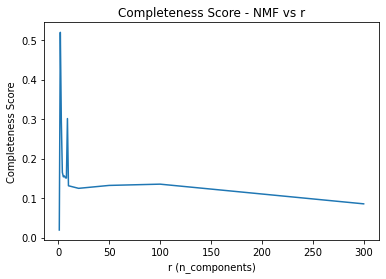

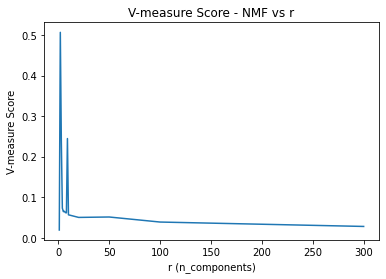

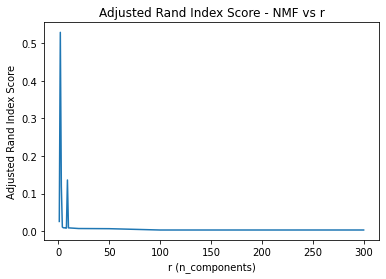

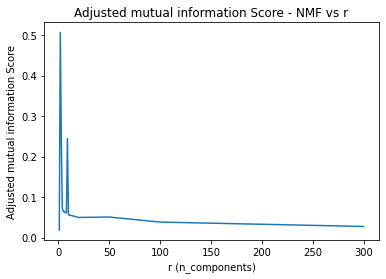

In [ ]:
# Homogeneity Score
plt.plot(r, svd_hs)
plt.title('Homogeneity Score - SVD vs r')
plt.ylabel('Homogeneity Score')
plt.xlabel('r (n_components)')
plt.show()

# Completeness Score
plt.plot(r, svd_cs)
plt.title('Completeness Score - SVD vs r')
plt.ylabel('Completeness Score')
plt.xlabel('r (n_components)')
plt.show()

# V-measure Score
plt.plot(r, svd_vms)
plt.title('V-measure Score - SVD vs r')
plt.ylabel('V-measure Score')
plt.xlabel('r (n_components)')
plt.show()

# Adjusted Rand Index Score
plt.plot(r, svd_aris)
plt.title('Adjusted Rand Index Score - SVD vs r')
plt.ylabel('Adjusted Rand Index Score')
plt.xlabel('r (n_components)')
plt.show()

# Adjusted mutual information Score
plt.plot(r, svd_amis)
plt.title('Adjusted mutual information Score - SVD vs r')
plt.ylabel('Adjusted mutual information Score')
plt.xlabel('r (n_components)')
plt.show()

plt.plot(r, nmf_hs)
plt.title('Homogeneity Score - NMF vs r')
plt.ylabel('Homogeneity Score')
plt.xlabel('r (n_components)')
plt.show()

plt.plot(r, nmf_cs)
plt.title('Completeness Score - NMF vs r')
plt.ylabel('Completeness Score')
plt.xlabel('r (n_components)')
plt.show()

plt.plot(r, nmf_vms)
plt.title('V-measure Score - NMF vs r')
plt.ylabel('V-measure Score')
plt.xlabel('r (n_components)')
plt.show()

plt.plot(r, nmf_aris)
plt.title('Adjusted Rand Index Score - NMF vs r')
plt.ylabel('Adjusted Rand Index Score')
plt.xlabel('r (n_components)')
plt.show()

plt.plot(r, nmf_amis)
plt.title('Adjusted mutual information Score - NMF vs r')
plt.ylabel('Adjusted mutual information Score')
plt.xlabel('r (n_components)')
plt.show()

## Question 6:
How do you explain the non-monotonic behavior of the measures as r
increases?

## Question 7
Are these measures on average better than those computed in Question
3?

In [ ]:
average_SVD = []
average_NMF = []
bestSVD = 0
bestNMF = 0

In [ ]:
for i in range(len(r)):
  average_SVD.append((svd_hs[i] + svd_cs[i] + svd_aris[i] + svd_amis[i] + svd_vms[i]) / 5)
  if(average_SVD[i] > bestSVD):
    bestSVD = average_SVD[i]
    best_r_SVD = r[i]

for i in range(len(r)):
  average_NMF.append((nmf_hs[i] + nmf_cs[i] + nmf_aris[i] + nmf_amis[i] + nmf_vms[i]) / 5)
  if(average_NMF[i] > bestNMF):
    bestNMF = average_NMF[i]
    best_r_NMF = r[i]

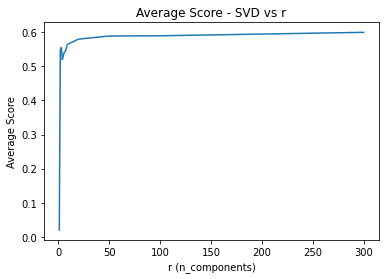

In [ ]:
plt.plot(r, average_SVD)
plt.title('Average Score - SVD vs r')
plt.ylabel('Average Score')
plt.xlabel('r (n_components)')
plt.show()



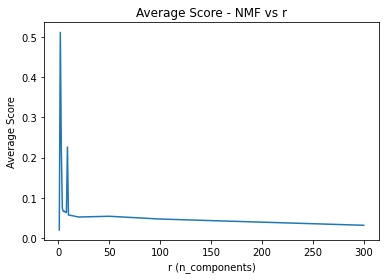

In [ ]:
plt.plot(r, average_NMF)
plt.title('Average Score - NMF vs r')
plt.ylabel('Average Score')
plt.xlabel('r (n_components)')
plt.show()

In [ ]:
print('Best Average SVD values: ',bestSVD)
print('Number of principal components for Best SVD ',best_r_SVD)

print('Best Average NMF values: ',bestNMF)
print('Number of principal components for Best NMF ',best_r_NMF)

Best Average SVD values:  0.5993426580991089
Number of principal components for Best SVD  300
Best Average NMF values:  0.5114096565949626
Number of principal components for Best NMF  2


## Question 8
Visualize the clustering results for <br>
• SVD with your optimal choice of r for K-Means clustering. <br>
• NMF with your choice of r for K-Means clustering.

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0, max_iter=1000, n_init=30)

In [ ]:
## SVD
svd_best = TruncatedSVD(n_components=100, random_state=42)
data_svd_best = svd_best.fit_transform(data_tfidf)
kmeans.fit(data_svd_best)

KMeans(max_iter=1000, n_clusters=2, n_init=30, random_state=0)

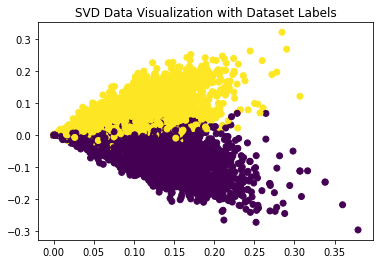

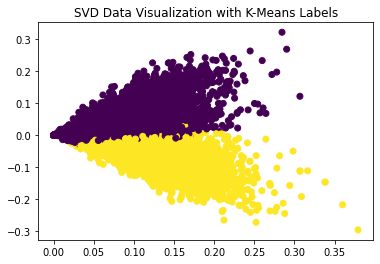

In [ ]:
plt.scatter(data_svd_best[:,0], data_svd_best[:,1], c = y)
plt.title("SVD Data Visualization with Dataset Labels")
plt.show()
plt.scatter(data_svd_best[:,0], data_svd_best[:,1],c = kmeans.labels_)
plt.title("SVD Data Visualization with K-Means Labels")
plt.show()

In [ ]:
## NMF
nmf_best = NMF(n_components=2, init='random', random_state=42, max_iter=1000)
data_nmf_best = nmf_best.fit_transform(data_tfidf)
kmeans.fit(data_nmf_best)

KMeans(max_iter=1000, n_clusters=2, n_init=30, random_state=0)

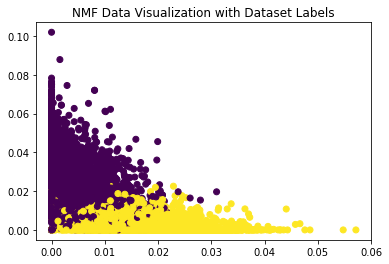

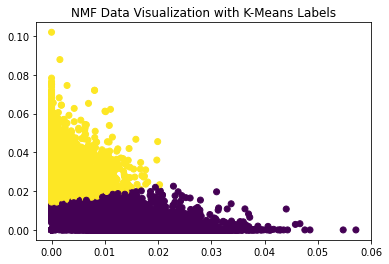

In [ ]:
plt.scatter(data_nmf_best[:,0], data_nmf_best[:,1], c = y)
plt.title("NMF Data Visualization with Dataset Labels")
plt.show()
plt.scatter(data_nmf_best[:,0], data_nmf_best[:,1],c = kmeans.labels_)
plt.title("NMF Data Visualization with K-Means Labels")
plt.show()

## Question 9:
**What** do you observe in the visualization? How are the data points of the
two classes distributed? Is distribution of the data ideal for K-Means clustering?


## Question 10
Load documents with the same configuration as in Question 1, but for
ALL 20 categories. Construct the TF-IDF matrix, reduce its dimensionality using BOTH NMF
and SVD (specify settings you choose and why), and perform K-Means clustering with k=20 .
Visualize the contingency matrix and report the five clustering metrics (DO BOTH
NMF AND SVD).

In [ ]:
from scipy.optimize import linear_sum_assignment
from sklearn.metrics import confusion_matrix

In [ ]:
data= fetch_20newsgroups(subset = 'all',shuffle = True, random_state = 0,remove=('headers','footers'))

In [ ]:
tfidf_vector = TfidfVectorizer(stop_words='english',min_df=3)
data_tfidf = tfidf_vector.fit_transform(data.data)
print("Shape of TF-IDF train matrix: ", data_tfidf.shape)

Shape of TF-IDF train matrix:  (18846, 45365)


In [ ]:
svd_best_all = TruncatedSVD(n_components=100, random_state=42)
data_svd_best_all = svd_best_all.fit_transform(data_tfidf)

nmf_best_all = NMF(n_components=2, init='random', random_state=42, max_iter=1000)
data_nmf_best_all = nmf_best_all.fit_transform(data_tfidf)

In [ ]:
kmeans = KMeans(n_clusters=20, random_state=0, max_iter=1000, n_init=30)
svd_best_all_kmeans = kmeans.fit_predict(data_svd_best_all)

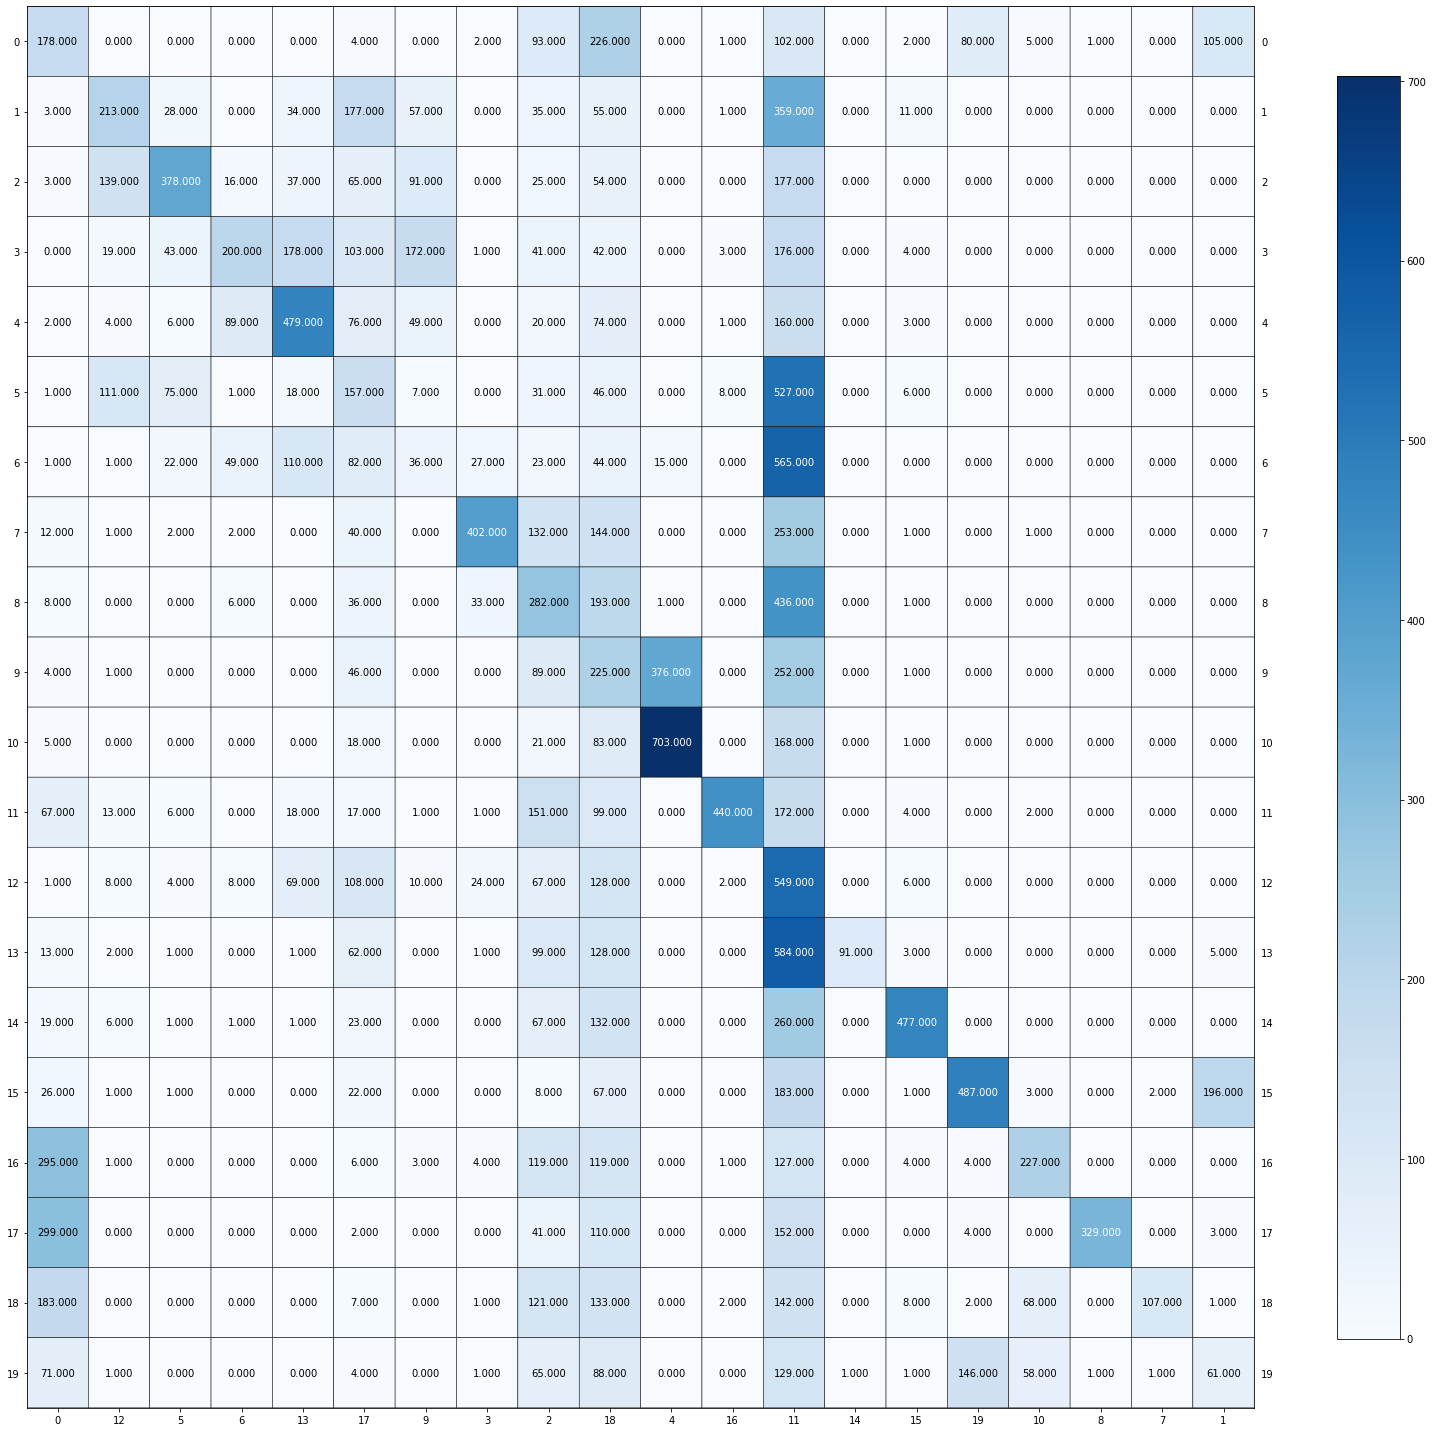

In [ ]:
cm = confusion_matrix(data.target, svd_best_all_kmeans)
rows, cols = linear_sum_assignment(cm, maximize=True)
plot_mat(cm[rows[:, np.newaxis], cols], xticklabels=cols,yticklabels=rows, size=(20,20))

In [ ]:
print("Homogeneity score %f" %(homogeneity_score(data.target, svd_best_all_kmeans)))
print("Completeness score %f" % (completeness_score(data.target, svd_best_all_kmeans)))
print("V-measure score for %f" % (v_measure_score(data.target, svd_best_all_kmeans)))
print("Adjusted Rand Index score %f" % (adjusted_rand_score(data.target, svd_best_all_kmeans)))
print("Adjusted mutual information score %f" % (adjusted_mutual_info_score(data.target, svd_best_all_kmeans)))

Homogeneity score 0.322839
Completeness score 0.382313
V-measure score for 0.350068
Adjusted Rand Index score 0.102337
Adjusted mutual information score 0.347778


In [ ]:
kmeans = KMeans(n_clusters=20, random_state=0, max_iter=1000, n_init=30)
nmf_best_all_kmeans = kmeans.fit_predict(data_nmf_best_all)

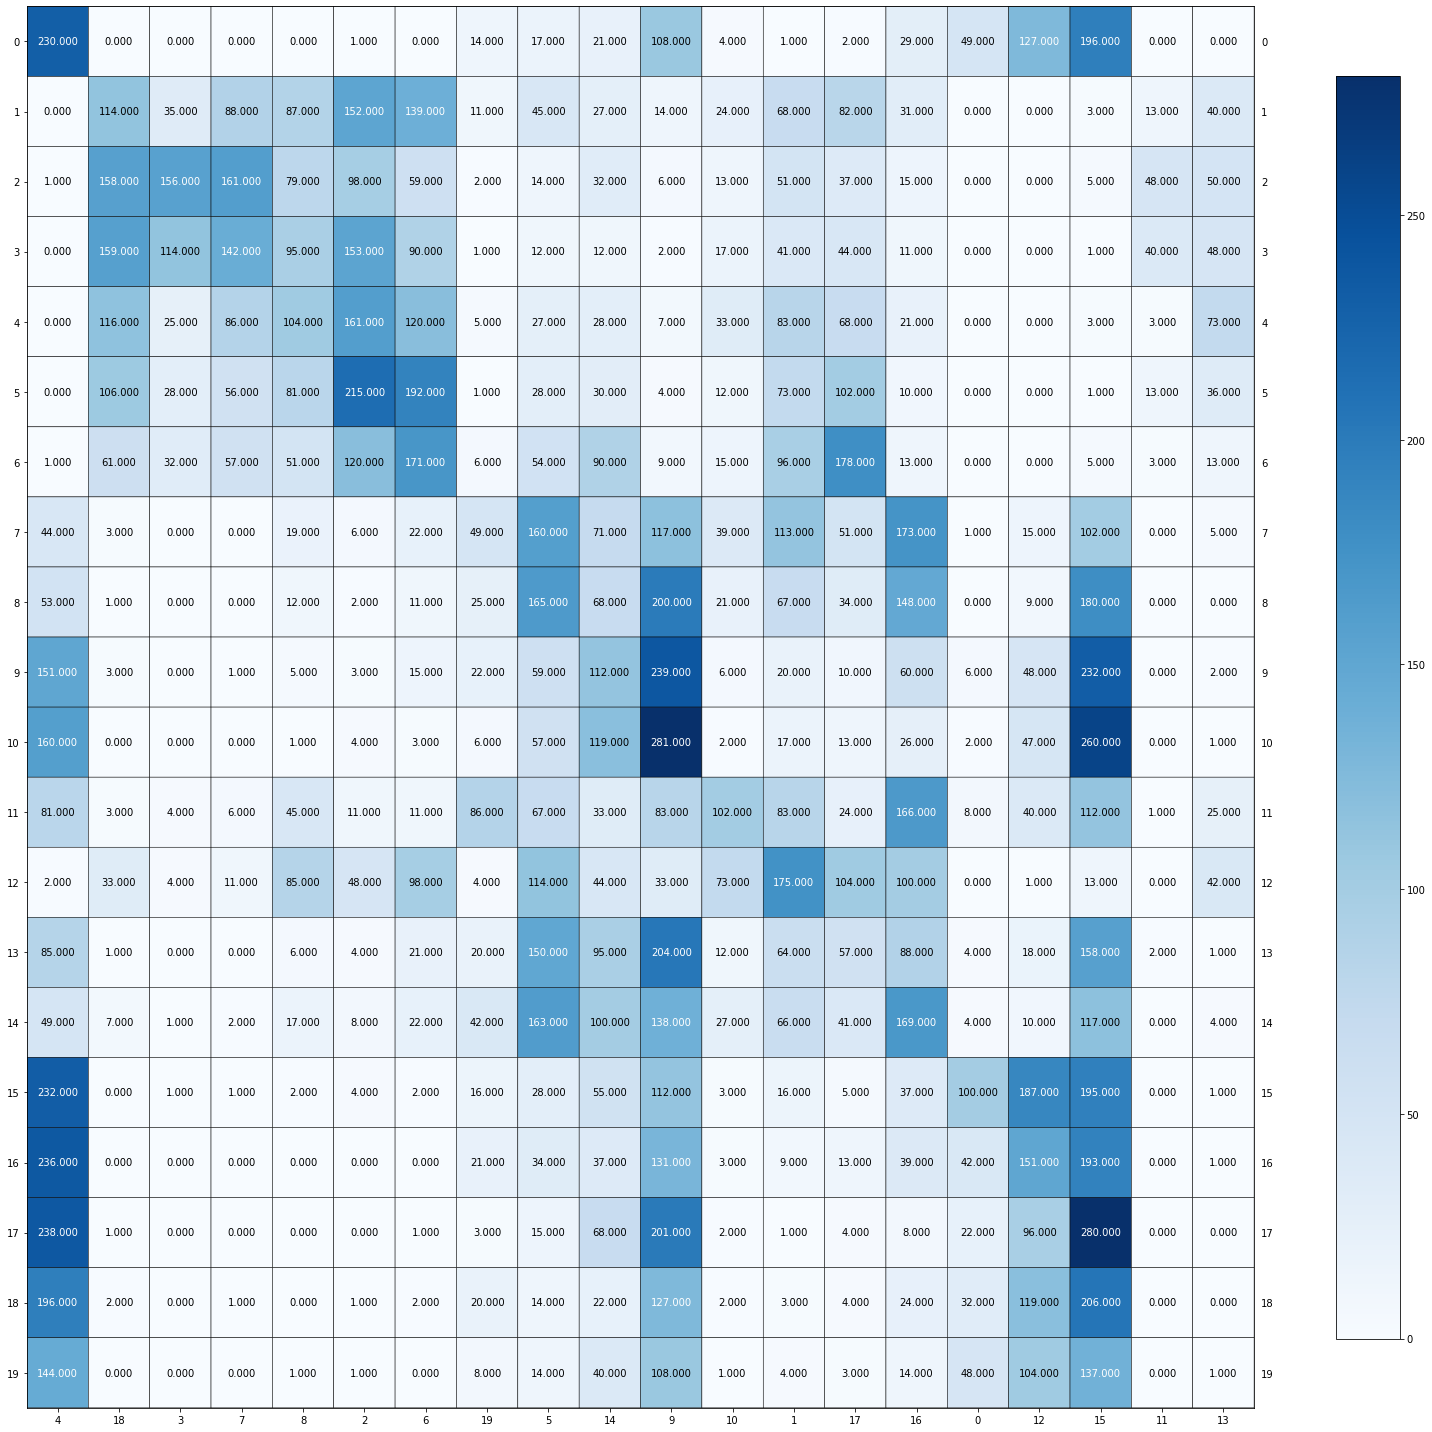

In [ ]:
cm = confusion_matrix(data.target, nmf_best_all_kmeans)
rows, cols = linear_sum_assignment(cm, maximize=True)
plot_mat(cm[rows[:, np.newaxis], cols], xticklabels=cols,yticklabels=rows, size=(20,20))

In [ ]:
print("Homogeneity score %f" %(homogeneity_score(data.target, nmf_best_all_kmeans)))
print("Completeness score %f" % (completeness_score(data.target, nmf_best_all_kmeans)))
print("V-measure score for %f" % (v_measure_score(data.target, nmf_best_all_kmeans)))
print("Adjusted Rand Index score %f" % (adjusted_rand_score(data.target, nmf_best_all_kmeans)))
print("Adjusted mutual information score %f" % (adjusted_mutual_info_score(data.target, nmf_best_all_kmeans)))

Homogeneity score 0.191225
Completeness score 0.204051
V-measure score for 0.197430
Adjusted Rand Index score 0.056887
Adjusted mutual information score 0.194748


# UMAP

## Question 11
Reduce the dimension of your dataset with UMAP. Consider the following
settings: n components = [5, 20, 200], metric = ”cosine” vs. ”euclidean”. If ”cosine” metric
fails, please look at the FAQ at the end of this spec.
Report the permuted contingency matrix and the five clustering evaluation metrics
for the different combinations (6 combinations).

In [ ]:
!pip install umap-learn

In [ ]:
import umap

5
Contigency Matrix for Eucledian distance and r: 5


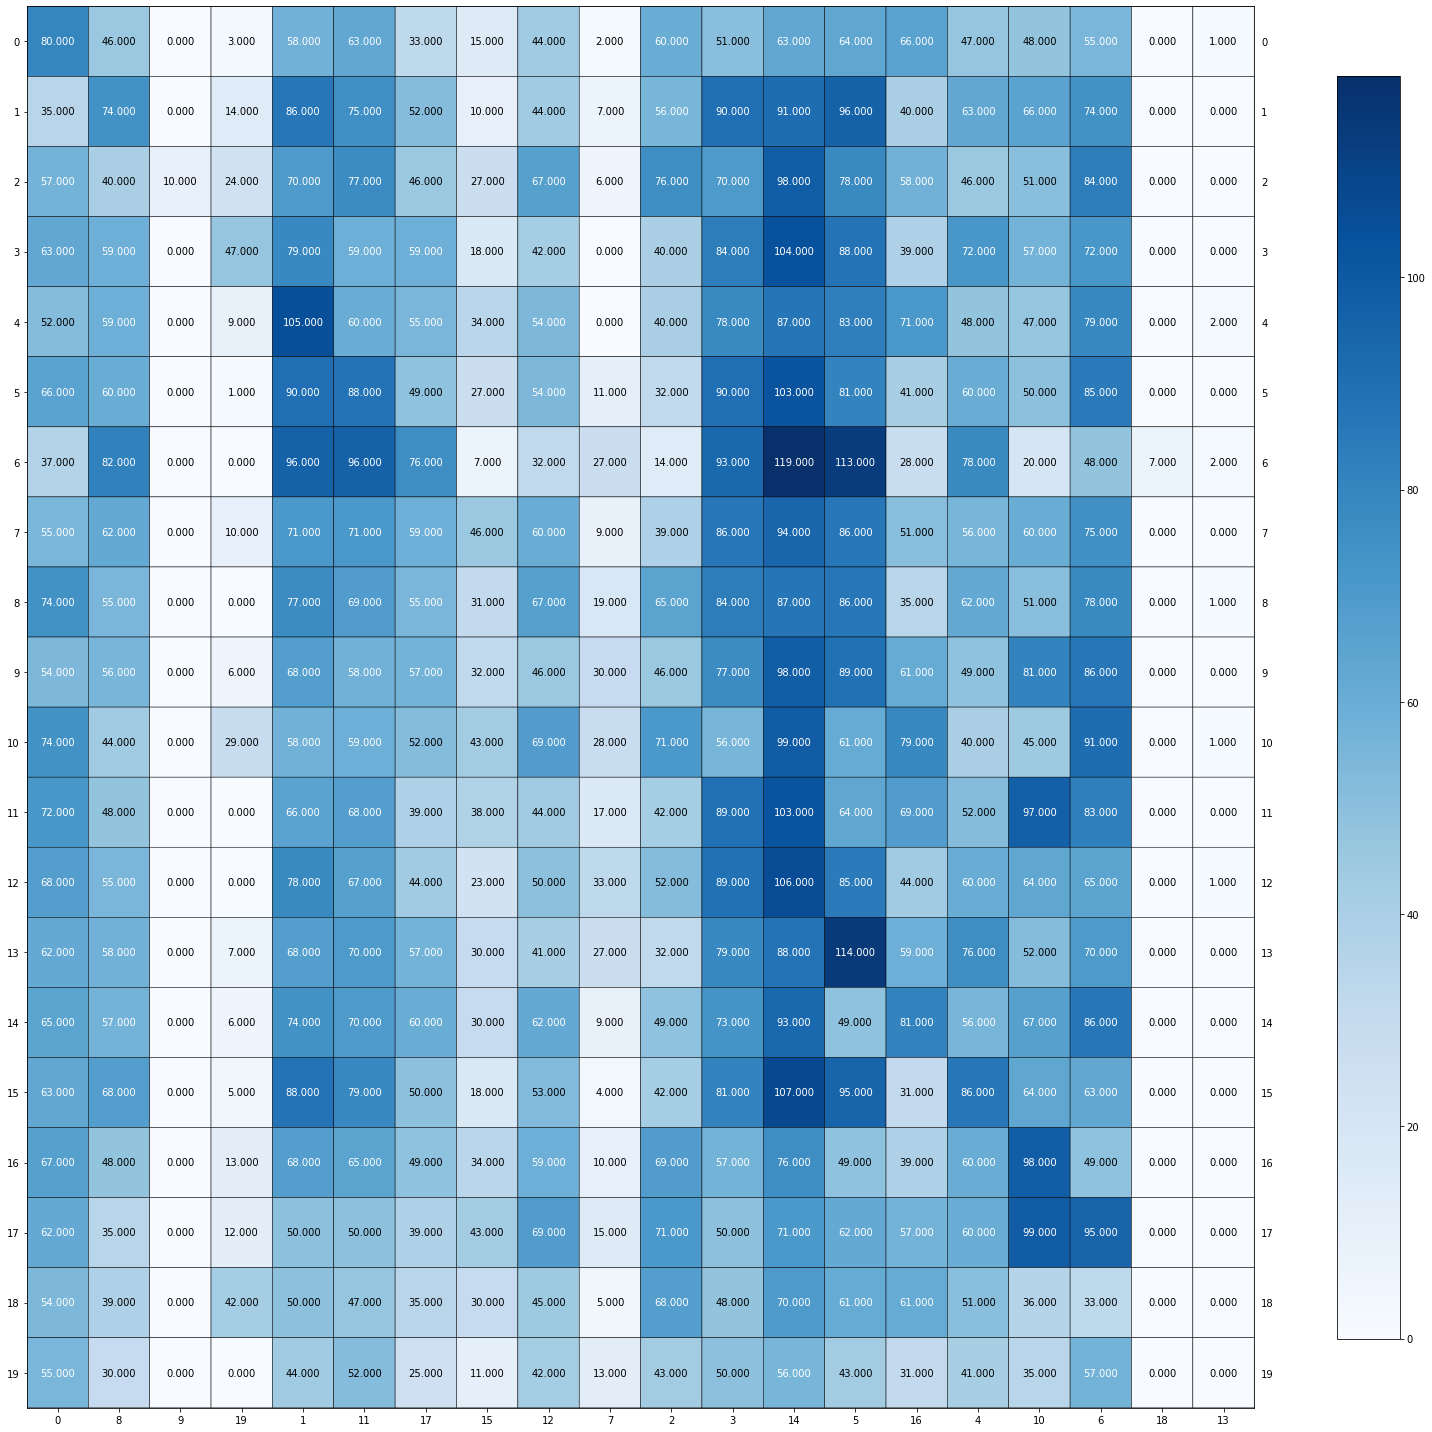

Homogeneity score for Eucledian distance and r:  5 is: 0.013201571294227905
Completeness score Eucledian distance and r:  5 is: 0.014324582999413662
V-measure score for Eucledian distance and r:  5 is: 0.013740168837935158
Adjusted Rand Index score Eucledian distance and r:  5 is: 0.0021297173566914014
Adjusted mutual information score Eucledian distance and r:  5 is: 0.010443723229452593
Contigency Matrix for Cosine distance and r: 5


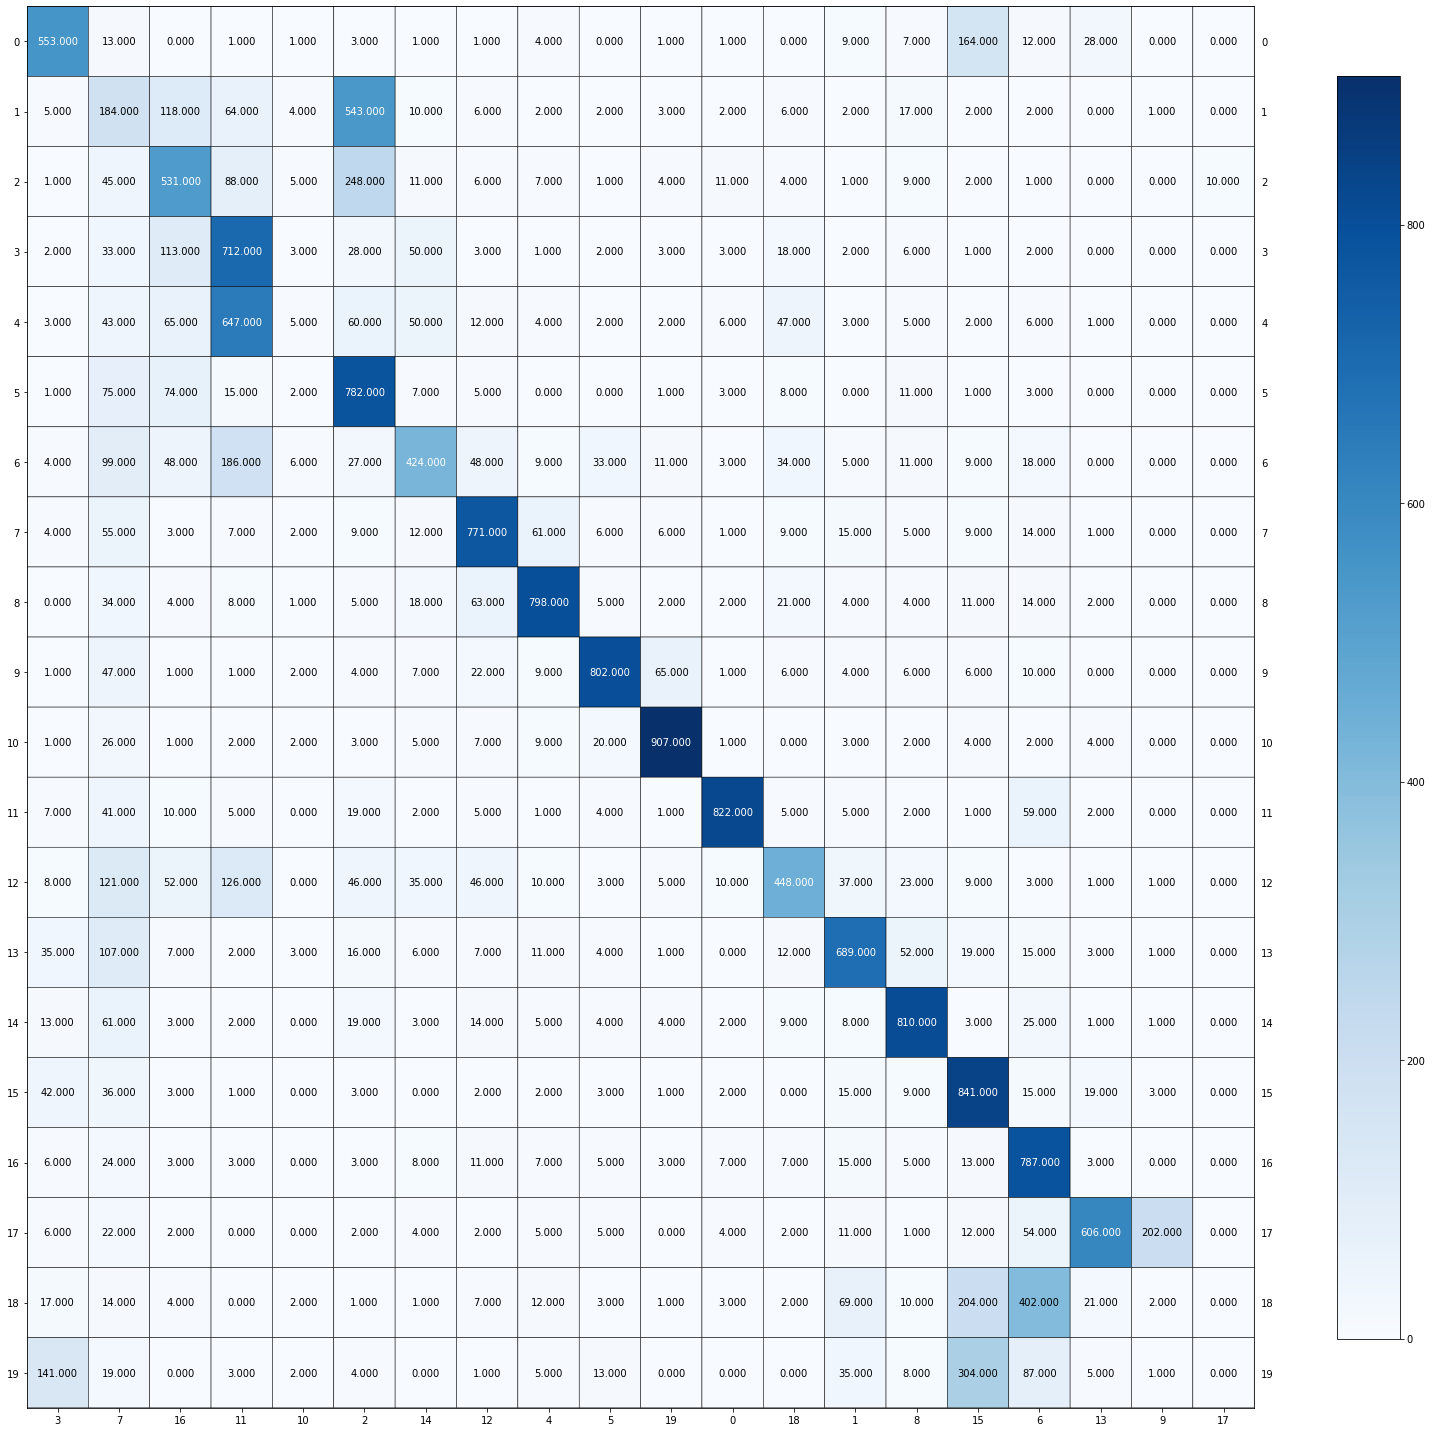

Homogeneity score for Cosine distance and r:  5 is: 0.564640820012694
Completeness score Cosine distance and r:  5 is: 0.5984160414548009
V-measure score for Cosine distance and r:  5 is: 0.5810380137897195
Adjusted Rand Index score Cosine distance and r:  5 is: 0.44633543354651356
Adjusted mutual information score Cosine distance and r:  5 is: 0.5796337693846123
20
Contigency Matrix for Eucledian distance and r: 20


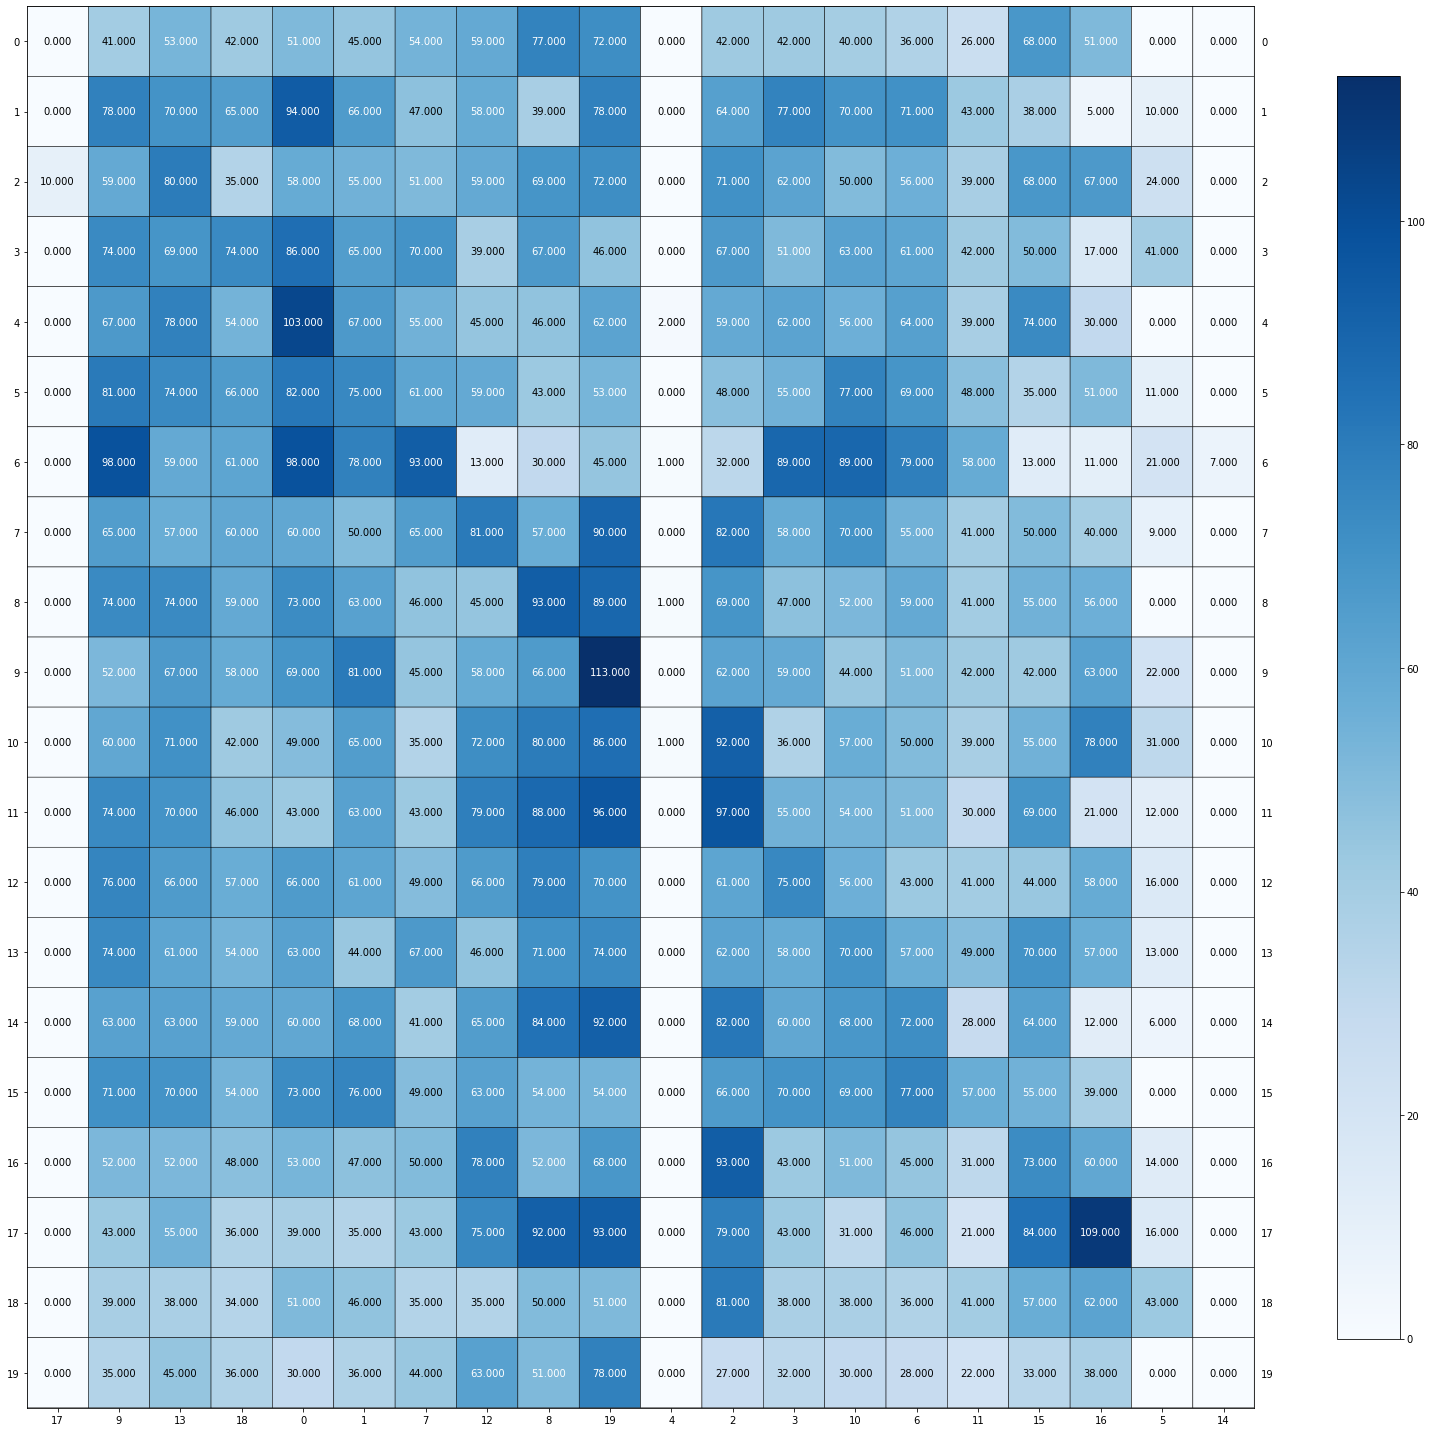

Homogeneity score for Eucledian distance and r:  20 is: 0.014946894850124227
Completeness score Eucledian distance and r:  20 is: 0.015927768917368346
V-measure score for Eucledian distance and r:  20 is: 0.01542175092158525
Adjusted Rand Index score Eucledian distance and r:  20 is: 0.0030859098464731654
Adjusted mutual information score Eucledian distance and r:  20 is: 0.0121902039818123
Contigency Matrix for Cosine distance and r: 20


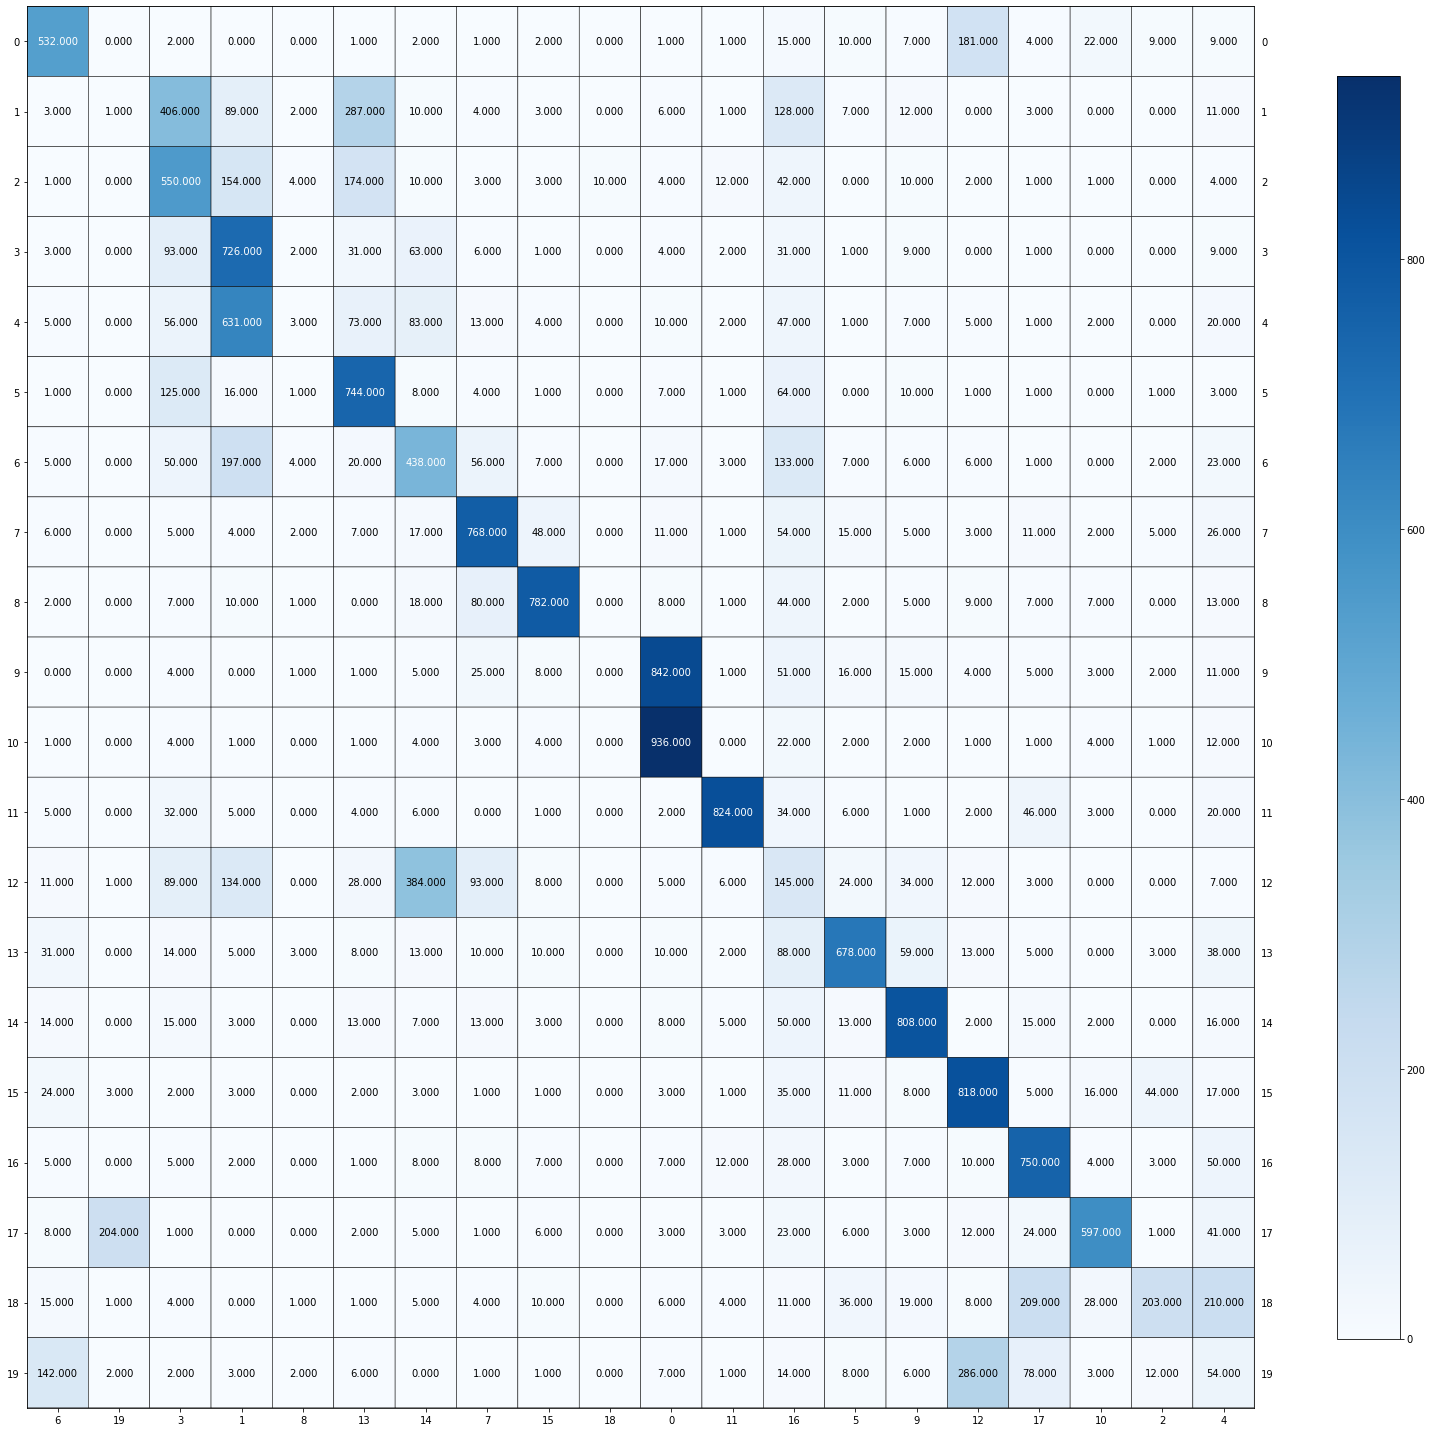

Homogeneity score for Cosine distance and r:  20 is: 0.5464131660888151
Completeness score Cosine distance and r:  20 is: 0.584132311238327
V-measure score for Cosine distance and r:  20 is: 0.5646435141257959
Adjusted Rand Index score Cosine distance and r:  20 is: 0.42330737546920577
Adjusted mutual information score Cosine distance and r:  20 is: 0.5631756232418669
200
Contigency Matrix for Eucledian distance and r: 200


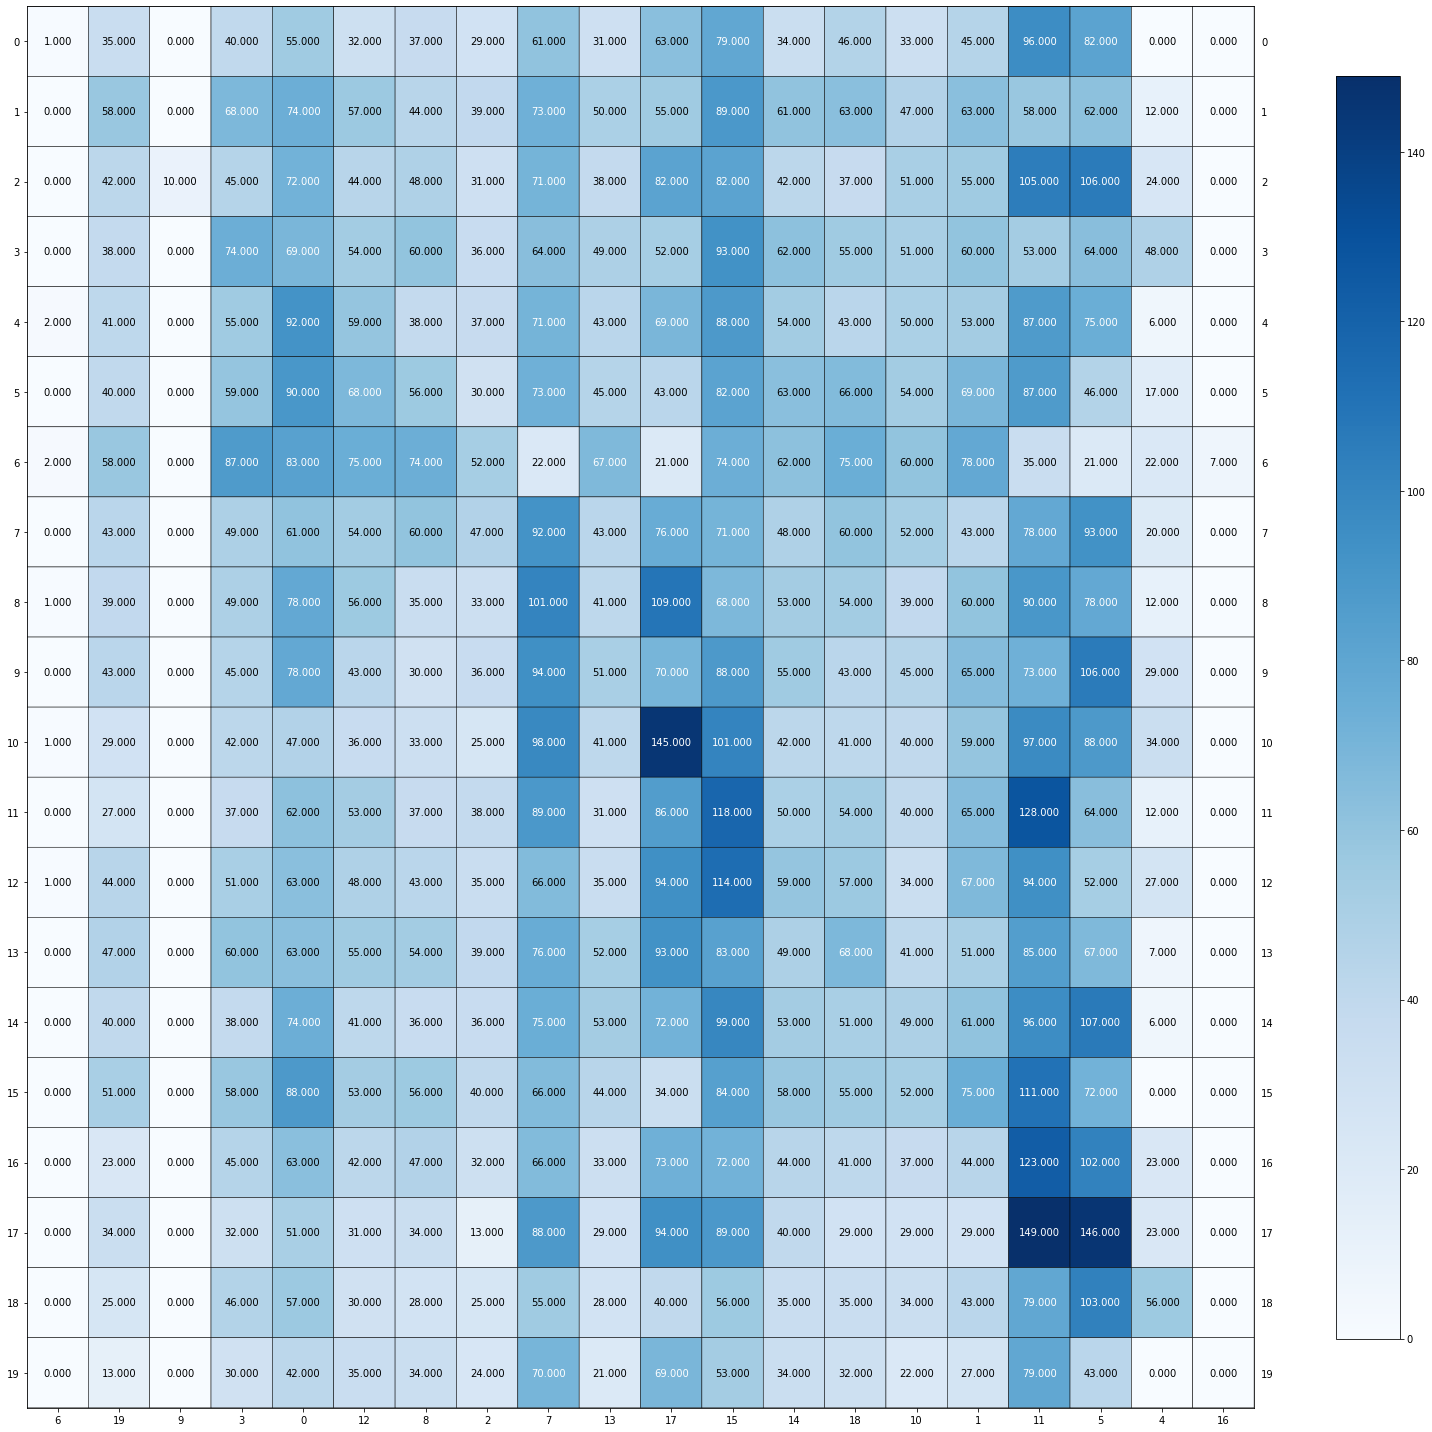

Homogeneity score for Eucledian distance and r:  200 is: 0.013522811739897774
Completeness score Eucledian distance and r:  200 is: 0.014538087528705501
V-measure score for Eucledian distance and r:  200 is: 0.01401208270818369
Adjusted Rand Index score Eucledian distance and r:  200 is: 0.003121930672296217
Adjusted mutual information score Eucledian distance and r:  200 is: 0.010733746860653402
Contigency Matrix for Cosine distance and r: 200


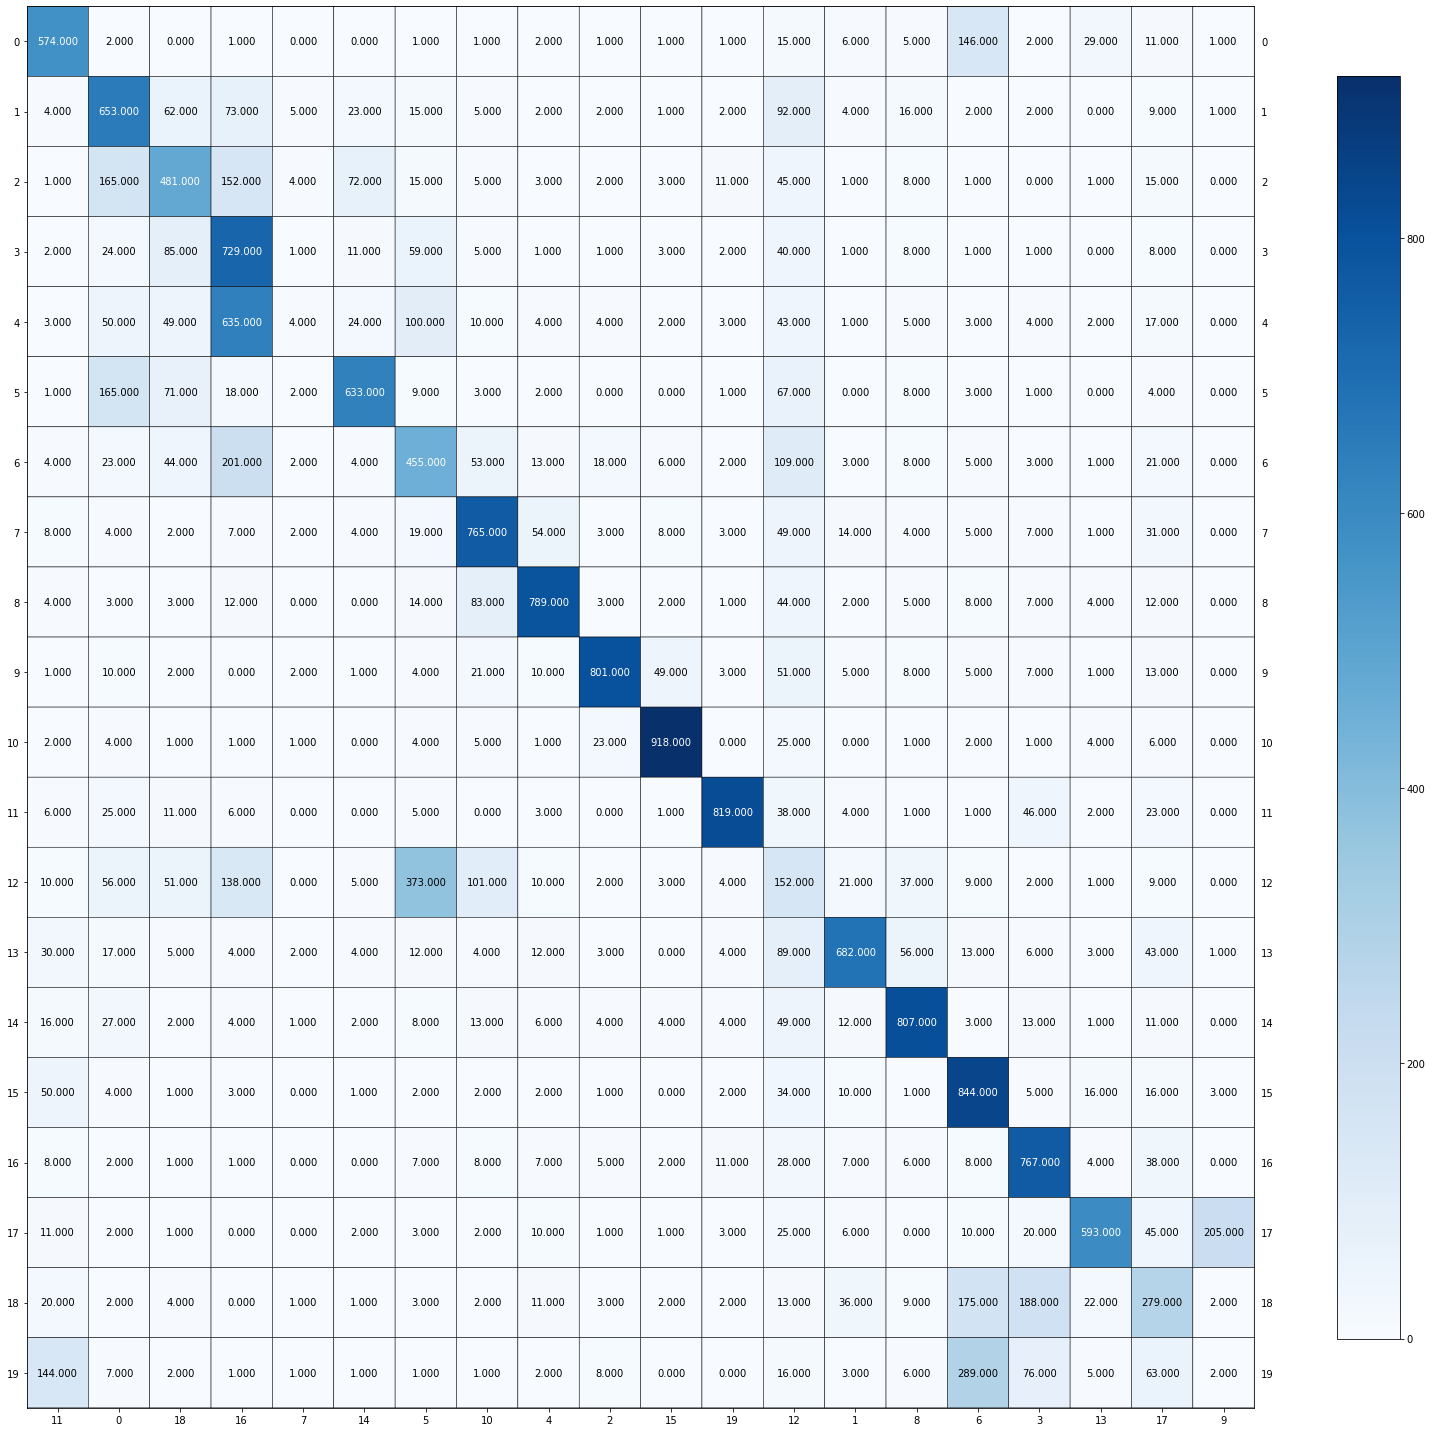

Homogeneity score for Cosine distance and r:  200 is: 0.5731739043906847
Completeness score Cosine distance and r:  200 is: 0.5934202105285515
V-measure score for Cosine distance and r:  200 is: 0.5831213695716947
Adjusted Rand Index score Cosine distance and r:  200 is: 0.45583754469343957
Adjusted mutual information score Cosine distance and r:  200 is: 0.5817400206931121


In [ ]:
components = [5,20,200]
umap_cos_hs = []
umap_cos_cs = []
umap_cos_vms = []
umap_cos_aris = []
umap_cos_amis = []

umap_euc_hs = []
umap_euc_cs = []
umap_euc_vms = []
umap_euc_aris = []
umap_euc_amis = []

umap= umap(max_iter=1000, n_clusters=20, n_init=30, random_state=0)

for r in components:
    print(r)
    umap_all = umap.UMAP(n_components=r, metric='euclidean')
    data_umap = umap_all.fit_transform(data_tfidf)

    umap_umap_euc = umap.fit_predict(data_umap)

    cm = confusion_matrix(data.target, umap_umap_euc)
    rows, cols = linear_sum_assignment(cm, maximize=True)
    print("Contigency Matrix for Eucledian distance and r:",r)
    plot_mat(cm[rows[:, np.newaxis], cols], xticklabels=cols,yticklabels=rows, size=(20,20))

    umap_euc_hs.append(homogeneity_score(data.target, umap.labels_))
    umap_euc_cs.append(completeness_score(data.target, umap.labels_))
    umap_euc_vms.append(v_measure_score(data.target, umap.labels_))
    umap_euc_aris.append(adjusted_rand_score(data.target, umap.labels_))
    umap_euc_amis.append(adjusted_mutual_info_score(data.target, umap.labels_))

    print("Homogeneity score for Eucledian distance and r: ",r,"is:",homogeneity_score(data.target, umap.labels_))
    print("Completeness score Eucledian distance and r: ",r,"is:",(completeness_score(data.target, umap.labels_)))
    print("V-measure score for Eucledian distance and r: ",r,"is:",(v_measure_score(data.target, umap.labels_)))
    print("Adjusted Rand Index score Eucledian distance and r: ",r,"is:",(adjusted_rand_score(data.target, umap.labels_)))
    print("Adjusted mutual information score Eucledian distance and r: ",r,"is:",(adjusted_mutual_info_score(data.target, umap.labels_)))

        
    umap_all = umap.UMAP(n_components=r, metric='cosine')
    data_umap = umap_all.fit_transform(data_tfidf)
    
    umap_umap_cos = umap.fit_predict(data_umap)
    
    cm = confusion_matrix(data.target, umap_umap_cos)
    rows, cols = linear_sum_assignment(cm, maximize=True)
    print("Contigency Matrix for Cosine distance and r:",r)
    plot_mat(cm[rows[:, np.newaxis], cols], xticklabels=cols,yticklabels=rows, size=(20,20))

    umap_cos_hs.append(homogeneity_score(data.target, umap.labels_))
    umap_cos_cs.append(completeness_score(data.target, umap.labels_))
    umap_cos_vms.append(v_measure_score(data.target, umap.labels_))
    umap_cos_aris.append(adjusted_rand_score(data.target, umap.labels_))
    umap_cos_amis.append(adjusted_mutual_info_score(data.target, umap.labels_))

    print("Homogeneity score for Cosine distance and r: ",r,"is:",homogeneity_score(data.target, umap.labels_))
    print("Completeness score Cosine distance and r: ",r,"is:",(completeness_score(data.target, umap.labels_)))
    print("V-measure score for Cosine distance and r: ",r,"is:",(v_measure_score(data.target, umap.labels_)))
    print("Adjusted Rand Index score Cosine distance and r: ",r,"is:",(adjusted_rand_score(data.target, umap.labels_)))
    print("Adjusted mutual information score Cosine distance and r: ",r,"is:",(adjusted_mutual_info_score(data.target, umap.labels_)))

In [ ]:
average_umap_euc = []
average_umap_cos = []
best_umap_euc = 0
best_umap_cos = 0
best_umap_euc_component = 0
best_umap_cos_component = 0

In [ ]:
for i in range(len(components)):
  average_umap_euc.append((umap_euc_hs[i] + umap_euc_cs[i] + umap_euc_vms[i] + umap_euc_aris[i] + umap_euc_amis[i]) / 5)
  if(average_umap_euc[i] > best_umap_euc):
    best_umap_euc = average_umap_euc[i]
    best_umap_euc_component = components[i]

for i in range(len(components)):
  average_umap_cos.append((umap_cos_hs[i] + umap_cos_cs[i] + umap_cos_vms[i] + umap_cos_aris[i] + umap_cos_amis[i]) / 5)
  if(average_umap_cos[i] > best_umap_cos):
    best_umap_cos = average_umap_cos[i]
    best_umap_cos_component = components[i]

In [ ]:
print('Best Average Eucledian UMAP values: ',best_umap_euc)
print('Number of principal components for Best Eucledian UMAP ',best_umap_euc_component)

print('Best Average Cosine UMAP values: ',best_umap_cos)
print('Number of principal components for Best Cosine UMAP ',best_umap_cos_component)

Best Average Eucledian UMAP values:  0.012314505703472658
Number of principal components for Best Eucledian UMAP  20
Best Average Cosine UMAP values:  0.5574586099754966
Number of principal components for Best Cosine UMAP  200


## Question 12
Analyze the contingency matrices. Which setting works best and why?
What about for each metric choice?

## Question 13
So far, we have attempted K-Means clustering with 4 different representation
learning techniques (sparse TF-IDF representation, PCA-reduced, NMF-reduced, UMAP-reduced).
Compare and contrast the clustering results across the 4 choices, and suggest an approach that is
best for the K-Means clustering task on the 20-class text data. Choose any choice of clustering
metrics for your comparison.

In [ ]:
#Use above results

SyntaxError: invalid syntax (<ipython-input-49-b2a661396c1c>, line 1)

# Agglomerative Clustering

## Question 14 
Use UMAP to reduce the dimensionality properly, and perform Agglomerative clustering with n_clusters=20 . Compare the performance of “ward” and “single”
linkage criteria.

In [ ]:
from sklearn.cluster import AgglomerativeClustering

5
Contigency Matrix for Ward Agglomerative clustering and r: 5


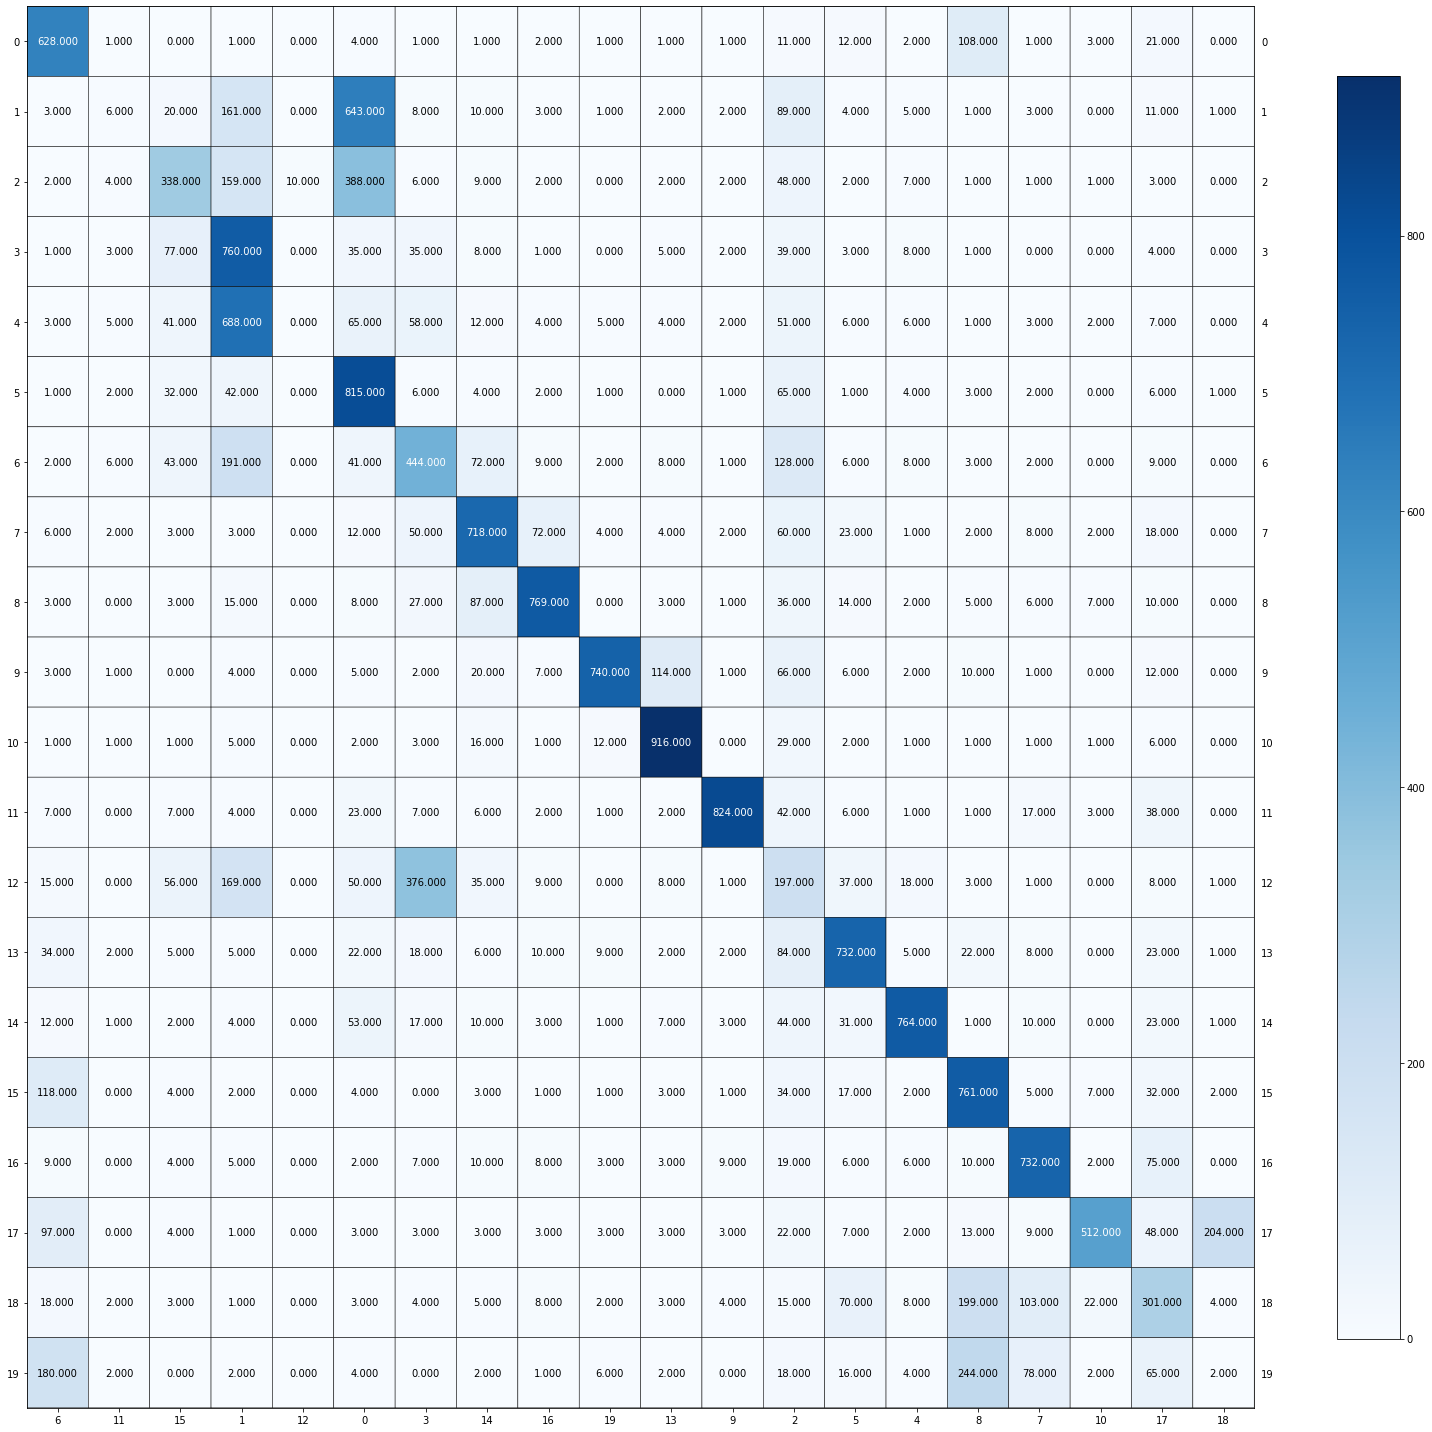

Homogeneity score for Ward and r:  5 is: 0.5514394136954165
Completeness score Ward and r:  5 is: 0.5883478016804922
V-measure score for Ward and r:  5 is: 0.5692960272425518
Adjusted Rand Index score for Ward and r:  5 is: 0.41803871344469407
Adjusted mutual information score for Ward and r:  5 is: 0.5678472507975707
Contigency Matrix for Single Agglomerative clustering and r: 5


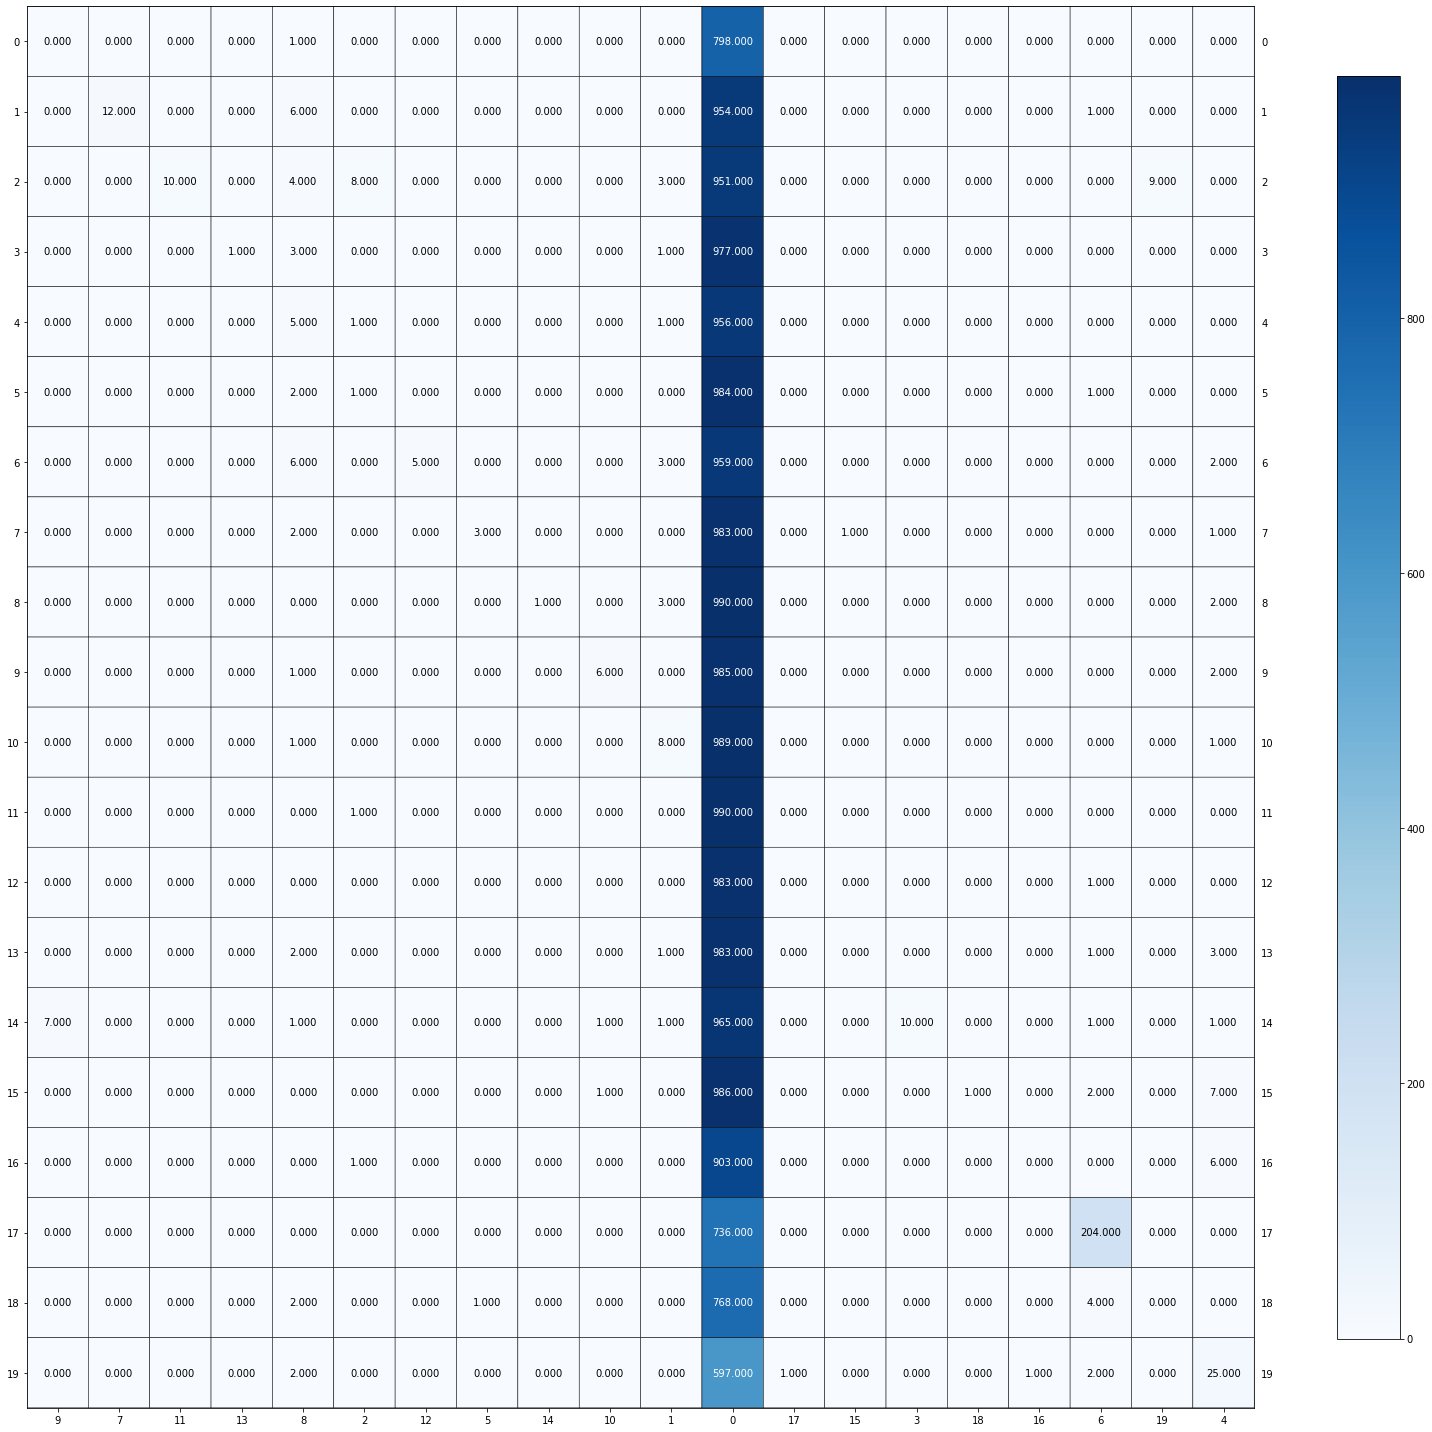

Homogeneity score for Single Agg and r:  5 is: 0.016780327061437412
Completeness score Single Agg and r:  5 is: 0.35072830170510977
V-measure score for Single Agg and r:  5 is: 0.03202828533341885
Adjusted Rand Index score Single Agg and r:  5 is: 0.0005844141546700221
Adjusted mutual information score Single Agg and r:  5 is: 0.02734818081035395
20
Contigency Matrix for Ward Agglomerative clustering and r: 20


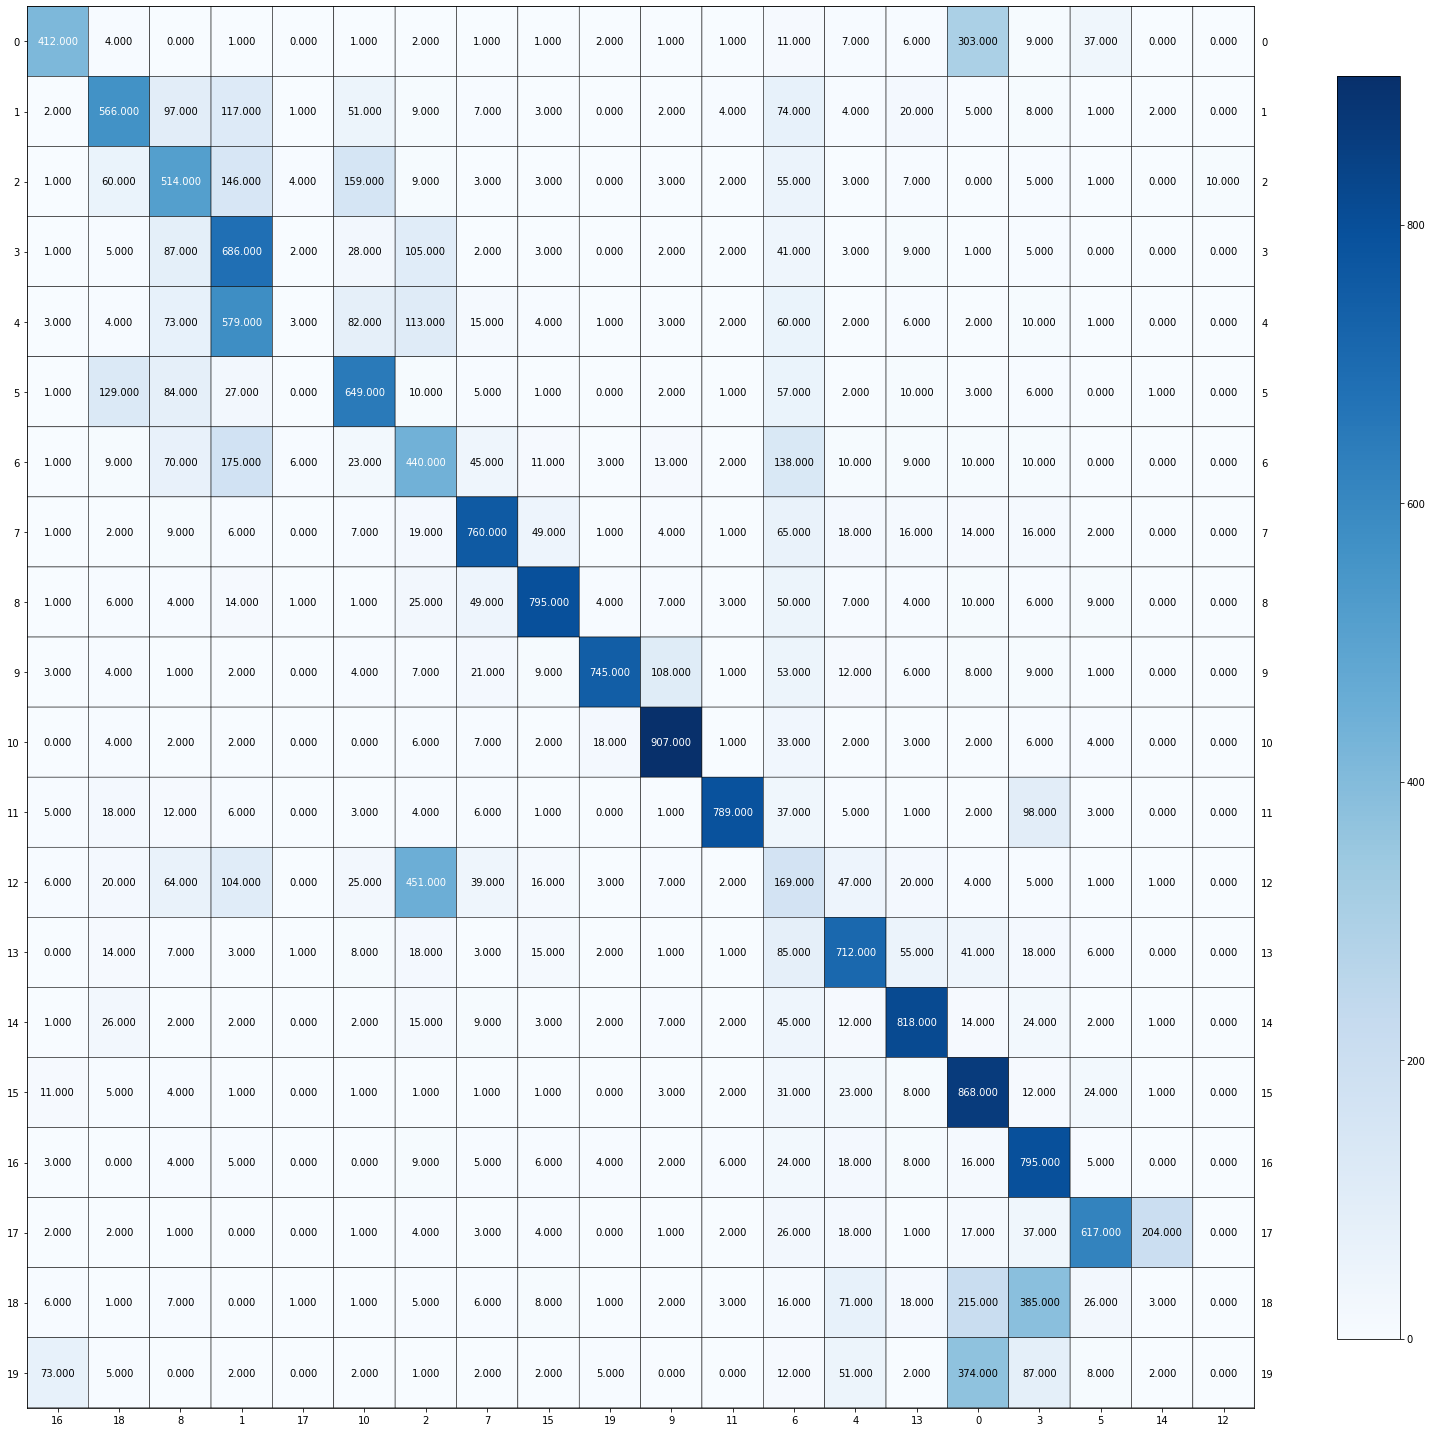

Homogeneity score for Ward and r:  20 is: 0.5562144953608803
Completeness score Ward and r:  20 is: 0.589489166095856
V-measure score for Ward and r:  20 is: 0.5723686326075237
Adjusted Rand Index score for Ward and r:  20 is: 0.42906456954681205
Adjusted mutual information score for Ward and r:  20 is: 0.5709345103681068
Contigency Matrix for Single Agglomerative clustering and r: 20


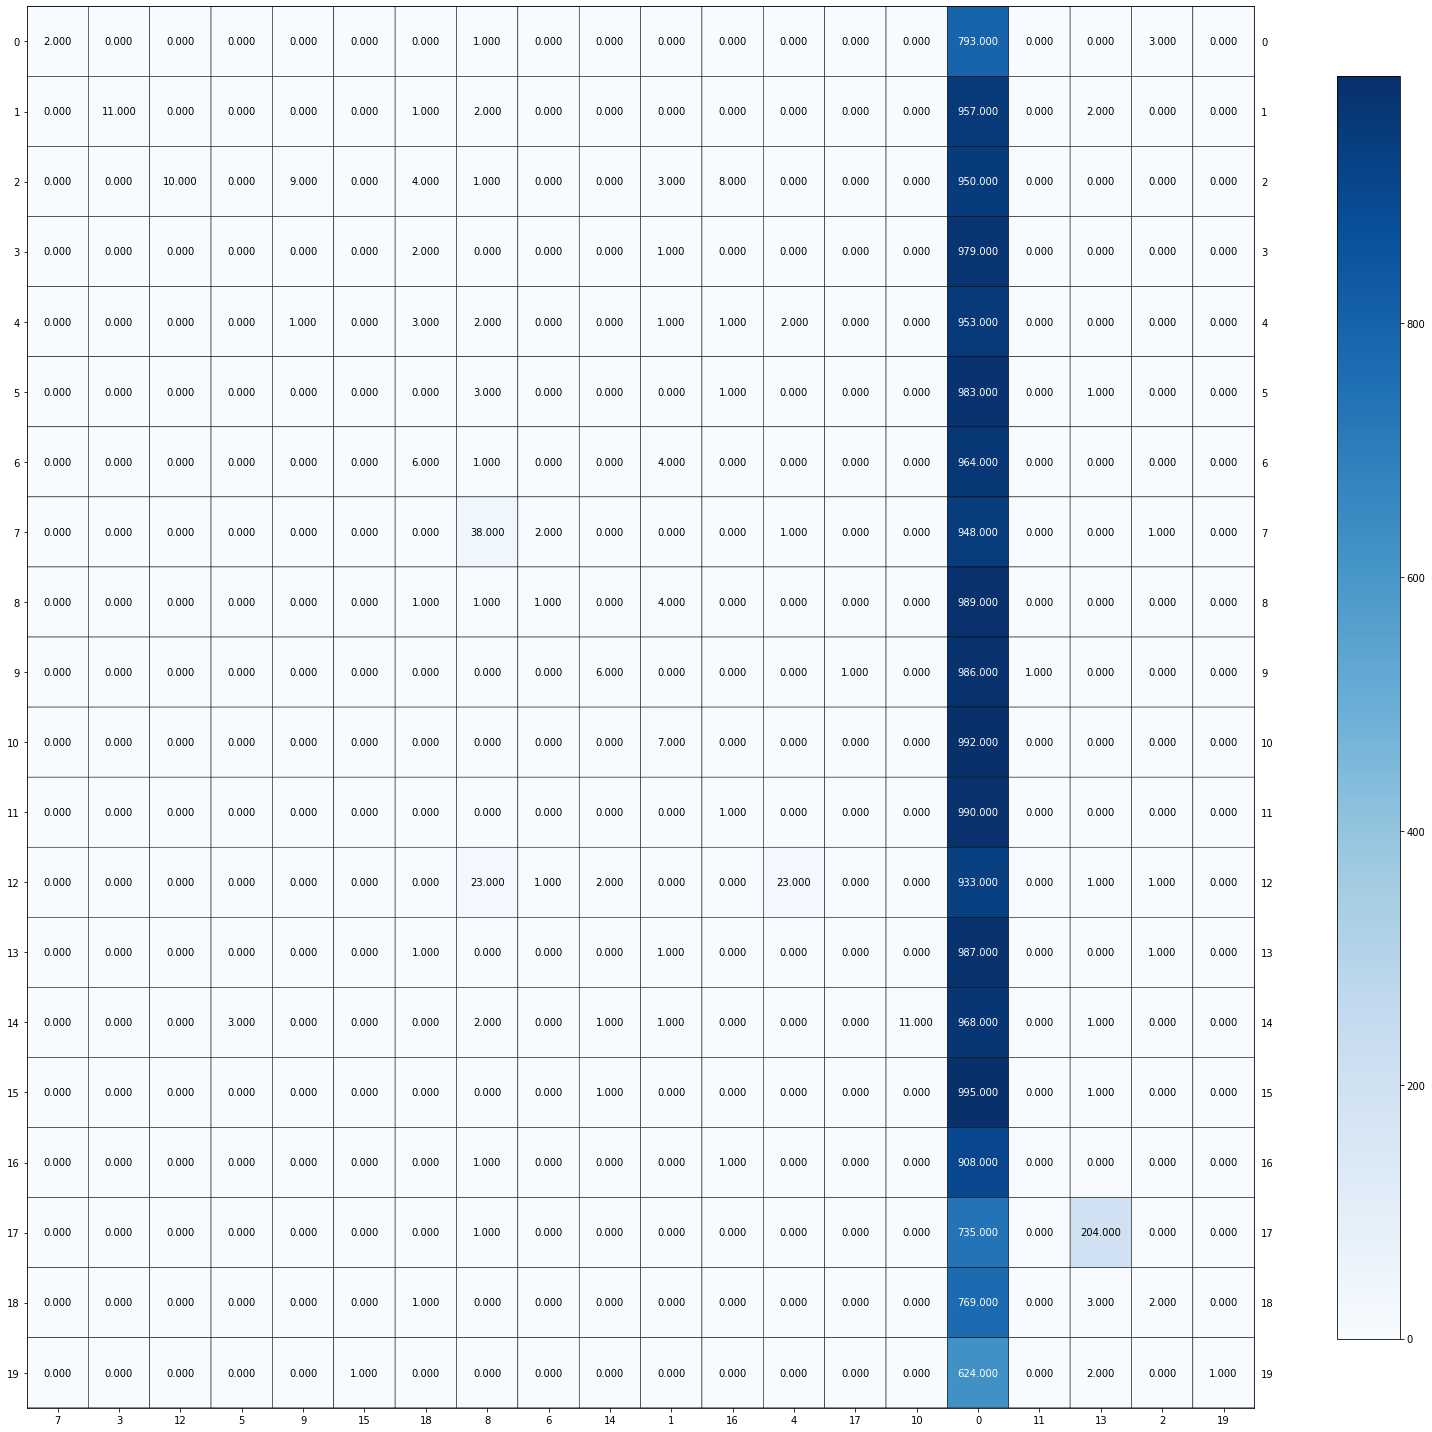

Homogeneity score for Single Agg and r:  20 is: 0.01844571364981214
Completeness score Single Agg and r:  20 is: 0.35505880881604956
V-measure score for Single Agg and r:  20 is: 0.03506952511860336
Adjusted Rand Index score Single Agg and r:  20 is: 0.0004785958337669354
Adjusted mutual information score Single Agg and r:  20 is: 0.03012121058903948
200
Contigency Matrix for Ward Agglomerative clustering and r: 200


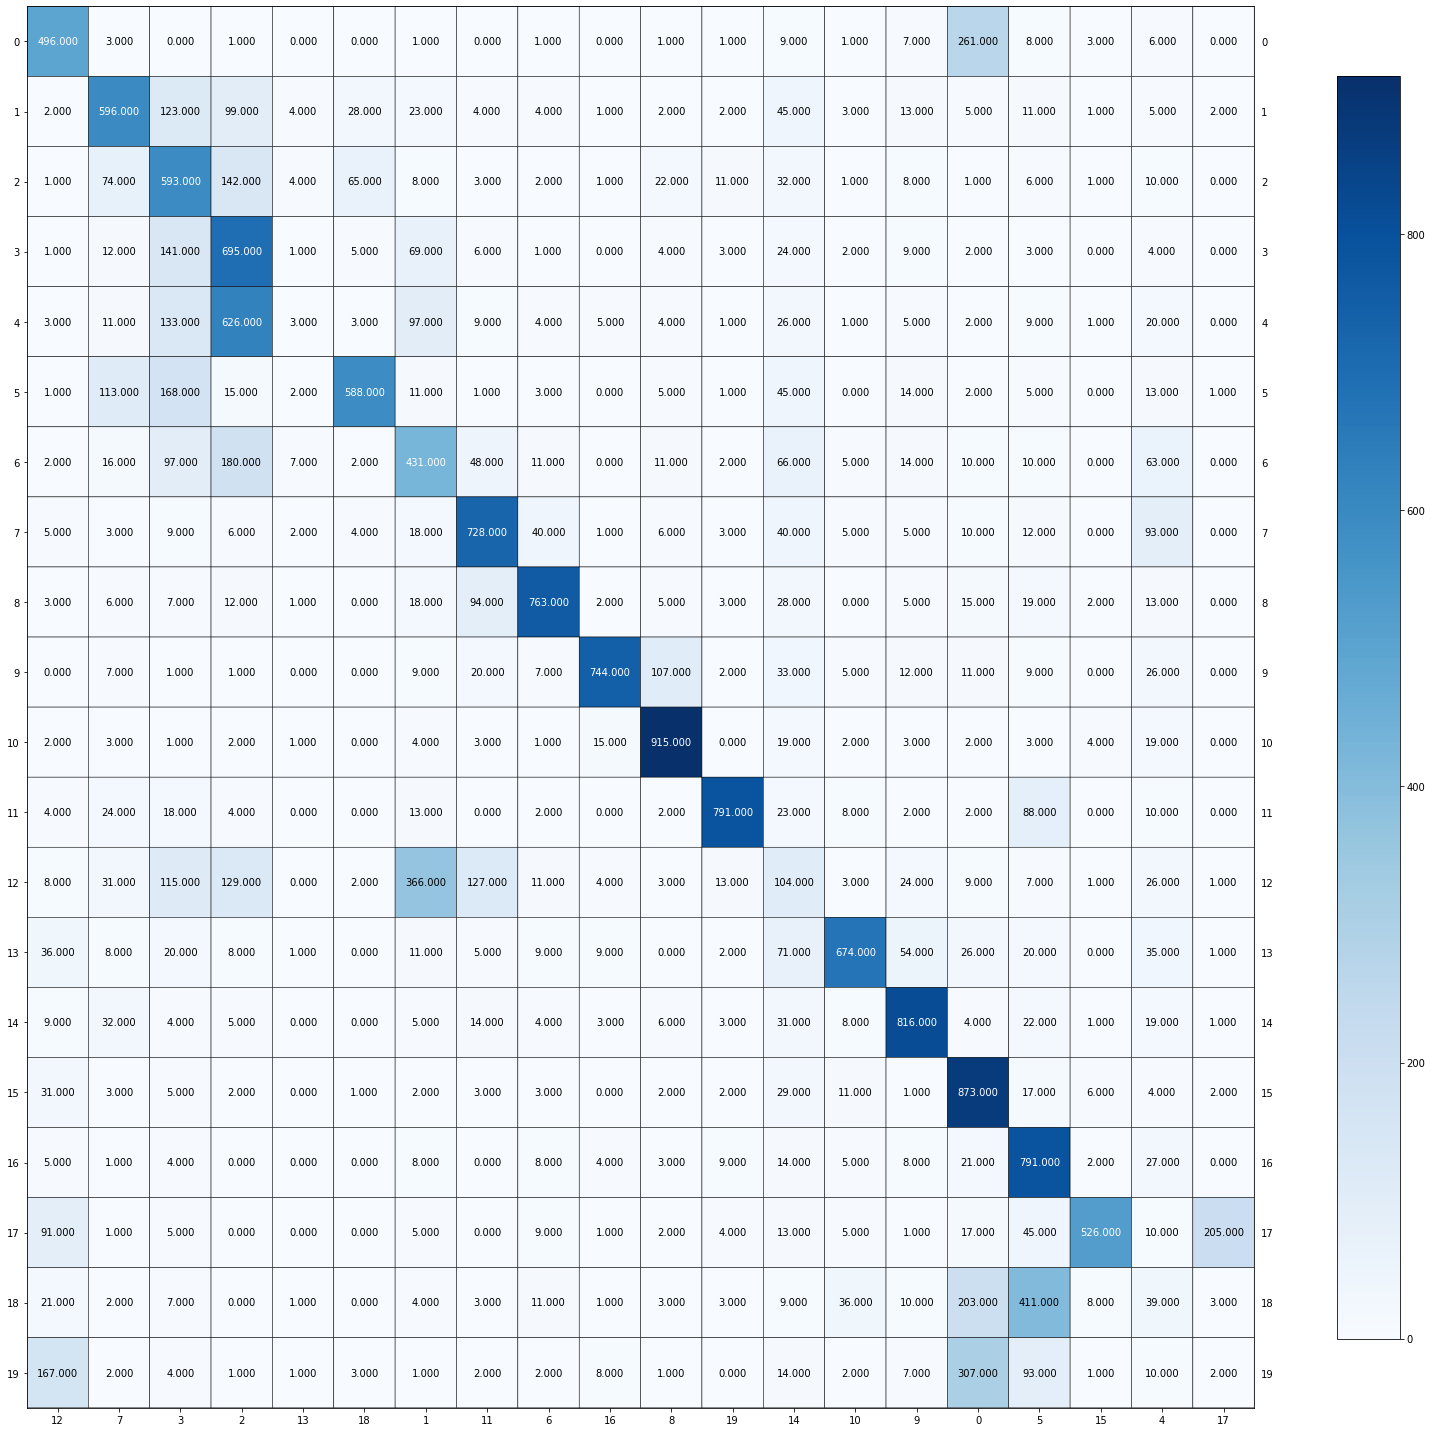

Homogeneity score for Ward and r:  200 is: 0.5581261201222677
Completeness score Ward and r:  200 is: 0.5841421774465988
V-measure score for Ward and r:  200 is: 0.5708378807184529
Adjusted Rand Index score for Ward and r:  200 is: 0.42741165149002364
Adjusted mutual information score for Ward and r:  200 is: 0.5694078427389649
Contigency Matrix for Single Agglomerative clustering and r: 200


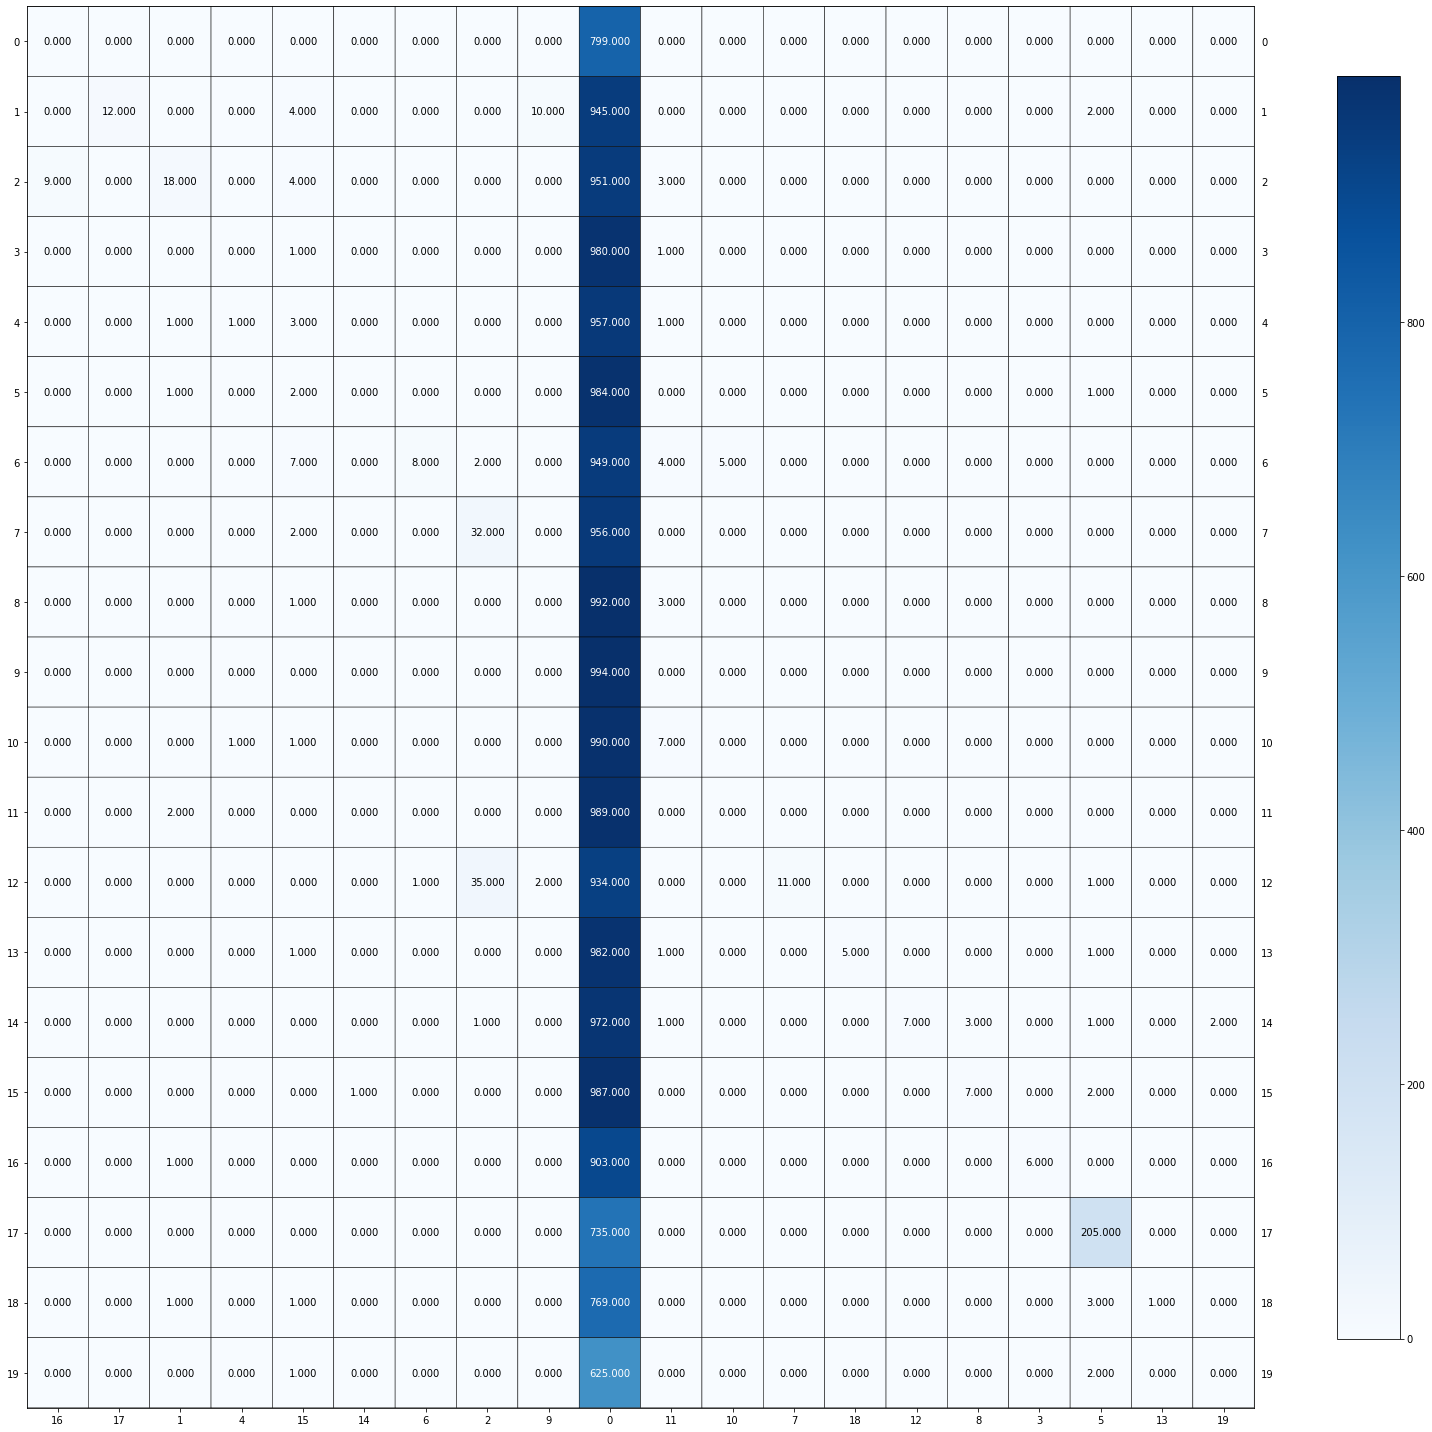

Homogeneity score for Single Agg and r:  200 is: 0.019466237701337964
Completeness score Single Agg and r:  200 is: 0.3644163240921591
V-measure score for Single Agg and r:  200 is: 0.03695825490943647
Adjusted Rand Index score Single Agg and r:  200 is: 0.0004657711631284778
Adjusted mutual information score Single Agg and r:  200 is: 0.03174103434449085


In [ ]:
components = [5,20,200]
umap_linkage_hs = []
umap_linkage_cs = []
umap_linkage_vms = []
umap_linkage_aris = []
umap_linkage_amis = []

umap_ward_hs = []
umap_ward_cs = []
umap_ward_vms = []
umap_ward_aris = []
umap_ward_amis = []


for r in components:
    print(r)
    umap_all = umap.UMAP(n_components=r, metric='cosine')
    data_umap = umap_all.fit_transform(data_tfidf)

    agg_ward = AgglomerativeClustering(n_clusters=20, linkage='ward').fit_predict(data_umap)


    cm = confusion_matrix(data.target, agg_ward)
    rows, cols = linear_sum_assignment(cm, maximize=True)
    print("Contigency Matrix for Ward Agglomerative clustering and r:",r)
    plot_mat(cm[rows[:, np.newaxis], cols], xticklabels=cols,yticklabels=rows, size=(20,20))

    umap_ward_hs.append(homogeneity_score(data.target, agg_ward))
    umap_ward_cs.append(completeness_score(data.target, agg_ward))
    umap_ward_vms.append(v_measure_score(data.target, agg_ward))
    umap_ward_aris.append(adjusted_rand_score(data.target, agg_ward))
    umap_ward_amis.append(adjusted_mutual_info_score(data.target, agg_ward))

    print("Homogeneity score for Ward and r: ",r,"is:",homogeneity_score(data.target, agg_ward))
    print("Completeness score Ward and r: ",r,"is:",(completeness_score(data.target, agg_ward)))
    print("V-measure score for Ward and r: ",r,"is:",(v_measure_score(data.target, agg_ward)))
    print("Adjusted Rand Index score for Ward and r: ",r,"is:",(adjusted_rand_score(data.target, agg_ward)))
    print("Adjusted mutual information score for Ward and r: ",r,"is:",(adjusted_mutual_info_score(data.target, agg_ward)))

        

    link_ward = AgglomerativeClustering(n_clusters=20, linkage='single').fit_predict(data_umap)
    
    cm = confusion_matrix(data.target, link_ward)
    rows, cols = linear_sum_assignment(cm, maximize=True)
    print("Contigency Matrix for Single Agglomerative clustering and r:",r)
    plot_mat(cm[rows[:, np.newaxis], cols], xticklabels=cols,yticklabels=rows, size=(20,20))

    umap_linkage_hs.append(homogeneity_score(data.target, link_ward))
    umap_linkage_cs.append(completeness_score(data.target, link_ward))
    umap_linkage_vms.append(v_measure_score(data.target, link_ward))
    umap_linkage_aris.append(adjusted_rand_score(data.target, link_ward))
    umap_linkage_amis.append(adjusted_mutual_info_score(data.target, link_ward))

    print("Homogeneity score for Single Agg and r: ",r,"is:",homogeneity_score(data.target, link_ward))
    print("Completeness score Single Agg and r: ",r,"is:",(completeness_score(data.target, link_ward)))
    print("V-measure score for Single Agg and r: ",r,"is:",(v_measure_score(data.target, link_ward)))
    print("Adjusted Rand Index score Single Agg and r: ",r,"is:",(adjusted_rand_score(data.target, link_ward)))
    print("Adjusted mutual information score Single Agg and r: ",r,"is:",(adjusted_mutual_info_score(data.target, link_ward)))

In [ ]:
average_umap_link = []
average_umap_ward = []
best_umap_link = 0
best_umap_ward = 0
best_umap_link_component = 0
best_umap_ward_component = 0

In [ ]:
for i in range(len(components)):
  average_umap_link.append((umap_linkage_hs[i] + umap_linkage_cs[i] + umap_linkage_vms[i] + umap_linkage_aris[i] + umap_linkage_amis[i]) / 5)
  if(average_umap_link[i] > best_umap_link):
    best_umap_link = average_umap_link[i]
    best_umap_link_component = components[i]

for i in range(len(components)):
  average_umap_ward.append((umap_ward_hs[i] + umap_ward_cs[i] + umap_ward_vms[i] + umap_ward_aris[i] + umap_ward_amis[i]) / 5)
  if(average_umap_ward[i] > best_umap_ward):
    best_umap_ward = average_umap_ward[i]
    best_umap_ward_component = components[i]

In [ ]:
print('Best Average Single Agglomerative UMAP values: ',best_umap_link)
print('Number of principal components for Best Single Agglomerative UMAP ',best_umap_link_component)

print('Best Average Ward Agglomerative UMAP values: ',best_umap_cos)
print('Number of principal components for Best Ward Agglomerative UMAP ',best_umap_cos_component)

Best Average Single Agglomerative UMAP values:  0.09060952444211058
Number of principal components for Best Single Agglomerative UMAP  200
Best Average Ward Agglomerative UMAP values:  0.5574586099754966
Number of principal components for Best Ward Agglomerative UMAP  200


# DBSCAN

## Question 15
Apply HDBSCAN on UMAP-transformed 20-category data.
Use min_cluster_size=100 .
Vary the min cluster size among 20, 100, 200 and report your findings in terms of the
five clustering evaluation metrics - you will plot the best contingency matrix in the
next question. Feel free to try modifying other parameters in HDBSCAN to get
better performance.

In [ ]:
!pip install hdbscan

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for hdbscan: filename=hdbscan-0.8.29-cp38-cp38-win_amd64.whl size=608496 sha256=4d2775ca16d2469a7ec8b535c3b3885d8636e56d30db07b710b305c2bde1be62
  Stored in directory: c:\users\tazeem khan\appdata\local\pip\cache\wheels\76\06\48\527e038689c581cc9e519c73840efdc7473805149e55bd7ffd
Successfully built hdbscan


In [ ]:
import hdbscan

In [ ]:
components = [5,20,200]
cluster_size=[20,100,200]
umap_hdbscan_hs = [[None for _ in range(3)] for _ in range(3)]
umap_hdbscan_cs = [[None for _ in range(3)] for _ in range(3)]
umap_hdbscan_vms = [[None for _ in range(3)] for _ in range(3)]
umap_hdbscan_aris = [[None for _ in range(3)] for _ in range(3)]
umap_hdbscan_amis = [[None for _ in range(3)] for _ in range(3)]

c1=0
for i in cluster_size:
  c2=0
  for r in components:
    print("Cluster_Size",i)
    print("Umap Component Numbers",r)
    umap_all = umap.UMAP(n_components=r, metric='cosine')
    data_umap = umap_all.fit_transform(data_tfidf)

    hdbscan_clust = hdbscan.HDBSCAN(min_cluster_size=i).fit_predict(data_umap)

    umap_hdbscan_hs[c1][c2]=homogeneity_score(data.target, hdbscan_clust)
    umap_hdbscan_cs[c1][c2]= completeness_score(data.target, hdbscan_clust)
    umap_hdbscan_vms[c1][c2]= v_measure_score(data.target, hdbscan_clust)
    umap_hdbscan_aris[c1][c2]=adjusted_rand_score(data.target, hdbscan_clust)
    umap_hdbscan_amis[c1][c2]=adjusted_mutual_info_score(data.target, hdbscan_clust)

    c2 = c2+1

    print("Homogeneity score for HDBSCAN number of clusters: ",i,"and number of components r: ",r,"is:",homogeneity_score(data.target, hdbscan_clust))
    print("Completeness score for HDBSCAN number of clusters: ",i,"and number of components r: ",r,"is:",(completeness_score(data.target, hdbscan_clust)))
    print("V-measure score for for HDBSCAN number of clusters: ",i,"and number of components r: ",r,"is:",(v_measure_score(data.target, hdbscan_clust)))
    print("Adjusted Rand Index score for HDBSCAN number of clusters: ",i,"and number of components r: ",r,"is:",(adjusted_rand_score(data.target, hdbscan_clust)))
    print("Adjusted mutual information score for HDBSCAN number of clusters: ",i,"and number of components r: ",r,"is:",(adjusted_mutual_info_score(data.target, hdbscan_clust)))
  c1= c1+1

Cluster_Size 20
Umap Component Numbers 5
Homogeneity score for HDBSCAN number of clusters:  20 and number of components r:  5 is: 0.00041764777356824743
Completeness score for HDBSCAN number of clusters:  20 and number of components r:  5 is: 0.11934206294879736
V-measure score for for HDBSCAN number of clusters:  20 and number of components r:  5 is: 0.0008323825530800732
Adjusted Rand Index score for HDBSCAN number of clusters:  20 and number of components r:  5 is: 6.011761711987771e-07
Adjusted mutual information score for HDBSCAN number of clusters:  20 and number of components r:  5 is: 0.00043861800508464093
Cluster_Size 20
Umap Component Numbers 20
Homogeneity score for HDBSCAN number of clusters:  20 and number of components r:  20 is: 0.4297813947777303
Completeness score for HDBSCAN number of clusters:  20 and number of components r:  20 is: 0.44716649686575993
V-measure score for for HDBSCAN number of clusters:  20 and number of components r:  20 is: 0.4383016198617358
Adju

In [ ]:
average_umap_hdbscan = [[0 for _ in range(3)] for _ in range(3)]
best_umap_hdbscan = 0
best_umap_hdbscan_component = 0
best_umap_hdbscan_cluster = 0

In [ ]:
for j in range(len(cluster_size)):
  for i in range(len(components)):
    average_umap_hdbscan[j][i]= ((umap_hdbscan_hs[j][i] + umap_hdbscan_cs[j][i] + umap_hdbscan_vms[j][i] + umap_hdbscan_aris[j][i] + umap_hdbscan_amis[j][i]) / 5)
    if(average_umap_hdbscan[j][i] > best_umap_hdbscan):
      best_umap_hdbscan= average_umap_hdbscan[j][i]
      best_umap_hdbscan_component = components[i]
      best_umap_hdbscan_cluster = cluster_size[j]

In [ ]:
print('Best Average HDBSCAN UMAP values: ',best_umap_hdbscan)
print('Number of principal components for Best HDBSCAN UMAP ',best_umap_hdbscan_component)
print('Number of clusters for Best HDBSCAN UMAP ',best_umap_hdbscan_cluster)

Best Average HDBSCAN UMAP values:  0.44987328962542283
Number of principal components for Best HDBSCAN UMAP  5
Number of clusters for Best HDBSCAN UMAP  100


## Question 16
Plot the contingency matrix for the best clustering model from Question 15.
How many clusters are given by the model? What does “-1” mean for the clustering labels?
Interpret the contingency matrix considering the answer to these questions.

Contigency Matrix for best HDBSCAN clustering with UMAP


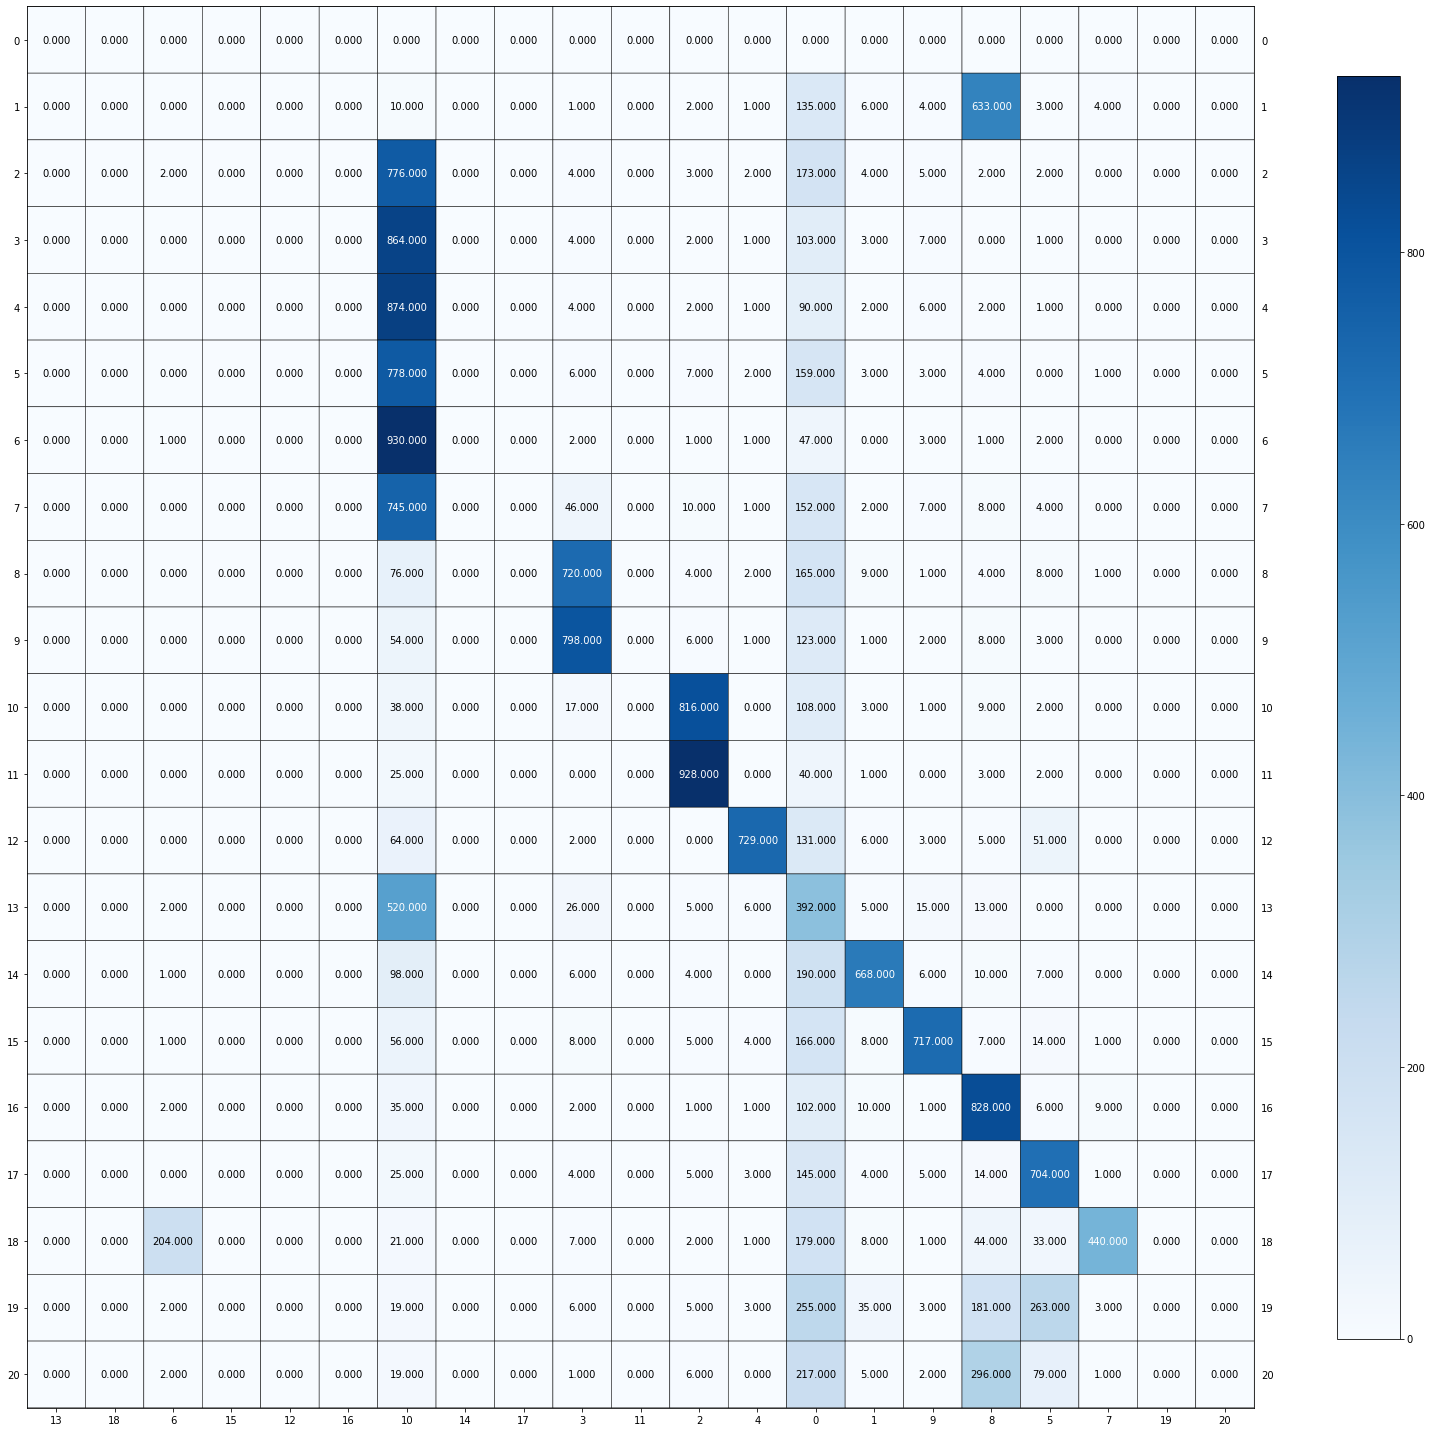

In [ ]:
umap_all = umap.UMAP(n_components=best_umap_hdbscan_component, metric='cosine')
data_umap = umap_all.fit_transform(data_tfidf)

hdbscan_best_clust = hdbscan.HDBSCAN(min_cluster_size=best_umap_hdbscan_cluster).fit_predict(data_umap)


cm = confusion_matrix(data.target, hdbscan_best_clust)
rows, cols = linear_sum_assignment(cm, maximize=True)
print("Contigency Matrix for best HDBSCAN clustering with UMAP")
plot_mat(cm[rows[:, np.newaxis], cols], xticklabels=cols,yticklabels=rows, size=(20,20))

## Question 17
Based on your experiments, which dimensionality reduction technique and clustering methods worked best together for 20-class text data and why? Follow the table below. IfUMAP takes too long to converge, consider running it once and saving the intermediate results in a pickle file.

### K-Means and SVD

In [ ]:
components = [5,20,200]
cluster_size=[10,20,50]
svd_kmeans_hs = [[None for _ in range(3)] for _ in range(3)]
svd_kmeans_cs = [[None for _ in range(3)] for _ in range(3)]
svd_kmeans_vms = [[None for _ in range(3)] for _ in range(3)]
svd_kmeans_aris = [[None for _ in range(3)] for _ in range(3)]
svd_kmeans_amis = [[None for _ in range(3)] for _ in range(3)]

c1=0
for i in cluster_size:
  c2=0
  for r in components:
    print("Kmeans Cluster_Size",i)
    print("SVD Component Numbers",r)
    svd = TruncatedSVD(n_components=r, random_state=42)
    data_svd =svd.fit_transform(data_tfidf)

    kmeans = KMeans(n_clusters=i, random_state=0, max_iter=1000, n_init=30)
    data_kmeans = kmeans.fit_predict(data_svd)

    svd_kmeans_hs[c1][c2]=homogeneity_score(data.target, data_kmeans)
    svd_kmeans_cs[c1][c2]= completeness_score(data.target, data_kmeans)
    svd_kmeans_vms[c1][c2]= v_measure_score(data.target, data_kmeans)
    svd_kmeans_aris[c1][c2]=adjusted_rand_score(data.target, data_kmeans)
    svd_kmeans_amis[c1][c2]=adjusted_mutual_info_score(data.target, data_kmeans)

    c2 = c2+1

    print("Homogeneity score for K-Means number of clusters: ",i,"and number of components for SVD r: ",r,"is:",homogeneity_score(data.target, data_kmeans))
    print("Completeness score for K-Means number of clusters: ",i,"and number of components for SVD r: ",r,"is:",(completeness_score(data.target, data_kmeans)))
    print("V-measure score for for K-Means number of clusters: ",i,"and number of components for SVD r: ",r,"is:",(v_measure_score(data.target, data_kmeans)))
    print("Adjusted Rand Index score for K-Means number of clusters: ",i,"and number of components for SVD r: ",r,"is:",(adjusted_rand_score(data.target, data_kmeans)))
    print("Adjusted mutual information score for K-Means number of clusters: ",i,"and number of components for SVD r: ",r,"is:",(adjusted_mutual_info_score(data.target, data_kmeans)))
  c1= c1+1

Kmeans Cluster_Size 10
SVD Component Numbers 5
Homogeneity score for K-Means number of clusters:  10 and number of components for SVD r:  5 is: 0.270789611796396
Completeness score for K-Means number of clusters:  10 and number of components for SVD r:  5 is: 0.417480258233419
V-measure score for for K-Means number of clusters:  10 and number of components for SVD r:  5 is: 0.3285028794149874
Adjusted Rand Index score for K-Means number of clusters:  10 and number of components for SVD r:  5 is: 0.10607246793487007
Adjusted mutual information score for K-Means number of clusters:  10 and number of components for SVD r:  5 is: 0.3272589720408019
Kmeans Cluster_Size 10
SVD Component Numbers 20
Homogeneity score for K-Means number of clusters:  10 and number of components for SVD r:  20 is: 0.2558179157227848
Completeness score for K-Means number of clusters:  10 and number of components for SVD r:  20 is: 0.40490810506537567
V-measure score for for K-Means number of clusters:  10 and num

In [ ]:
average_svd_kmeans = [[0 for _ in range(3)] for _ in range(3)]
best_svd_kmeans = 0
best_svd_kmeans_component = 0
best_svd_kmeans_cluster = 0

In [ ]:
for j in range(len(cluster_size)):
  for i in range(len(components)):
    average_svd_kmeans[j][i]= ((svd_kmeans_hs[j][i] + svd_kmeans_cs[j][i] + svd_kmeans_vms[j][i] + svd_kmeans_aris[j][i] + svd_kmeans_amis[j][i]) / 5)
    if(average_svd_kmeans[j][i] > best_svd_kmeans):
      best_svd_kmeans= average_svd_kmeans[j][i]
      best_svd_kmeans_component = components[i]
      best_svd_kmeans_cluster = cluster_size[j]

In [ ]:
print('Best Average K-Means SVD values: ',best_svd_kmeans)
print('Number of principal components for Best K-Means SVD ',best_svd_kmeans_component)
print('Number of clusters for Best K-Means SVD ',best_svd_kmeans_cluster)

Best Average K-Means SVD values:  0.34169994830773764
Number of principal components for Best K-Means SVD  200
Number of clusters for Best K-Means SVD  50


Contigency Matrix for best K-Means clustering with SVD


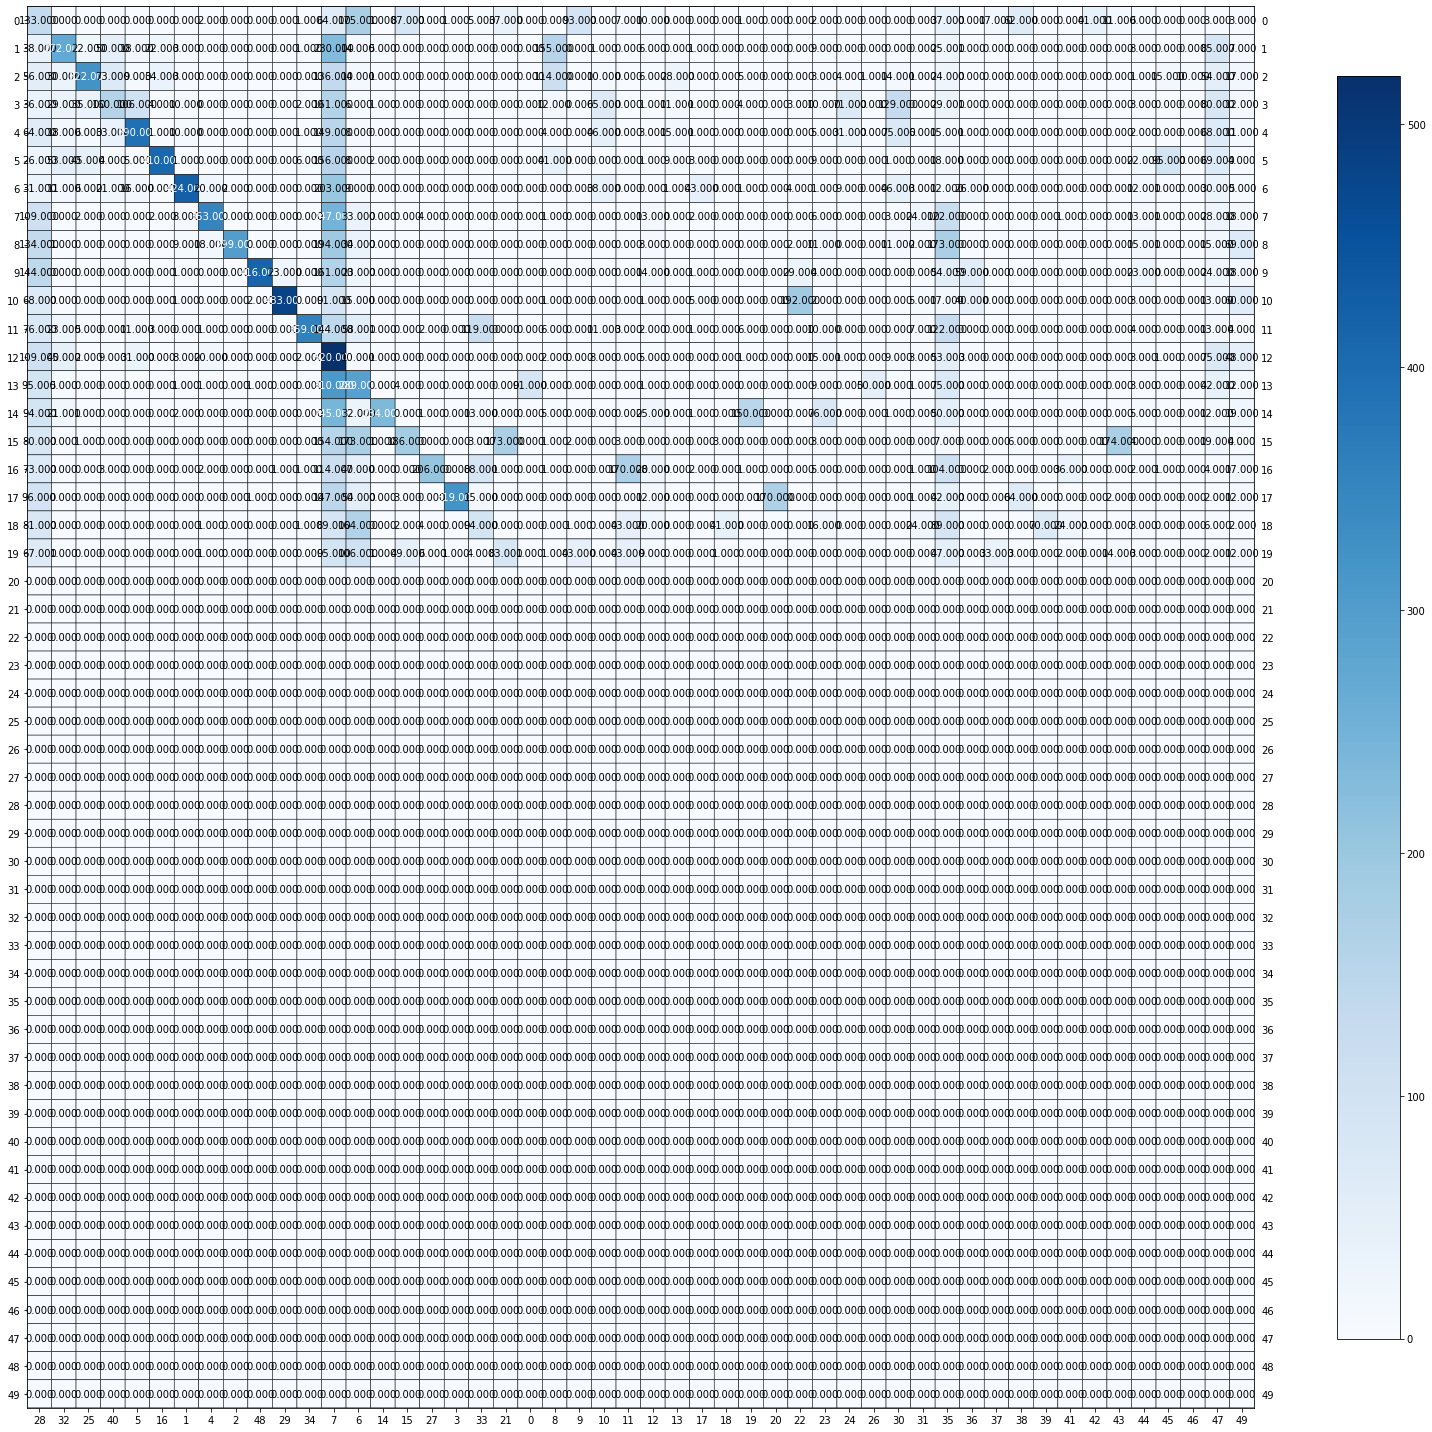

In [ ]:
svd = TruncatedSVD(n_components=best_svd_kmeans_component, random_state=42)
data_svd =svd.fit_transform(data_tfidf)

kmeans = KMeans(n_clusters=best_svd_kmeans_cluster, random_state=0, max_iter=1000, n_init=30)
data_kmeans = kmeans.fit_predict(data_svd)

cm = confusion_matrix(data.target, data_kmeans)
rows, cols = linear_sum_assignment(cm, maximize=True)
print("Contigency Matrix for best K-Means clustering with SVD")
plot_mat(cm[rows[:, np.newaxis], cols], xticklabels=cols,yticklabels=rows, size=(20,20))

### K-Means and NMF

In [ ]:
components = [5,20,200]
cluster_size=[10,20,50]
nmf_kmeans_hs = [[None for _ in range(3)] for _ in range(3)]
nmf_kmeans_cs = [[None for _ in range(3)] for _ in range(3)]
nmf_kmeans_vms = [[None for _ in range(3)] for _ in range(3)]
nmf_kmeans_aris = [[None for _ in range(3)] for _ in range(3)]
nmf_kmeans_amis = [[None for _ in range(3)] for _ in range(3)]

c1=0
for i in cluster_size:
  c2=0
  for r in components:
    print("Kmeans Cluster_Size",i)
    print("NMF Component Numbers",r)
    nmf = NMF(n_components=r, init='random', random_state=42, max_iter=1000)
    data_nmf = nmf.fit_transform(data_tfidf)

    kmeans = KMeans(n_clusters=i, random_state=0, max_iter=1000, n_init=30)
    data_kmeans = kmeans.fit_predict(data_nmf)

    nmf_kmeans_hs[c1][c2]=homogeneity_score(data.target, data_kmeans)
    nmf_kmeans_cs[c1][c2]= completeness_score(data.target, data_kmeans)
    nmf_kmeans_vms[c1][c2]= v_measure_score(data.target, data_kmeans)
    nmf_kmeans_aris[c1][c2]=adjusted_rand_score(data.target, data_kmeans)
    nmf_kmeans_amis[c1][c2]=adjusted_mutual_info_score(data.target, data_kmeans)

    c2 = c2+1

    print("Homogeneity score for K-Means number of clusters: ",i,"and number of components for NMF r: ",r,"is:",homogeneity_score(data.target, data_kmeans))
    print("Completeness score for K-Means number of clusters: ",i,"and number of components for NMF r: ",r,"is:",(completeness_score(data.target, data_kmeans)))
    print("V-measure score for for K-Means number of clusters: ",i,"and number of components for NMF r: ",r,"is:",(v_measure_score(data.target, data_kmeans)))
    print("Adjusted Rand Index score for K-Means number of clusters: ",i,"and number of components for NMF r: ",r,"is:",(adjusted_rand_score(data.target, data_kmeans)))
    print("Adjusted mutual information score for K-Means number of clusters: ",i,"and number of components for NMF r: ",r,"is:",(adjusted_mutual_info_score(data.target, data_kmeans)))
  c1= c1+1

Kmeans Cluster_Size 10
NMF Component Numbers 5
Homogeneity score for K-Means number of clusters:  10 and number of components for NMF r:  5 is: 0.23480940679752516
Completeness score for K-Means number of clusters:  10 and number of components for NMF r:  5 is: 0.3512631744779117
V-measure score for for K-Means number of clusters:  10 and number of components for NMF r:  5 is: 0.28146649498421394
Adjusted Rand Index score for K-Means number of clusters:  10 and number of components for NMF r:  5 is: 0.09323405771724347
Adjusted mutual information score for K-Means number of clusters:  10 and number of components for NMF r:  5 is: 0.28015160205683987
Kmeans Cluster_Size 10
NMF Component Numbers 20
Homogeneity score for K-Means number of clusters:  10 and number of components for NMF r:  20 is: 0.25861185216610005
Completeness score for K-Means number of clusters:  10 and number of components for NMF r:  20 is: 0.47679386487021275
V-measure score for for K-Means number of clusters:  10 a

In [ ]:
average_nmf_kmeans = [[0 for _ in range(3)] for _ in range(3)]
best_nmf_kmeans = 0
best_nmf_kmeans_component = 0
best_nmf_kmeans_cluster = 0

In [ ]:
for j in range(len(cluster_size)):
  for i in range(len(components)):
    average_nmf_kmeans[j][i] = ((nmf_kmeans_hs[j][i] + nmf_kmeans_cs[j][i] + nmf_kmeans_vms[j][i] + nmf_kmeans_aris[j][i] + nmf_kmeans_amis[j][i]) / 5)
    if(average_nmf_kmeans[j][i] > best_nmf_kmeans):
      best_nmf_kmeans= average_nmf_kmeans[j][i]
      best_nmf_kmeans_component = components[i]
      best_nmf_kmeans_cluster = cluster_size[j]

In [ ]:
print('Best Average K-Means NMF values: ',best_nmf_kmeans)
print('Number of principal components for Best K-Means NMF ',best_nmf_kmeans_component)
print('Number of clusters for Best K-Means NMF ',best_nmf_kmeans_cluster)

Best Average K-Means NMF values:  0.32824046435310295
Number of principal components for Best K-Means NMF  20
Number of clusters for Best K-Means NMF  50


Contigency Matrix for best K-Means clustering with NMF


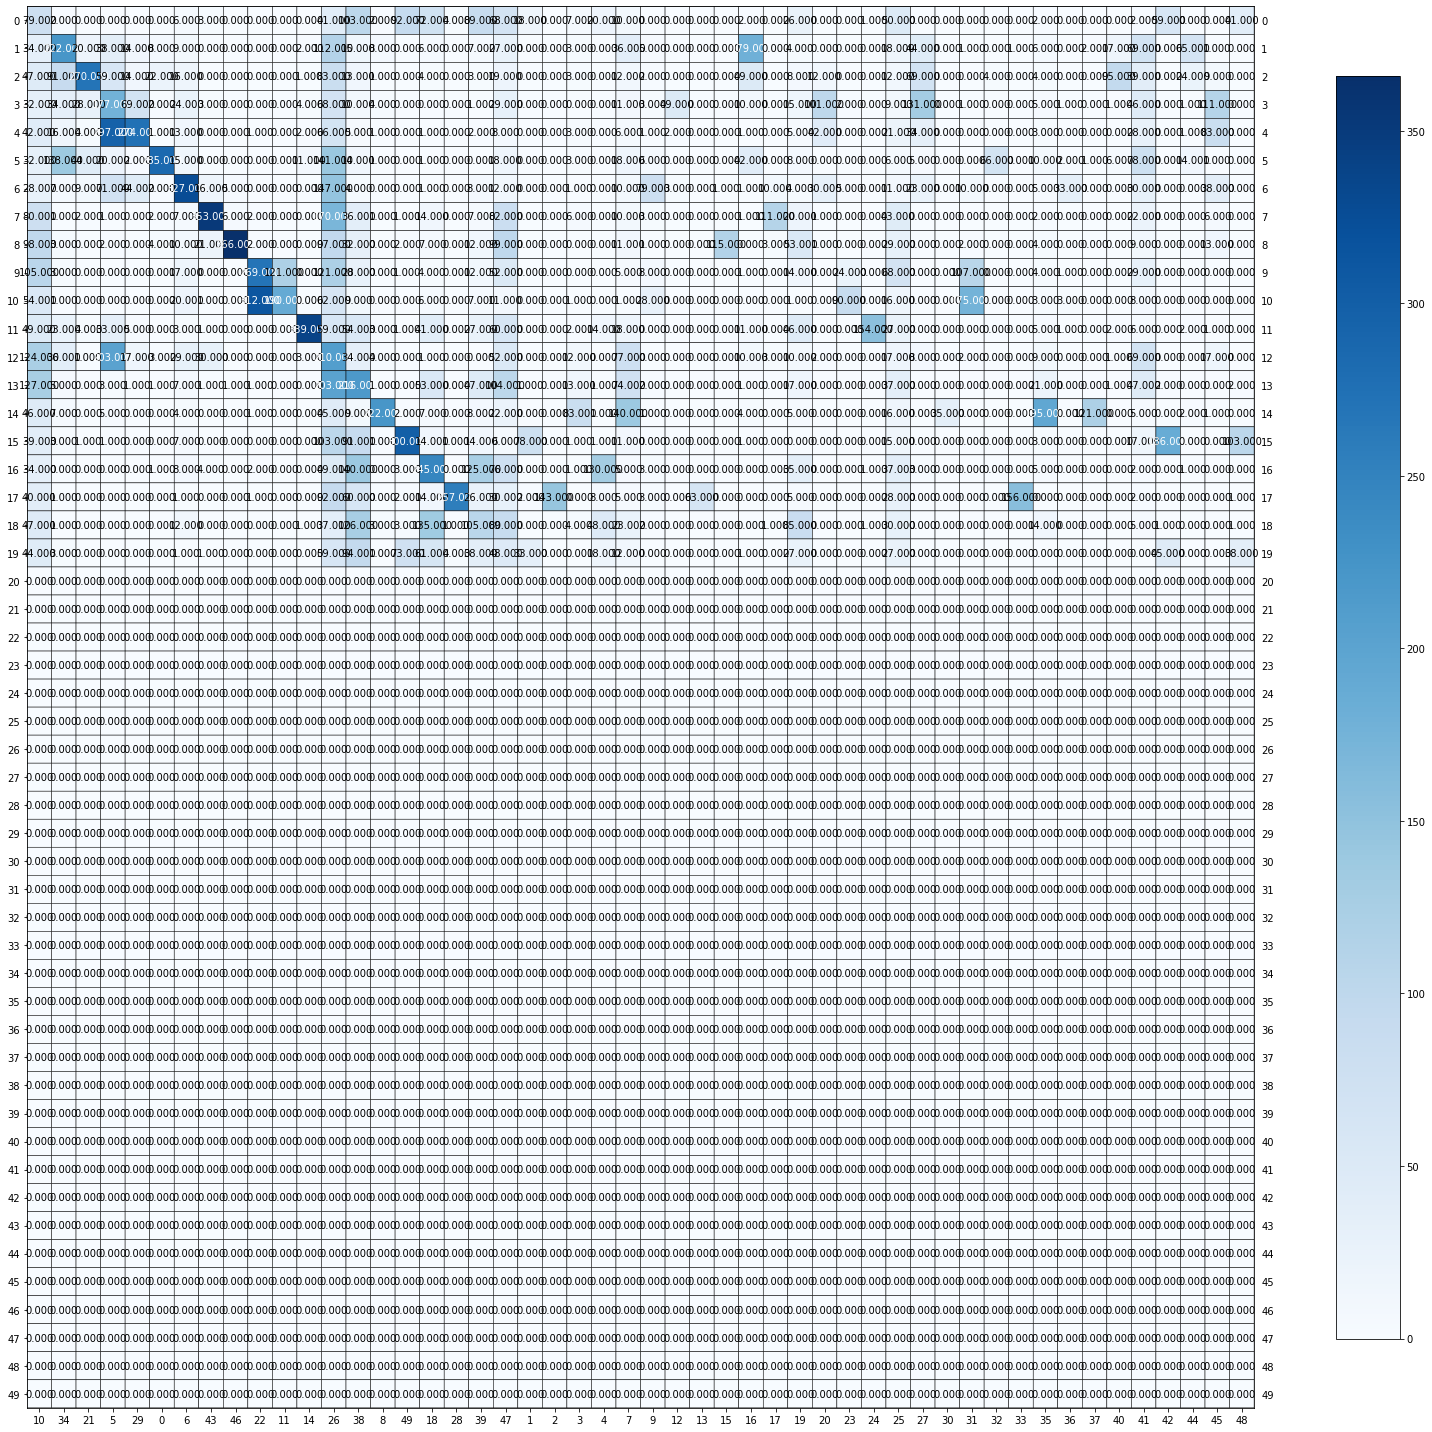

In [ ]:
nmf = NMF(n_components=best_nmf_kmeans_component, init='random', random_state=42, max_iter=1000)
data_nmf = nmf.fit_transform(data_tfidf)

kmeans = KMeans(n_clusters=best_nmf_kmeans_cluster, random_state=0, max_iter=1000, n_init=30)
data_kmeans = kmeans.fit_predict(data_nmf)

cm = confusion_matrix(data.target, data_kmeans)
rows, cols = linear_sum_assignment(cm, maximize=True)
print("Contigency Matrix for best K-Means clustering with NMF")
plot_mat(cm[rows[:, np.newaxis], cols], xticklabels=cols,yticklabels=rows, size=(20,20))

### K-Means and UMAP

In [ ]:
components = [5,20,200]
cluster_size=[10,20,50]
umap_kmeans_hs = [[None for _ in range(3)] for _ in range(3)]
umap_kmeans_cs = [[None for _ in range(3)] for _ in range(3)]
umap_kmeans_vms = [[None for _ in range(3)] for _ in range(3)]
umap_kmeans_aris = [[None for _ in range(3)] for _ in range(3)]
umap_kmeans_amis = [[None for _ in range(3)] for _ in range(3)]

c1=0
for i in cluster_size:
  c2=0
  for r in components:
    print("Kmeans Cluster_Size",i)
    print("UMAP Component Numbers",r)
    umap_all = umap.UMAP(n_components=r, metric='cosine')
    data_umap = umap_all.fit_transform(data_tfidf)

    kmeans = KMeans(n_clusters=i, random_state=0, max_iter=1000, n_init=30)
    data_kmeans = kmeans.fit_predict(data_umap)

    umap_kmeans_hs[c1][c2]=homogeneity_score(data.target, data_kmeans)
    umap_kmeans_cs[c1][c2]= completeness_score(data.target, data_kmeans)
    umap_kmeans_vms[c1][c2]= v_measure_score(data.target, data_kmeans)
    umap_kmeans_aris[c1][c2]=adjusted_rand_score(data.target, data_kmeans)
    umap_kmeans_amis[c1][c2]=adjusted_mutual_info_score(data.target, data_kmeans)

    c2 = c2+1

    print("Homogeneity score for K-Means number of clusters: ",i,"and number of components for UMAP r: ",r,"is:",homogeneity_score(data.target, data_kmeans))
    print("Completeness score for K-Means number of clusters: ",i,"and number of components for UMAP r: ",r,"is:",(completeness_score(data.target, data_kmeans)))
    print("V-measure score for for K-Means number of clusters: ",i,"and number of components for UMAP r: ",r,"is:",(v_measure_score(data.target, data_kmeans)))
    print("Adjusted Rand Index score for K-Means number of clusters: ",i,"and number of components for UMAP r: ",r,"is:",(adjusted_rand_score(data.target, data_kmeans)))
    print("Adjusted mutual information score for K-Means number of clusters: ",i,"and number of components for UMAP r: ",r,"is:",(adjusted_mutual_info_score(data.target, data_kmeans)))
  c1= c1+1

Kmeans Cluster_Size 10
UMAP Component Numbers 5
Homogeneity score for K-Means number of clusters:  10 and number of components for UMAP r:  5 is: 0.45469488342138226
Completeness score for K-Means number of clusters:  10 and number of components for UMAP r:  5 is: 0.6442757634680574
V-measure score for for K-Means number of clusters:  10 and number of components for UMAP r:  5 is: 0.5331332442599845
Adjusted Rand Index score for K-Means number of clusters:  10 and number of components for UMAP r:  5 is: 0.32875681780748195
Adjusted mutual information score for K-Means number of clusters:  10 and number of components for UMAP r:  5 is: 0.5322841560819805
Kmeans Cluster_Size 10
UMAP Component Numbers 20
Homogeneity score for K-Means number of clusters:  10 and number of components for UMAP r:  20 is: 0.46042158394839333
Completeness score for K-Means number of clusters:  10 and number of components for UMAP r:  20 is: 0.6535182841213933
V-measure score for for K-Means number of clusters:

In [ ]:
average_umap_kmeans = [[0 for _ in range(3)] for _ in range(3)]
best_umap_kmeans = 0
best_umap_kmeans_component = 0
best_umap_kmeans_cluster = 0

In [ ]:
for j in range(len(cluster_size)):
  for i in range(len(components)):
    average_umap_kmeans[j][i] = ((umap_kmeans_hs[j][i] + umap_kmeans_cs[j][i] + umap_kmeans_vms[j][i] + umap_kmeans_aris[j][i] + umap_kmeans_amis[j][i]) / 5)
    if(average_umap_kmeans[j][i] > best_umap_kmeans):
      best_umap_kmeans= average_umap_kmeans[j][i]
      best_umap_kmeans_component = components[i]
      best_umap_kmeans_cluster = cluster_size[j]

In [ ]:
print('Best Average K-Means UMAP values: ',best_umap_kmeans)
print('Number of principal components for Best K-Means UMAP ',best_umap_kmeans_component)
print('Number of clusters for Best K-Means UMAP ',best_umap_kmeans_cluster)

Best Average K-Means UMAP values:  0.5565895415418738
Number of principal components for Best K-Means UMAP  20
Number of clusters for Best K-Means UMAP  20


Contigency Matrix for best K-Means clustering with UMAP


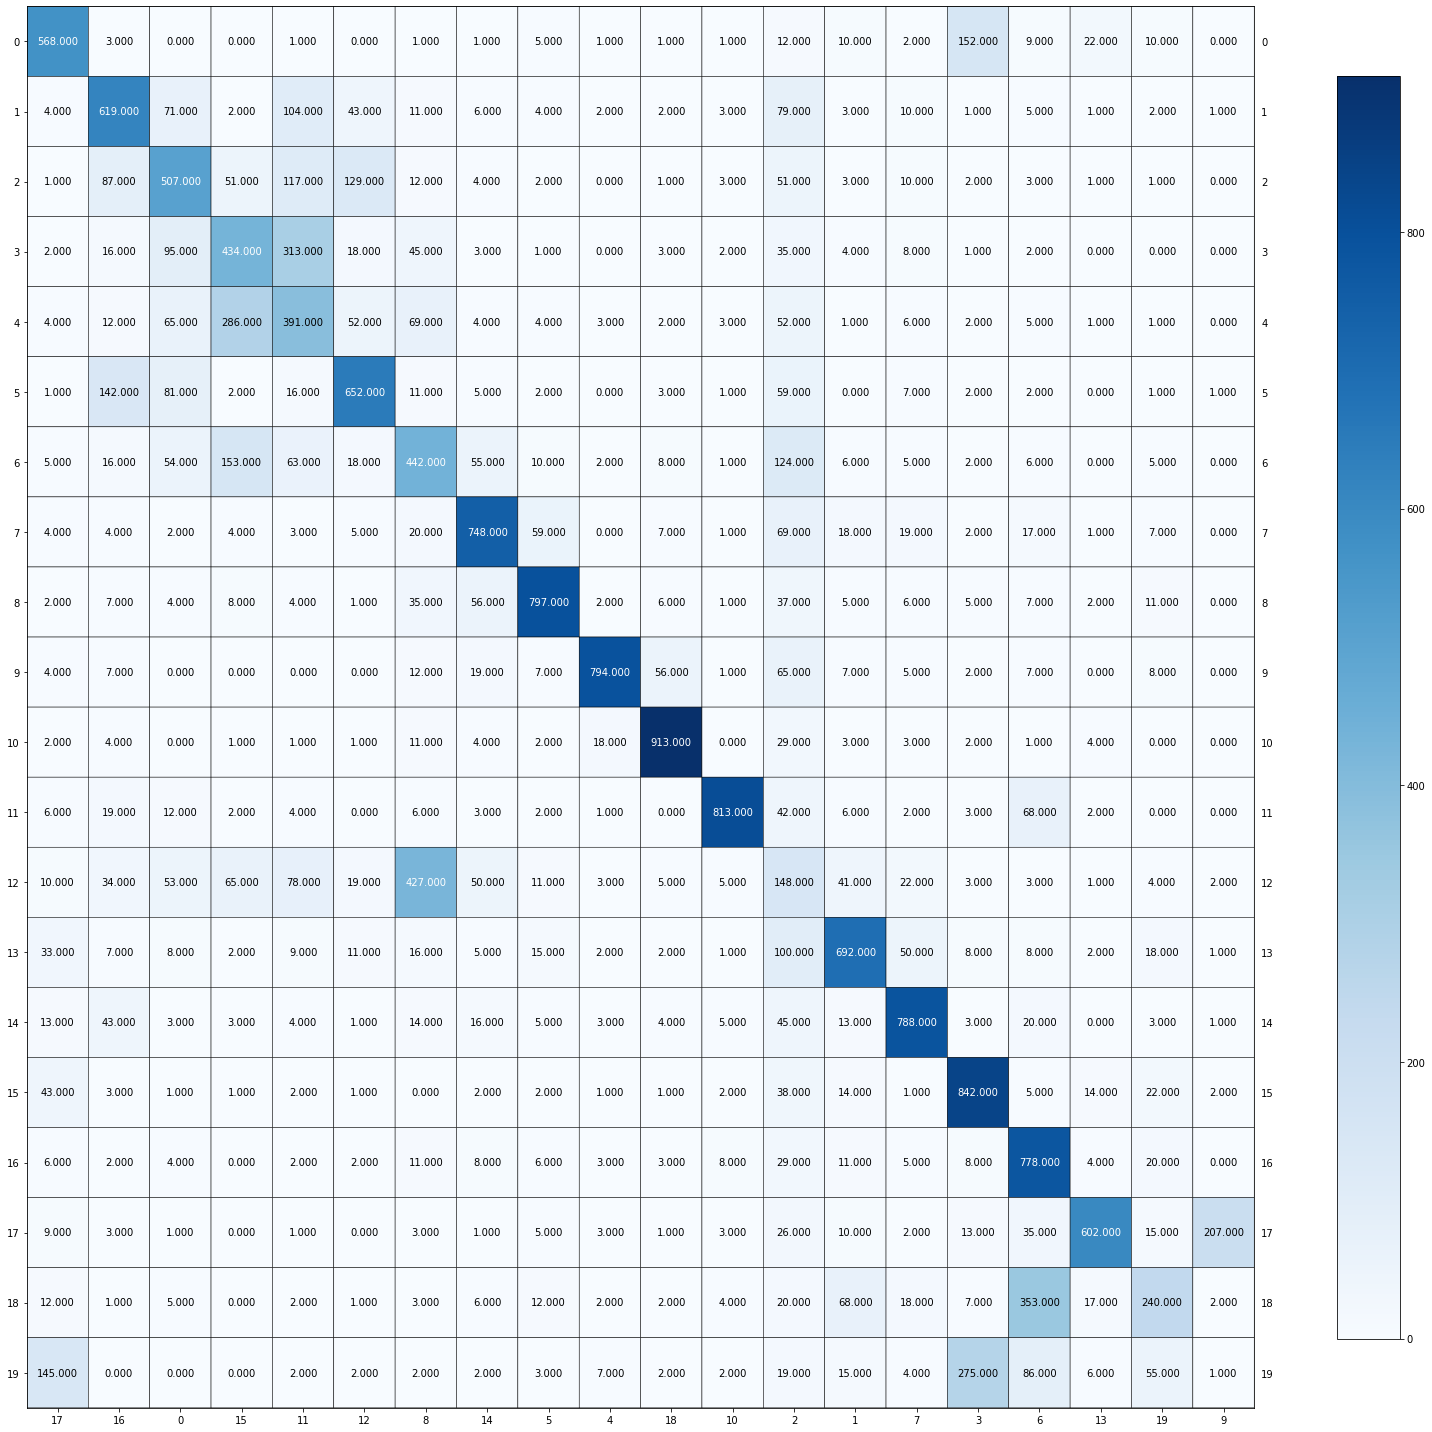

In [ ]:
umap_all = umap.UMAP(n_components=best_umap_kmeans_component, metric='cosine')
data_umap = umap_all.fit_transform(data_tfidf)

kmeans = KMeans(n_clusters=best_umap_kmeans_cluster, random_state=0, max_iter=1000, n_init=30)
data_kmeans = kmeans.fit_predict(data_umap)

cm = confusion_matrix(data.target, data_kmeans)
rows, cols = linear_sum_assignment(cm, maximize=True)
print("Contigency Matrix for best K-Means clustering with UMAP")
plot_mat(cm[rows[:, np.newaxis], cols], xticklabels=cols,yticklabels=rows, size=(20,20))

### Agglomerative and SVD

In [ ]:
components = [5,20,200]
cluster_size=[20]
svd_agg_hs = [[None for _ in range(3)] for _ in range(1)]
svd_agg_cs = [[None for _ in range(3)] for _ in range(1)]
svd_agg_vms = [[None for _ in range(3)] for _ in range(1)]
svd_agg_aris = [[None for _ in range(3)] for _ in range(1)]
svd_agg_amis = [[None for _ in range(3)] for _ in range(1)]

c1=0
for i in cluster_size:
  c2=0
  for r in components:
    print("Agglomerative Cluster_Size",i)
    print("SVD Component Numbers",r)
    svd = TruncatedSVD(n_components=r, random_state=42)
    data_svd =svd.fit_transform(data_tfidf)

    agg = AgglomerativeClustering(n_clusters=i, linkage='ward')
    data_agg = agg.fit_predict(data_svd)

    svd_agg_hs[c1][c2]=homogeneity_score(data.target, data_agg)
    svd_agg_cs[c1][c2]= completeness_score(data.target, data_agg)
    svd_agg_vms[c1][c2]= v_measure_score(data.target, data_agg)
    svd_agg_aris[c1][c2]=adjusted_rand_score(data.target, data_agg)
    svd_agg_amis[c1][c2]=adjusted_mutual_info_score(data.target, data_agg)

    c2 = c2+1

    print("Homogeneity score for Agglomerative number of clusters: ",i,"and number of components for SVD r: ",r,"is:",homogeneity_score(data.target, data_agg))
    print("Completeness score for Agglomerative number of clusters: ",i,"and number of components for SVD r: ",r,"is:",(completeness_score(data.target, data_agg)))
    print("V-measure score for for Agglomerative number of clusters: ",i,"and number of components for SVD r: ",r,"is:",(v_measure_score(data.target, data_agg)))
    print("Adjusted Rand Index score for Agglomerative number of clusters: ",i,"and number of components for SVD r: ",r,"is:",(adjusted_rand_score(data.target, data_agg)))
    print("Adjusted mutual information score for Agglomerative number of clusters: ",i,"and number of components for SVD r: ",r,"is:",(adjusted_mutual_info_score(data.target, data_agg)))
  c1= c1+1

Agglomerative Cluster_Size 20
SVD Component Numbers 5
Homogeneity score for Agglomerative number of clusters:  20 and number of components for SVD r:  5 is: 0.31621596978615263
Completeness score for Agglomerative number of clusters:  20 and number of components for SVD r:  5 is: 0.35005368051467983
V-measure score for for Agglomerative number of clusters:  20 and number of components for SVD r:  5 is: 0.3322755704426335
Adjusted Rand Index score for Agglomerative number of clusters:  20 and number of components for SVD r:  5 is: 0.11655998591052552
Adjusted mutual information score for Agglomerative number of clusters:  20 and number of components for SVD r:  5 is: 0.33000280772828616
Agglomerative Cluster_Size 20
SVD Component Numbers 20
Homogeneity score for Agglomerative number of clusters:  20 and number of components for SVD r:  20 is: 0.3607240545132558
Completeness score for Agglomerative number of clusters:  20 and number of components for SVD r:  20 is: 0.40382787033806405
V-

In [ ]:
svd_agg_hs

[[0.31621596978615263, 0.3607240545132558, 0.31722561498107443]]

In [ ]:
average_svd_agg = [[0 for _ in range(3)] for _ in range(1)]
best_svd_agg = 0
best_svd_agg_component = 0
best_svd_agg_cluster = 0

In [ ]:
for j in range(len(cluster_size)):
  for i in range(len(components)):
    average_svd_agg[j][i]= ((svd_agg_hs[j][i] + svd_agg_cs[j][i] + svd_agg_vms[j][i] + svd_agg_aris[j][i] + svd_agg_amis[j][i]) / 5)
    if(average_svd_agg[j][i] > best_svd_agg):
      best_svd_agg= average_svd_agg[j][i]
      best_svd_agg_component = components[i]
      best_svd_agg_cluster = cluster_size[j]

In [ ]:
print('Best Average Agglomerative Clustering SVD values: ',best_svd_agg)
print('Number of principal components for Best Agglomerative Clustering SVD ',best_svd_agg_component)
print('Number of clusters for Best Agglomerative Clustering SVD ',best_svd_agg_cluster)

Best Average Agglomerative Clustering SVD values:  0.3352603035355667
Number of principal components for Best Agglomerative Clustering SVD  20
Number of clusters for Best Agglomerative Clustering SVD  20


Contigency Matrix for best Agglomerative clustering with SVD


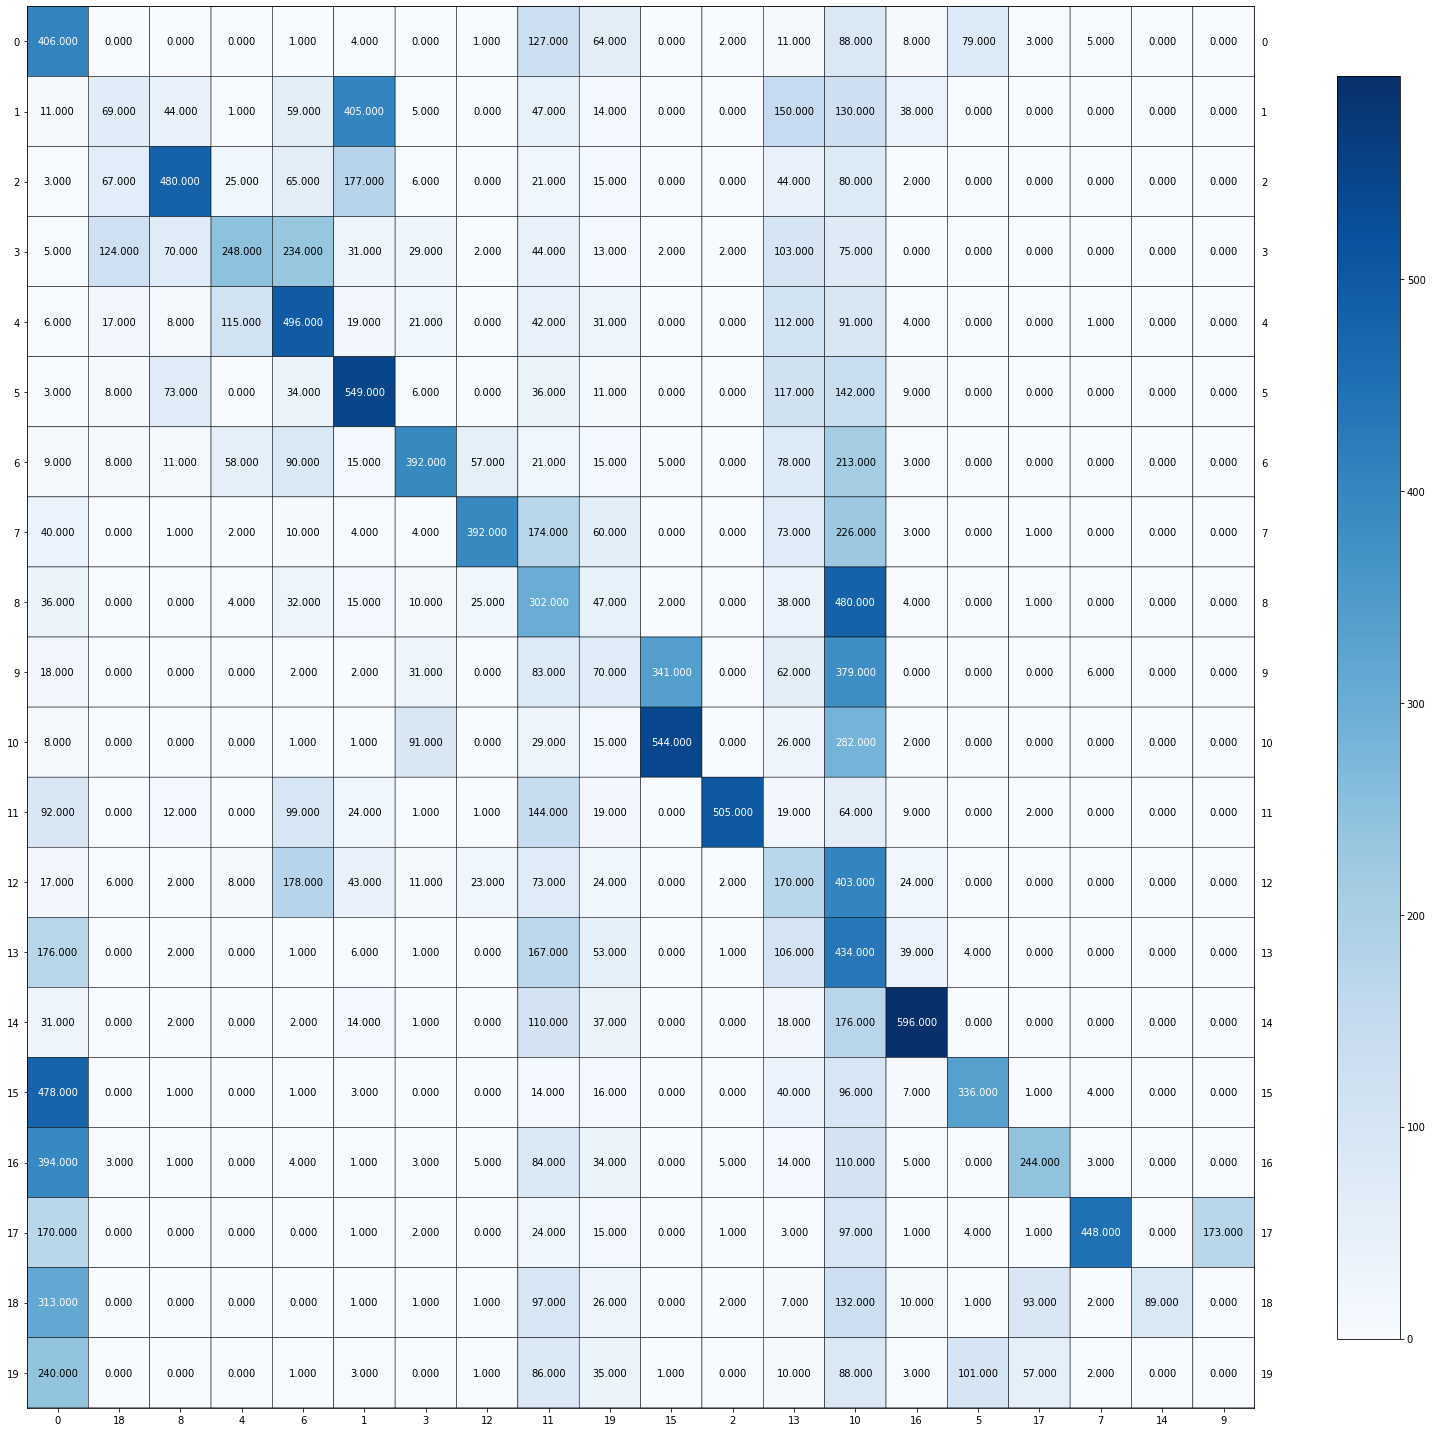

In [ ]:
svd = TruncatedSVD(n_components=best_svd_agg_component, random_state=42)
data_svd =svd.fit_transform(data_tfidf)

agg = AgglomerativeClustering(n_clusters=best_svd_agg_cluster, linkage='ward')
data_agg = agg.fit_predict(data_svd)

cm = confusion_matrix(data.target, data_agg)
rows, cols = linear_sum_assignment(cm, maximize=True)
print("Contigency Matrix for best Agglomerative clustering with SVD")
plot_mat(cm[rows[:, np.newaxis], cols], xticklabels=cols,yticklabels=rows, size=(20,20))

### Agglomerative and NMF

In [ ]:
components = [5,20,200]
cluster_size=[20]
nmf_agg_hs = [[None for _ in range(3)] for _ in range(1)]
nmf_agg_cs = [[None for _ in range(3)] for _ in range(1)]
nmf_agg_vms = [[None for _ in range(3)] for _ in range(1)]
nmf_agg_aris = [[None for _ in range(3)] for _ in range(1)]
nmf_agg_amis = [[None for _ in range(3)] for _ in range(1)]

c1=0
for i in cluster_size:
  c2=0
  for r in components:
    print("Agglomerative Cluster_Size",i)
    print("NMF Component Numbers",r)
    nmf = NMF(n_components=r, init='random', random_state=42, max_iter=1000)
    data_nmf =nmf.fit_transform(data_tfidf)

    agg = AgglomerativeClustering(n_clusters=i, linkage='ward')
    data_agg = agg.fit_predict(data_nmf)

    nmf_agg_hs[c1][c2]=homogeneity_score(data.target, data_agg)
    nmf_agg_cs[c1][c2]= completeness_score(data.target, data_agg)
    nmf_agg_vms[c1][c2]= v_measure_score(data.target, data_agg)
    nmf_agg_aris[c1][c2]=adjusted_rand_score(data.target, data_agg)
    nmf_agg_amis[c1][c2]=adjusted_mutual_info_score(data.target, data_agg)

    c2 = c2+1

    print("Homogeneity score for Agglomerative number of clusters: ",i,"and number of components for NMF r: ",r,"is:",homogeneity_score(data.target, data_agg))
    print("Completeness score for Agglomerative number of clusters: ",i,"and number of components for NMF r: ",r,"is:",(completeness_score(data.target, data_agg)))
    print("V-measure score for for Agglomerative number of clusters: ",i,"and number of components for NMF r: ",r,"is:",(v_measure_score(data.target, data_agg)))
    print("Adjusted Rand Index score for Agglomerative number of clusters: ",i,"and number of components for NMF r: ",r,"is:",(adjusted_rand_score(data.target, data_agg)))
    print("Adjusted mutual information score for Agglomerative number of clusters: ",i,"and number of components for NMF r: ",r,"is:",(adjusted_mutual_info_score(data.target, data_agg)))
  c1= c1+1


Agglomerative Cluster_Size 20
NMF Component Numbers 5
Homogeneity score for Agglomerative number of clusters:  20 and number of components for NMF r:  5 is: 0.2716107553377085
Completeness score for Agglomerative number of clusters:  20 and number of components for NMF r:  5 is: 0.2981826591319834
V-measure score for for Agglomerative number of clusters:  20 and number of components for NMF r:  5 is: 0.2842771264768713
Adjusted Rand Index score for Agglomerative number of clusters:  20 and number of components for NMF r:  5 is: 0.09885699946876714
Adjusted mutual information score for Agglomerative number of clusters:  20 and number of components for NMF r:  5 is: 0.28185074708101315
Agglomerative Cluster_Size 20
NMF Component Numbers 20
Homogeneity score for Agglomerative number of clusters:  20 and number of components for NMF r:  20 is: 0.361414804564651
Completeness score for Agglomerative number of clusters:  20 and number of components for NMF r:  20 is: 0.4156386916239138
V-meas

In [ ]:
average_nmf_agg = [[0 for _ in range(3)] for _ in range(1)]
best_nmf_agg = 0
best_nmf_agg_component = 0
best_nmf_agg_cluster = 0

In [ ]:
for j in range(len(cluster_size)):
  for i in range(len(components)):
    average_nmf_agg[j][i]= ((nmf_agg_hs[j][i] + nmf_agg_cs[j][i] + nmf_agg_vms[j][i] + nmf_agg_aris[j][i] + nmf_agg_amis[j][i]) / 5)
    if(average_nmf_agg[j][i] > best_nmf_agg):
      best_nmf_agg= average_nmf_agg[j][i]
      best_nmf_agg_component = components[i]
      best_nmf_agg_cluster = cluster_size[j]

In [ ]:
print('Best Average Agglomerative Clustering NMF values: ',best_nmf_agg)
print('Number of principal components for Best Agglomerative Clustering NMF ',best_nmf_agg_component)
print('Number of clusters for Best Agglomerative Clustering NMF ',best_nmf_agg_cluster)

Best Average Agglomerative Clustering NMF values:  0.3395559351612909
Number of principal components for Best Agglomerative Clustering NMF  20
Number of clusters for Best Agglomerative Clustering NMF  20


Contigency Matrix for best Agglomerative clustering with NMF


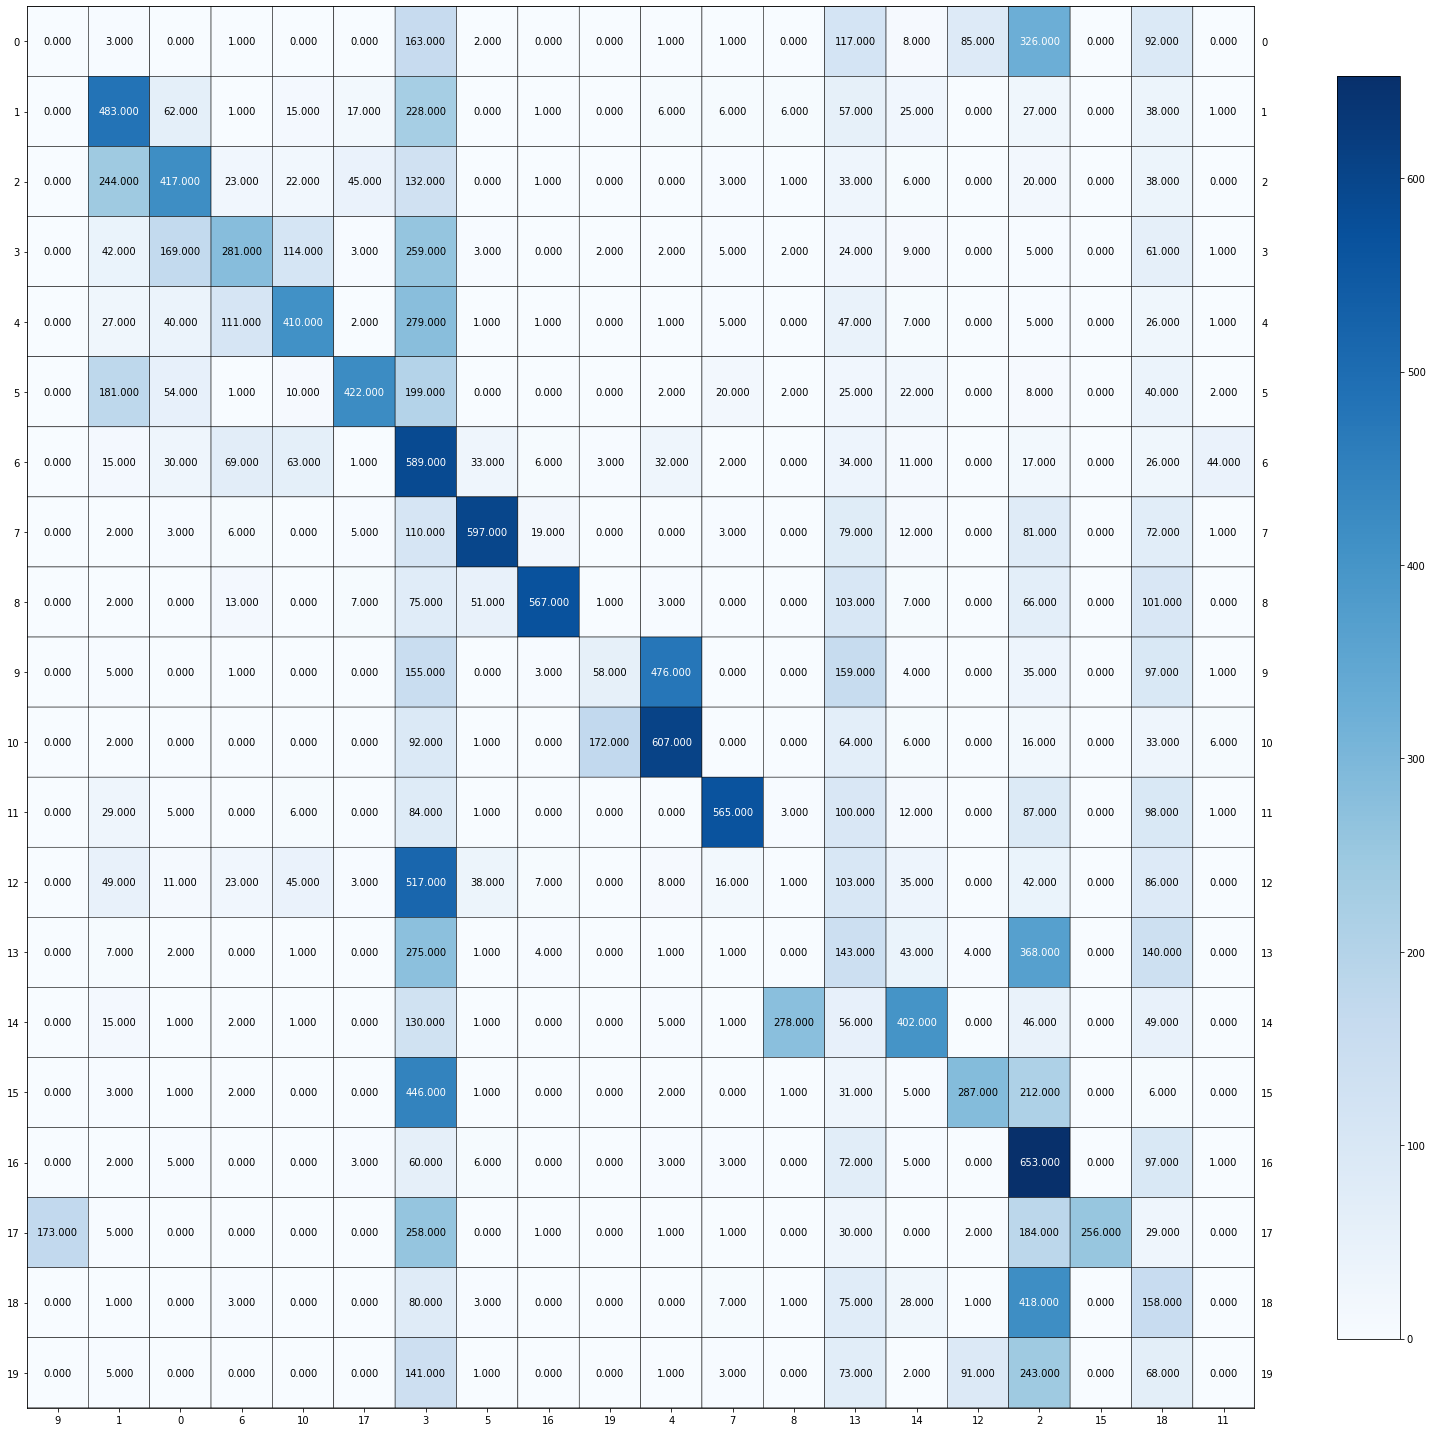

In [ ]:
nmf = NMF(n_components=best_nmf_agg_component, init='random', random_state=42, max_iter=1000)
data_nmf =nmf.fit_transform(data_tfidf)

agg = AgglomerativeClustering(n_clusters=best_nmf_agg_cluster, linkage='ward')
data_agg = agg.fit_predict(data_nmf)

cm = confusion_matrix(data.target, data_agg)
rows, cols = linear_sum_assignment(cm, maximize=True)
print("Contigency Matrix for best Agglomerative clustering with NMF")
plot_mat(cm[rows[:, np.newaxis], cols], xticklabels=cols,yticklabels=rows, size=(20,20))

### Agglomerative and UMAP

In [ ]:
components = [5,20,200]
umap_linkage_hs = []
umap_linkage_cs = []
umap_linkage_vms = []
umap_linkage_aris = []
umap_linkage_amis = []

umap_ward_hs = []
umap_ward_cs = []
umap_ward_vms = []
umap_ward_aris = []
umap_ward_amis = []


for r in components:
    print(r)
    umap_ward_hs.append(homogeneity_score(data.target, agg_ward))
    umap_ward_cs.append(completeness_score(data.target, agg_ward))
    umap_ward_vms.append(v_measure_score(data.target, agg_ward))
    umap_ward_aris.append(adjusted_rand_score(data.target, agg_ward))
    umap_ward_amis.append(adjusted_mutual_info_score(data.target, agg_ward))

    print("Homogeneity score for Ward and r: ",r,"is:",homogeneity_score(data.target, agg_ward))
    print("Completeness score Ward and r: ",r,"is:",(completeness_score(data.target, agg_ward)))
    print("V-measure score for Ward and r: ",r,"is:",(v_measure_score(data.target, agg_ward)))
    print("Adjusted Rand Index score for Ward and r: ",r,"is:",(adjusted_rand_score(data.target, agg_ward)))
    print("Adjusted mutual information score for Ward and r: ",r,"is:",(adjusted_mutual_info_score(data.target, agg_ward)))

5
Homogeneity score for Ward and r:  5 is: 0.5581261201222677
Completeness score Ward and r:  5 is: 0.5841421774465988
V-measure score for Ward and r:  5 is: 0.5708378807184529
Adjusted Rand Index score for Ward and r:  5 is: 0.42741165149002364
Adjusted mutual information score for Ward and r:  5 is: 0.5694078427389649
20
Homogeneity score for Ward and r:  20 is: 0.5581261201222677
Completeness score Ward and r:  20 is: 0.5841421774465988
V-measure score for Ward and r:  20 is: 0.5708378807184529
Adjusted Rand Index score for Ward and r:  20 is: 0.42741165149002364
Adjusted mutual information score for Ward and r:  20 is: 0.5694078427389649
200
Homogeneity score for Ward and r:  200 is: 0.5581261201222677
Completeness score Ward and r:  200 is: 0.5841421774465988
V-measure score for Ward and r:  200 is: 0.5708378807184529
Adjusted Rand Index score for Ward and r:  200 is: 0.42741165149002364
Adjusted mutual information score for Ward and r:  200 is: 0.5694078427389649


In [ ]:
average_umap_ward = []
best_umap_ward = 0
best_umap_ward_component = 0

In [ ]:
for i in range(len(components)):
  average_umap_ward.append((umap_ward_hs[i] + umap_ward_cs[i] + umap_ward_vms[i] + umap_ward_aris[i] + umap_ward_amis[i]) / 5)
  if(average_umap_ward[i] > best_umap_ward):
    best_umap_ward = average_umap_ward[i]
    best_umap_ward_component = components[i]

In [ ]:
print('Best Average Ward Agglomerative UMAP values: ',best_umap_ward)
print('Number of principal components for Best Ward Agglomerative UMAP ',best_umap_ward_component)

Best Average Ward Agglomerative UMAP values:  0.5419851345032616
Number of principal components for Best Ward Agglomerative UMAP  5


Contigency Matrix for Ward Agglomerative clustering and r: 200


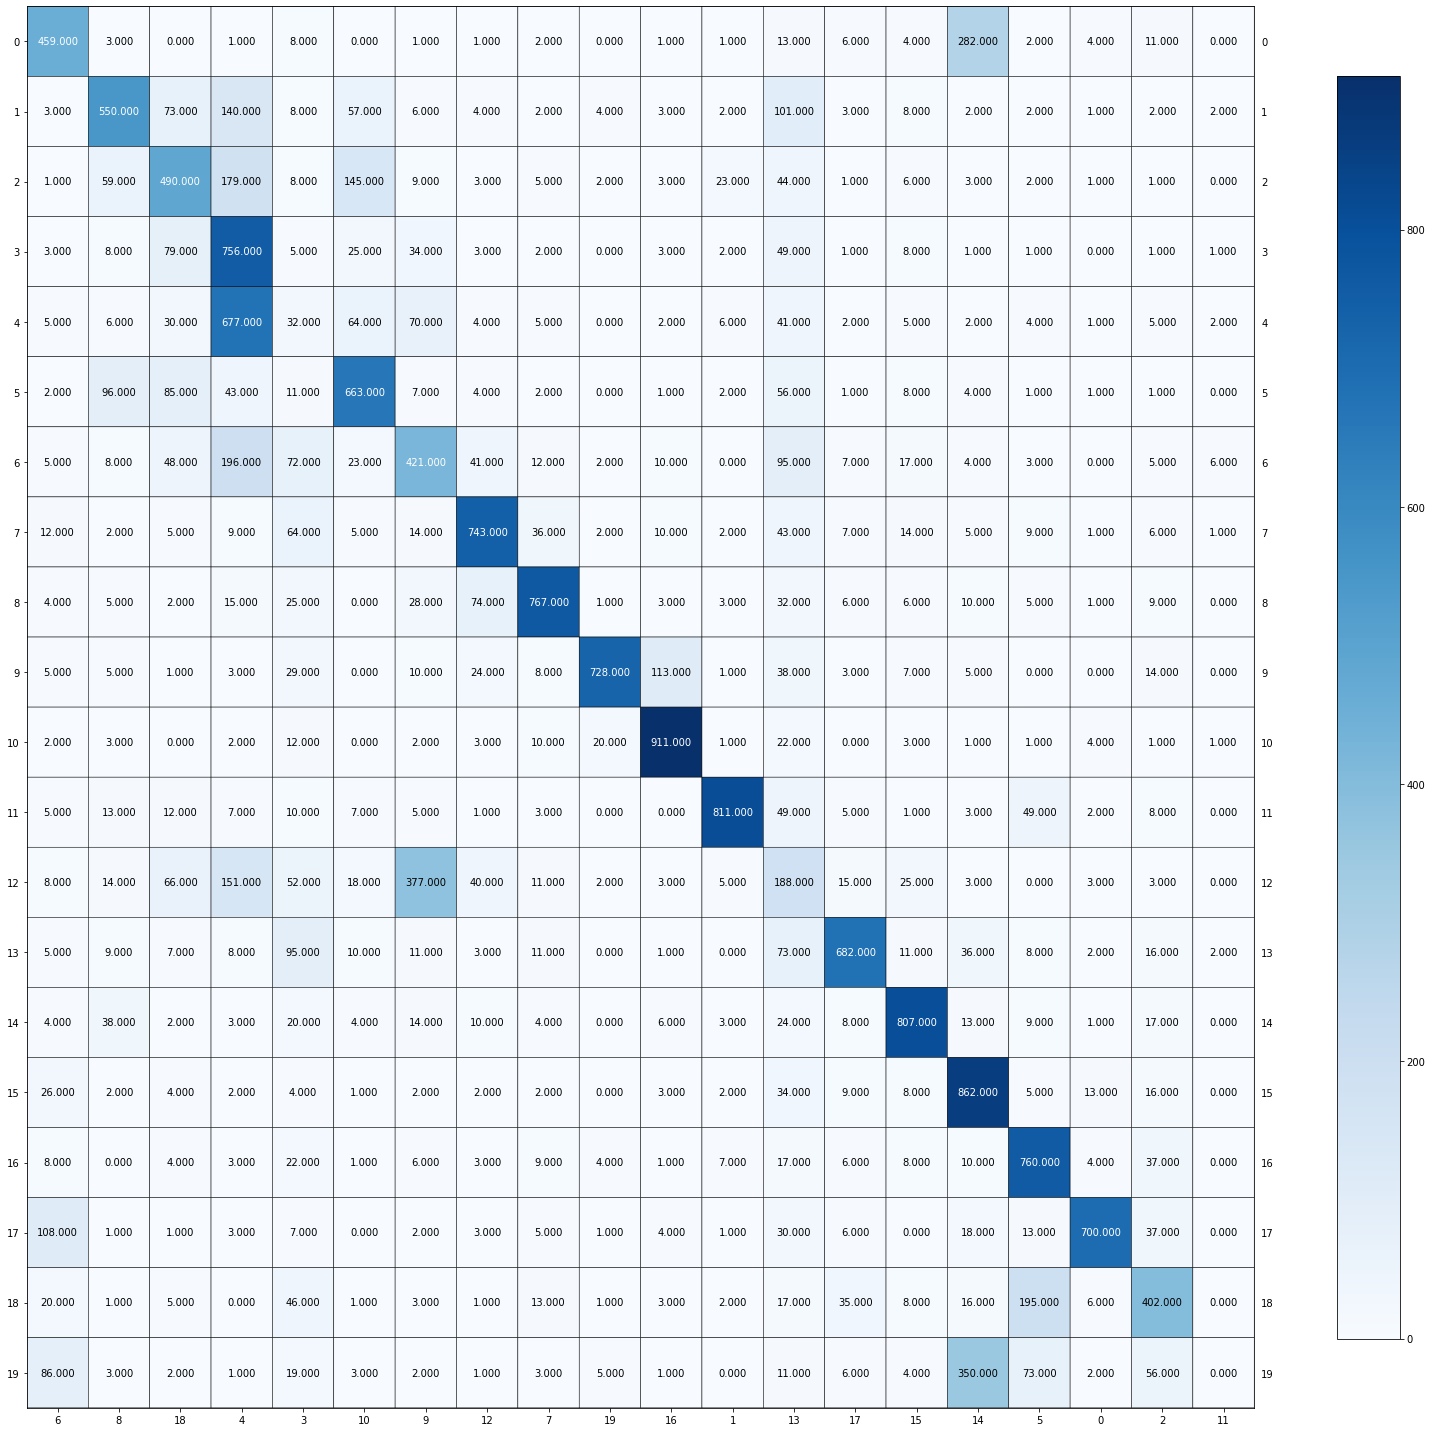

In [ ]:
umap_all = umap.UMAP(n_components=best_umap_ward_component, metric='cosine')
data_umap = umap_all.fit_transform(data_tfidf)

agg_ward = AgglomerativeClustering(n_clusters=20, linkage='ward').fit_predict(data_umap)


cm = confusion_matrix(data.target, agg_ward)
rows, cols = linear_sum_assignment(cm, maximize=True)
print("Contigency Matrix for Ward Agglomerative clustering and r:",r)
plot_mat(cm[rows[:, np.newaxis], cols], xticklabels=cols,yticklabels=rows, size=(20,20))

### HDBSCAN and SVD

In [ ]:
components = [5,20,200]
cluster_size=[100,200]
svd_hdbscan_hs = [[None for _ in range(3)] for _ in range(2)]
svd_hdbscan_cs = [[None for _ in range(3)] for _ in range(2)]
svd_hdbscan_vms = [[None for _ in range(3)] for _ in range(2)]
svd_hdbscan_aris = [[None for _ in range(3)] for _ in range(2)]
svd_hdbscan_amis = [[None for _ in range(3)] for _ in range(2)]

c1=0
for i in cluster_size:
  c2=0
  for r in components:
    print("Hdbscan Cluster_Size",i)
    print("SVD Component Numbers",r)
    svd = TruncatedSVD(n_components=r, random_state=42)
    data_svd =svd.fit_transform(data_tfidf)

    hdbscan_clust = hdbscan.HDBSCAN(min_cluster_size=i).fit_predict(data_svd)

    svd_hdbscan_hs[c1][c2]=homogeneity_score(data.target, hdbscan_clust)
    svd_hdbscan_cs[c1][c2]= completeness_score(data.target, hdbscan_clust)
    svd_hdbscan_vms[c1][c2]= v_measure_score(data.target, hdbscan_clust)
    svd_hdbscan_aris[c1][c2]=adjusted_rand_score(data.target, hdbscan_clust)
    svd_hdbscan_amis[c1][c2]=adjusted_mutual_info_score(data.target, hdbscan_clust)

    c2 = c2+1

    print("Homogeneity score for HDBSCAN number of clusters: ",i,"and number of components for SVD r: ",r,"is:",homogeneity_score(data.target, hdbscan_clust))
    print("Completeness score for HDBSCAN number of clusters: ",i,"and number of components for SVD r: ",r,"is:",(completeness_score(data.target, hdbscan_clust)))
    print("V-measure score for for HDBSCAN number of clusters: ",i,"and number of components for SVD r: ",r,"is:",(v_measure_score(data.target, hdbscan_clust)))
    print("Adjusted Rand Index score for HDBSCAN number of clusters: ",i,"and number of components for SVD r: ",r,"is:",(adjusted_rand_score(data.target, hdbscan_clust)))
    print("Adjusted mutual information score for HDBSCAN number of clusters: ",i,"and number of components for SVD r: ",r,"is:",(adjusted_mutual_info_score(data.target, hdbscan_clust)))
  c1= c1+1

Hdbscan Cluster_Size 100
SVD Component Numbers 5
Homogeneity score for HDBSCAN number of clusters:  100 and number of components for SVD r:  5 is: 0.0
Completeness score for HDBSCAN number of clusters:  100 and number of components for SVD r:  5 is: 1.0
V-measure score for for HDBSCAN number of clusters:  100 and number of components for SVD r:  5 is: 0.0
Adjusted Rand Index score for HDBSCAN number of clusters:  100 and number of components for SVD r:  5 is: 0.0
Adjusted mutual information score for HDBSCAN number of clusters:  100 and number of components for SVD r:  5 is: -1.6056889920887454e-16
Hdbscan Cluster_Size 100
SVD Component Numbers 20
Homogeneity score for HDBSCAN number of clusters:  100 and number of components for SVD r:  20 is: 0.0
Completeness score for HDBSCAN number of clusters:  100 and number of components for SVD r:  20 is: 1.0
V-measure score for for HDBSCAN number of clusters:  100 and number of components for SVD r:  20 is: 0.0
Adjusted Rand Index score for HD

In [ ]:
average_svd_hdbscan = [[0 for _ in range(3)] for _ in range(2)]
best_svd_hdbscan = 0
best_svd_hdbscan_component = 0
best_svd_hdbscan_cluster = 0

In [ ]:
for j in range(len(cluster_size)):
  for i in range(len(components)):
    average_svd_hdbscan[j][i]= ((svd_hdbscan_hs[j][i] + svd_hdbscan_cs[j][i] + svd_hdbscan_vms[j][i] + svd_hdbscan_aris[j][i] + svd_hdbscan_amis[j][i]) / 5)
    if(average_svd_hdbscan[j][i] > best_svd_hdbscan):
      best_svd_hdbscan= average_svd_hdbscan[j][i]
      best_svd_hdbscan_component = components[i]
      best_svd_hdbscan_cluster = cluster_size[j]

In [ ]:
print('Best Average HDBSCAN SVD values: ',best_svd_hdbscan)
print('Number of principal components for Best HDBSCAN SVD ',best_svd_hdbscan_component)
print('Number of clusters for Best HDBSCAN SVD ',best_svd_hdbscan_cluster)

Best Average HDBSCAN SVD values:  0.19999999999999998
Number of principal components for Best HDBSCAN SVD  5
Number of clusters for Best HDBSCAN SVD  100


Contigency Matrix for best HDBSCAN clustering with UMAP


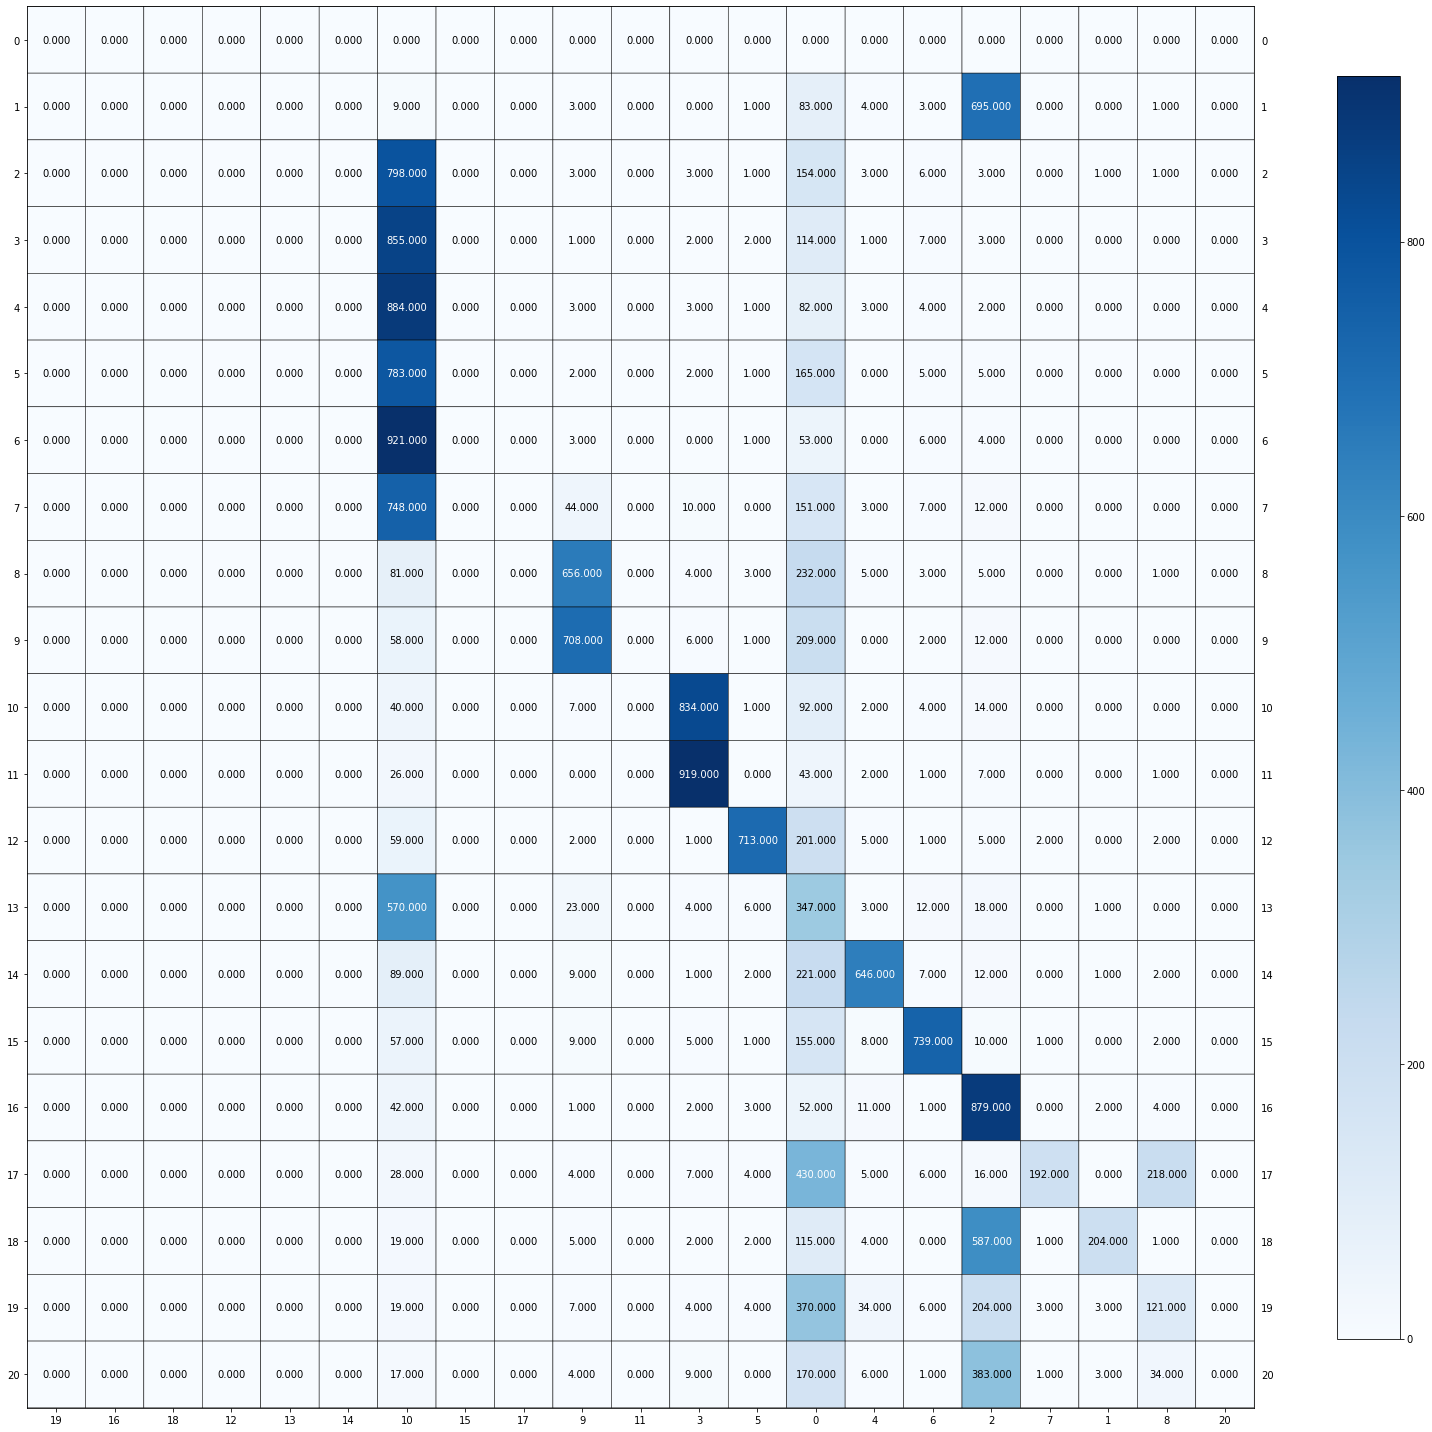

In [ ]:
umap_all = umap.UMAP(n_components=best_svd_hdbscan_component, metric='cosine')
data_umap = umap_all.fit_transform(data_tfidf)

hdbscan_best_clust = hdbscan.HDBSCAN(min_cluster_size=best_svd_hdbscan_cluster).fit_predict(data_umap)


cm = confusion_matrix(data.target, hdbscan_best_clust)
rows, cols = linear_sum_assignment(cm, maximize=True)
print("Contigency Matrix for best HDBSCAN clustering with UMAP")
plot_mat(cm[rows[:, np.newaxis], cols], xticklabels=cols,yticklabels=rows, size=(20,20))

### HDBSCAN and NMF

In [ ]:
components = [5,20,200]
cluster_size=[100,200]
nmf_hdbscan_hs = [[None for _ in range(3)] for _ in range(2)]
nmf_hdbscan_cs = [[None for _ in range(3)] for _ in range(2)]
nmf_hdbscan_vms = [[None for _ in range(3)] for _ in range(2)]
nmf_hdbscan_aris = [[None for _ in range(3)] for _ in range(2)]
nmf_hdbscan_amis = [[None for _ in range(3)] for _ in range(2)]

c1=0
for i in cluster_size:
  c2=0
  for r in components:
    print("Hdbscan Cluster_Size",i)
    print("NMF Component Numbers",r)
    nmf = NMF(n_components=r, init='random', random_state=42, max_iter=1000)
    data_nmf =nmf.fit_transform(data_tfidf)

    hdbscan_clust = hdbscan.HDBSCAN(min_cluster_size=i).fit_predict(data_nmf)

    nmf_hdbscan_hs[c1][c2]=homogeneity_score(data.target, hdbscan_clust)
    nmf_hdbscan_cs[c1][c2]= completeness_score(data.target, hdbscan_clust)
    nmf_hdbscan_vms[c1][c2]= v_measure_score(data.target, hdbscan_clust)
    nmf_hdbscan_aris[c1][c2]=adjusted_rand_score(data.target, hdbscan_clust)
    nmf_hdbscan_amis[c1][c2]=adjusted_mutual_info_score(data.target, hdbscan_clust)

    c2 = c2+1

    print("Homogeneity score for HDBSCAN number of clusters: ",i,"and number of components for NMF r: ",r,"is:",homogeneity_score(data.target, hdbscan_clust))
    print("Completeness score for HDBSCAN number of clusters: ",i,"and number of components for NMF r: ",r,"is:",(completeness_score(data.target, hdbscan_clust)))
    print("V-measure score for for HDBSCAN number of clusters: ",i,"and number of components for NMF r: ",r,"is:",(v_measure_score(data.target, hdbscan_clust)))
    print("Adjusted Rand Index score for HDBSCAN number of clusters: ",i,"and number of components for NMF r: ",r,"is:",(adjusted_rand_score(data.target, hdbscan_clust)))
    print("Adjusted mutual information score for HDBSCAN number of clusters: ",i,"and number of components for NMF r: ",r,"is:",(adjusted_mutual_info_score(data.target, hdbscan_clust)))
  c1= c1+1

Hdbscan Cluster_Size 100
NMF Component Numbers 5
Homogeneity score for HDBSCAN number of clusters:  100 and number of components for NMF r:  5 is: 0.05352509921582616
Completeness score for HDBSCAN number of clusters:  100 and number of components for NMF r:  5 is: 0.26201120551020535
V-measure score for for HDBSCAN number of clusters:  100 and number of components for NMF r:  5 is: 0.08889104398157056
Adjusted Rand Index score for HDBSCAN number of clusters:  100 and number of components for NMF r:  5 is: 0.005504626310355915
Adjusted mutual information score for HDBSCAN number of clusters:  100 and number of components for NMF r:  5 is: 0.08785902261704848
Hdbscan Cluster_Size 100
NMF Component Numbers 20
Homogeneity score for HDBSCAN number of clusters:  100 and number of components for NMF r:  20 is: 0.0
Completeness score for HDBSCAN number of clusters:  100 and number of components for NMF r:  20 is: 1.0
V-measure score for for HDBSCAN number of clusters:  100 and number of compo

In [ ]:
average_nmf_hdbscan = [[0 for _ in range(3)] for _ in range(2)]
best_nmf_hdbscan = 0
best_nmf_hdbscan_component = 0
best_nmf_hdbscan_cluster = 0

In [ ]:
for j in range(len(cluster_size)):
  for i in range(len(components)):
    average_nmf_hdbscan[j][i]= ((nmf_hdbscan_hs[j][i] + nmf_hdbscan_cs[j][i] + nmf_hdbscan_vms[j][i] + nmf_hdbscan_aris[j][i] + nmf_hdbscan_amis[j][i]) / 5)
    if(average_nmf_hdbscan[j][i] > best_nmf_hdbscan):
      best_nmf_hdbscan= average_nmf_hdbscan[j][i]
      best_nmf_hdbscan_component = components[i]
      best_nmf_hdbscan_cluster = cluster_size[j]

In [ ]:
print('Best Average HDBSCAN NMF values: ',best_nmf_hdbscan)
print('Number of principal components for Best HDBSCAN NMF ',best_nmf_hdbscan_component)
print('Number of clusters for Best HDBSCAN NMF ',best_nmf_hdbscan_cluster)

Best Average HDBSCAN NMF values:  0.19999999999999998
Number of principal components for Best HDBSCAN NMF  20
Number of clusters for Best HDBSCAN NMF  100


### HDBSCAN and UMAP

In [ ]:
components = [5,20,200]
cluster_size=[20,100,200]
umap_hdbscan_hs = [[None for _ in range(3)] for _ in range(3)]
umap_hdbscan_cs = [[None for _ in range(3)] for _ in range(3)]
umap_hdbscan_vms = [[None for _ in range(3)] for _ in range(3)]
umap_hdbscan_aris = [[None for _ in range(3)] for _ in range(3)]
umap_hdbscan_amis = [[None for _ in range(3)] for _ in range(3)]

c1=0
for i in cluster_size:
  c2=0
  for r in components:
    print("Cluster_Size",i)
    print("Umap Component Numbers",r)
    umap_all = umap.UMAP(n_components=r, metric='cosine')
    data_umap = umap_all.fit_transform(data_tfidf)

    hdbscan_clust = hdbscan.HDBSCAN(min_cluster_size=i).fit_predict(data_umap)

    umap_hdbscan_hs[c1][c2]=homogeneity_score(data.target, hdbscan_clust)
    umap_hdbscan_cs[c1][c2]= completeness_score(data.target, hdbscan_clust)
    umap_hdbscan_vms[c1][c2]= v_measure_score(data.target, hdbscan_clust)
    umap_hdbscan_aris[c1][c2]=adjusted_rand_score(data.target, hdbscan_clust)
    umap_hdbscan_amis[c1][c2]=adjusted_mutual_info_score(data.target, hdbscan_clust)

    c2 = c2+1

    print("Homogeneity score for HDBSCAN number of clusters: ",i,"and number of components r: ",r,"is:",homogeneity_score(data.target, hdbscan_clust))
    print("Completeness score for HDBSCAN number of clusters: ",i,"and number of components r: ",r,"is:",(completeness_score(data.target, hdbscan_clust)))
    print("V-measure score for for HDBSCAN number of clusters: ",i,"and number of components r: ",r,"is:",(v_measure_score(data.target, hdbscan_clust)))
    print("Adjusted Rand Index score for HDBSCAN number of clusters: ",i,"and number of components r: ",r,"is:",(adjusted_rand_score(data.target, hdbscan_clust)))
    print("Adjusted mutual information score for HDBSCAN number of clusters: ",i,"and number of components r: ",r,"is:",(adjusted_mutual_info_score(data.target, hdbscan_clust)))
  c1= c1+1

Cluster_Size 20
Umap Component Numbers 5
Homogeneity score for HDBSCAN number of clusters:  20 and number of components r:  5 is: 0.430917114056084
Completeness score for HDBSCAN number of clusters:  20 and number of components r:  5 is: 0.4480049803384388
V-measure score for for HDBSCAN number of clusters:  20 and number of components r:  5 is: 0.4392949373816441
Adjusted Rand Index score for HDBSCAN number of clusters:  20 and number of components r:  5 is: 0.07917173521282128
Adjusted mutual information score for HDBSCAN number of clusters:  20 and number of components r:  5 is: 0.42591218486922944
Cluster_Size 20
Umap Component Numbers 20
Homogeneity score for HDBSCAN number of clusters:  20 and number of components r:  20 is: 0.000390276104151654
Completeness score for HDBSCAN number of clusters:  20 and number of components r:  20 is: 0.10792763450387441
V-measure score for for HDBSCAN number of clusters:  20 and number of components r:  20 is: 0.000777739830615873
Adjusted Rand 

In [ ]:
average_umap_hdbscan = [[0 for _ in range(3)] for _ in range(3)]
best_umap_hdbscan = 0
best_umap_hdbscan_component = 0
best_umap_hdbscan_cluster = 0

In [ ]:
for j in range(len(cluster_size)):
  for i in range(len(components)):
    average_umap_hdbscan[j][i]= ((umap_hdbscan_hs[j][i] + umap_hdbscan_cs[j][i] + umap_hdbscan_vms[j][i] + umap_hdbscan_aris[j][i] + umap_hdbscan_amis[j][i]) / 5)
    if(average_umap_hdbscan[j][i] > best_umap_hdbscan):
      best_umap_hdbscan= average_umap_hdbscan[j][i]
      best_umap_hdbscan_component = components[i]
      best_umap_hdbscan_cluster = cluster_size[j]

In [ ]:
print('Best Average HDBSCAN UMAP values: ',best_umap_hdbscan)
print('Number of principal components for Best HDBSCAN UMAP ',best_umap_hdbscan_component)
print('Number of clusters for Best HDBSCAN UMAP ',best_umap_hdbscan_cluster)

Best Average HDBSCAN UMAP values:  0.44708136795768316
Number of principal components for Best HDBSCAN UMAP  200
Number of clusters for Best HDBSCAN UMAP  100


Contigency Matrix for best HDBSCAN clustering with UMAP


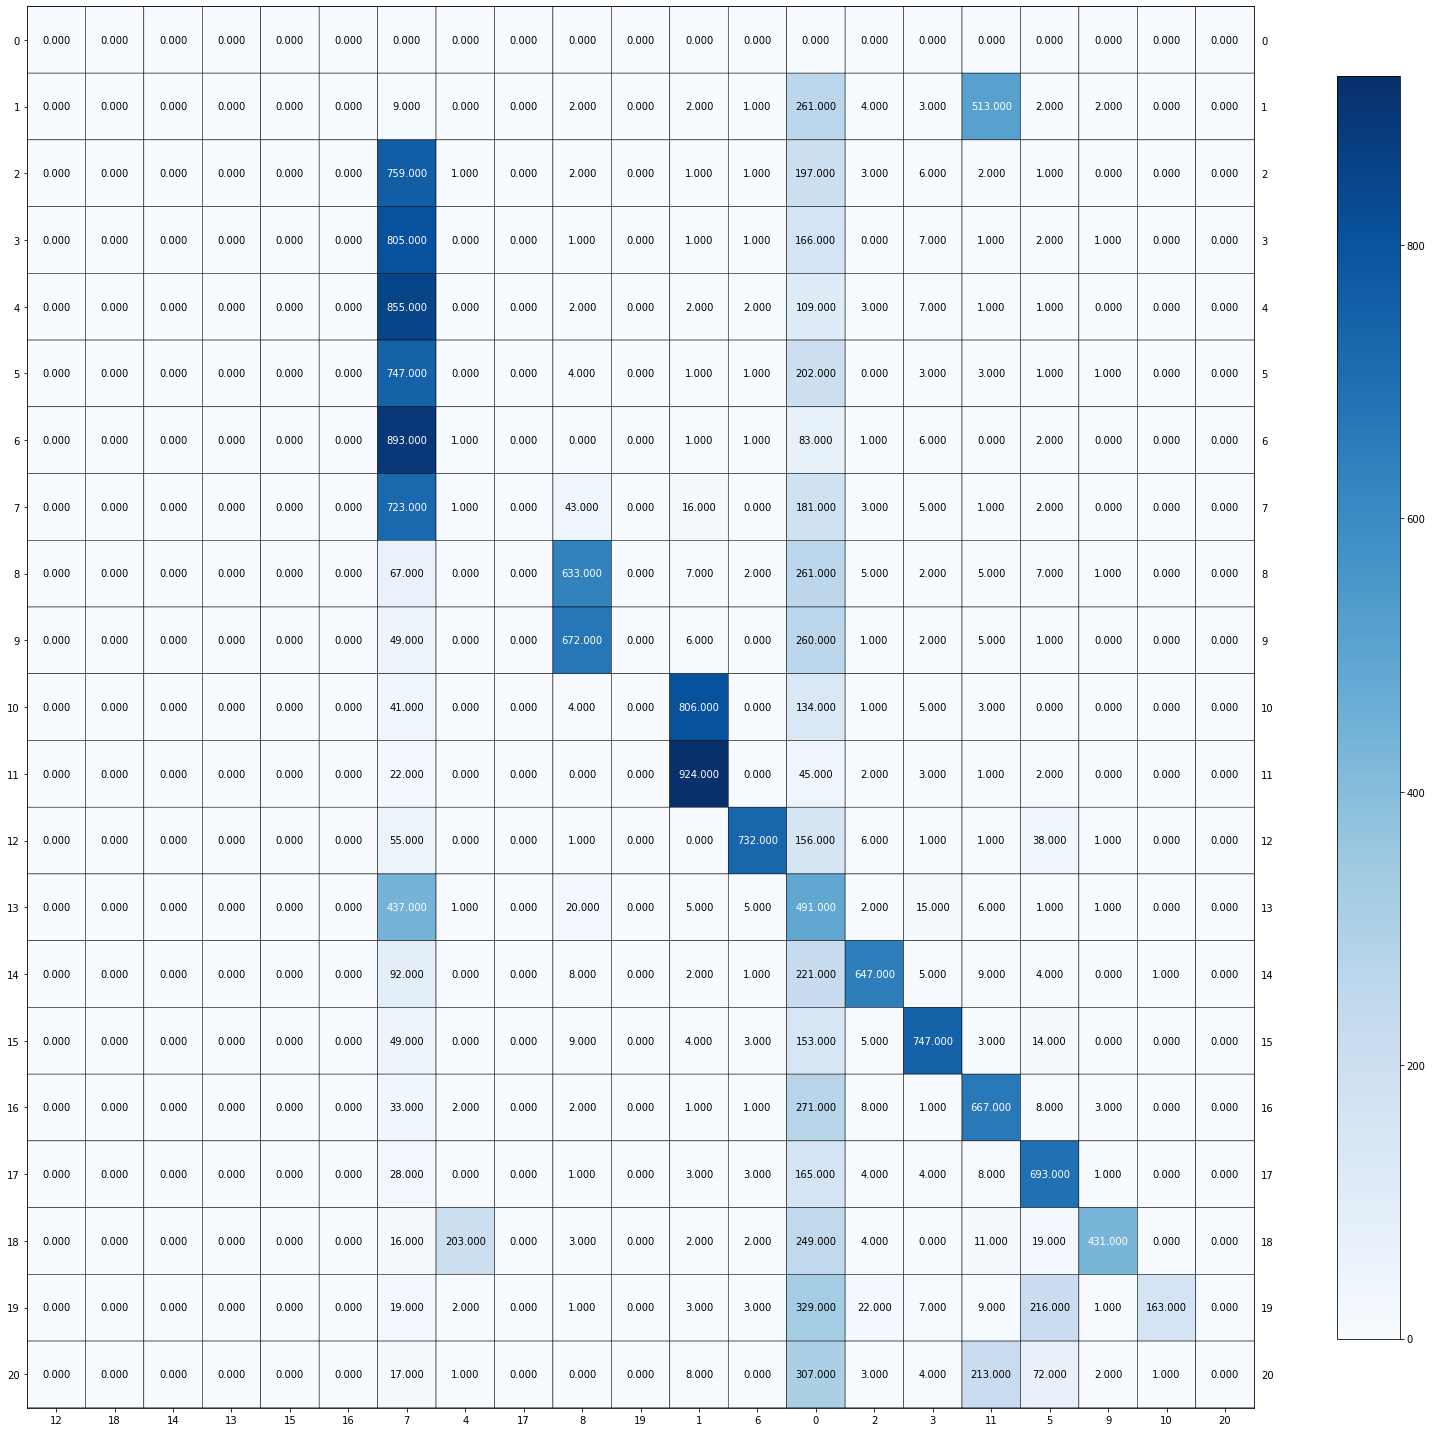

In [ ]:
umap_all = umap.UMAP(n_components=best_umap_hdbscan_component, metric='cosine')
data_umap = umap_all.fit_transform(data_tfidf)

hdbscan_best_clust = hdbscan.HDBSCAN(min_cluster_size=best_umap_hdbscan_cluster).fit_predict(data_umap)


cm = confusion_matrix(data.target, hdbscan_best_clust)
rows, cols = linear_sum_assignment(cm, maximize=True)
print("Contigency Matrix for best HDBSCAN clustering with UMAP")
plot_mat(cm[rows[:, np.newaxis], cols], xticklabels=cols,yticklabels=rows, size=(20,20))

### Only K-Means

In [ ]:
data = pd.DataFrame(data.data)

In [ ]:
r = [10,20,50]
kmeans_hs = []
kmeans_cs = []
kmeans_vms = []
kmeans_aris = []
kmeans_amis = []

for k in r:
    kmeans = KMeans(n_clusters=k, random_state=0, max_iter=1000, n_init=30)
    kmeans.fit(data_tfidf)
    kmeans_hs.append(homogeneity_score(data.target, kmeans.labels_))
    kmeans_cs.append(completeness_score(data.target, kmeans.labels_))
    kmeans_vms.append(v_measure_score(data.target, kmeans.labels_))
    kmeans_aris.append(adjusted_rand_score(data.target, kmeans.labels_))
    kmeans_amis.append(adjusted_mutual_info_score(data.target, kmeans.labels_))

In [ ]:
average_kmeans = []
best_kmeans = 0
best_k_kmeans = 0

In [ ]:
for i in range(len(r)):
  average_kmeans.append((kmeans_hs[i] + kmeans_cs[i] + kmeans_aris[i] + kmeans_amis[i] + kmeans_vms[i]) / 5)
  if(average_kmeans[i] > best_kmeans):
    best_kmeans = average_kmeans[i]
    best_k_kmeans = r[i]

In [ ]:
print('Best Average K-means values: ',best_kmeans)
print('Number of clusters for Best K-Means ',best_k_kmeans)

Best Average K-means values:  0.33907105823854683
Number of clusters for Best K-Means  50


Contigency Matrix for best K-means clustering


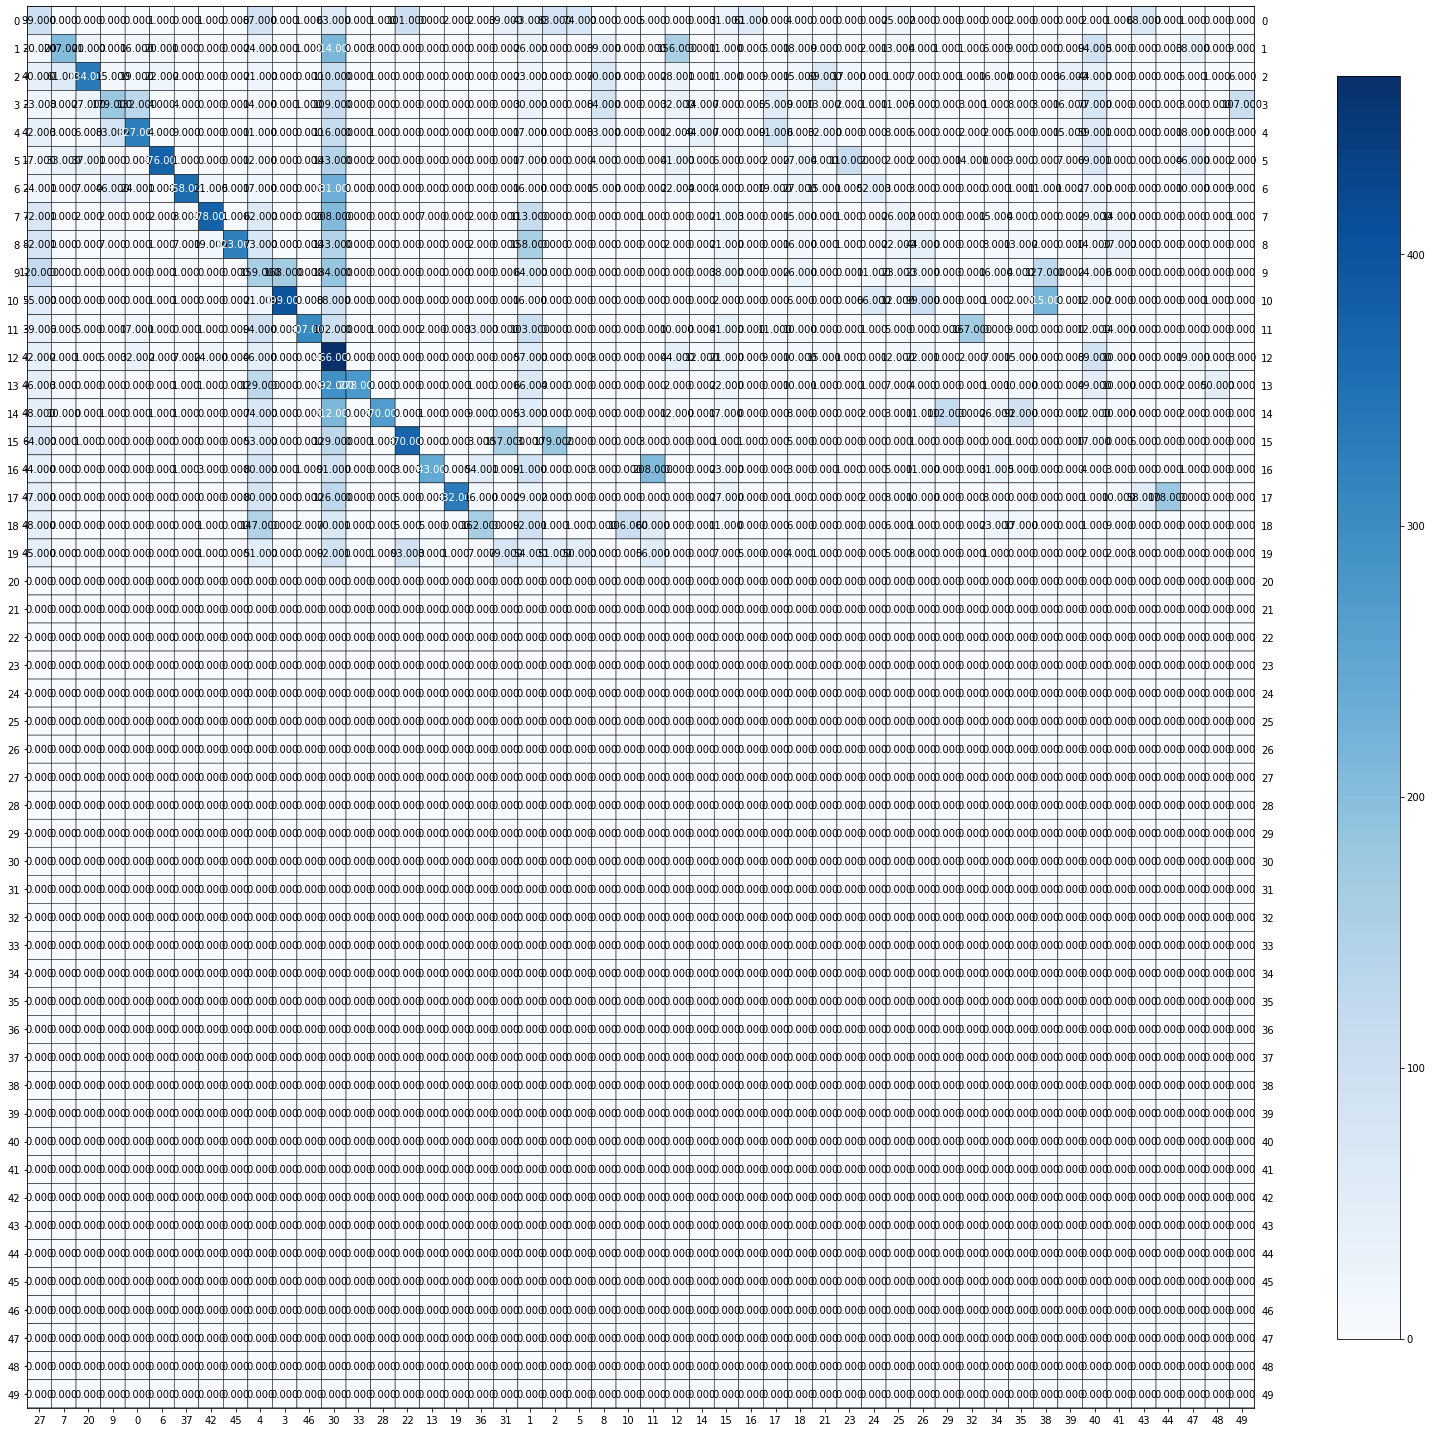

In [ ]:
kmeans = KMeans(n_clusters=best_k_kmeans, random_state=0, max_iter=1000, n_init=30)
kmeans_pred=kmeans.fit_predict(data_tfidf)


cm = confusion_matrix(data.target, kmeans_pred)
rows, cols = linear_sum_assignment(cm, maximize=True)
print("Contigency Matrix for best K-means clustering")
plot_mat(cm[rows[:, np.newaxis], cols], xticklabels=cols,yticklabels=rows, size=(20,20))

### Only Agglomerative

In [ ]:
r =[20]
agg_hs = []
agg_cs = []
agg_vms = []
agg_aris = []
agg_amis = []

for k in r:
    agg = AgglomerativeClustering(n_clusters=k, linkage='ward')
    data_agg = agg.fit(data_tfidf.toarray())
    agg_hs.append(homogeneity_score(data.target, data_agg.labels_))
    agg_cs.append(completeness_score(data.target, data_agg.labels_))
    agg_vms.append(v_measure_score(data.target, data_agg.labels_))
    agg_aris.append(adjusted_rand_score(data.target, data_agg.labels_))
    agg_amis.append(adjusted_mutual_info_score(data.target, data_agg.labels_))


In [ ]:
average_agg = []
best_agg = 0
best_k_agg = 0

In [ ]:
for i in range(len(r)):
  average_agg.append((agg_hs[i] + agg_cs[i] + agg_aris[i] + agg_amis[i] + agg_vms[i]) / 5)
  if(average_agg[i] > best_agg):
    best_agg = average_agg[i]
    best_k_agg = r[i]

In [ ]:
print('Best Average Agglomerative Clustering values: ',best_agg)
print('Number of clusters for Best Agglomerative Clustering ',best_k_agg)

Best Average Agglomerative Clustering values:  0.34378284551429156
Number of clusters for Best Agglomerative Clustering  20


### Only HDBSCAN

In [ ]:
r = [100,200]
hdbscan_hs = []
hdbscan_cs = []
hdbscan_vms = []
hdbscan_aris = []
hdbscan_amis = []

for k in r:
    hdbscan_cluster = hdbscan.HDBSCAN(min_cluster_size=k).fit_predict(data_tfidf)
    hdbscan_hs.append(homogeneity_score(data.target, hdbscan_cluster))
    hdbscan_cs.append(completeness_score(data.target, hdbscan_cluster))
    hdbscan_vms.append(v_measure_score(data.target, hdbscan_cluster))
    hdbscan_aris.append(adjusted_rand_score(data.target, hdbscan_cluster))
    hdbscan_amis.append(adjusted_mutual_info_score(data.target, hdbscan_cluster))



In [ ]:
average_hdbscan = []
best_hdbscan = 0
best_k_hdbscan = 0

In [ ]:
for i in range(len(r)):
  average_hdbscan.append((hdbscan_hs[i] + hdbscan_cs[i] + hdbscan_aris[i] + hdbscan_amis[i] + hdbscan_vms[i]) / 5)
  if(average_hdbscan[i] > best_hdbscan):
    best_hdbscan = average_hdbscan[i]
    best_k_hdbscan = r[i]

In [ ]:
print('Best Average HDBSCAN values: ',best_hdbscan)
print('Number of minimu clusters for Best HDBSCAN ',best_k_hdbscan)

Best Average HDBSCAN values:  0.19999999999999998
Number of minimu clusters for Best HDBSCAN  100


Contigency Matrix for best HDBSCAN clustering


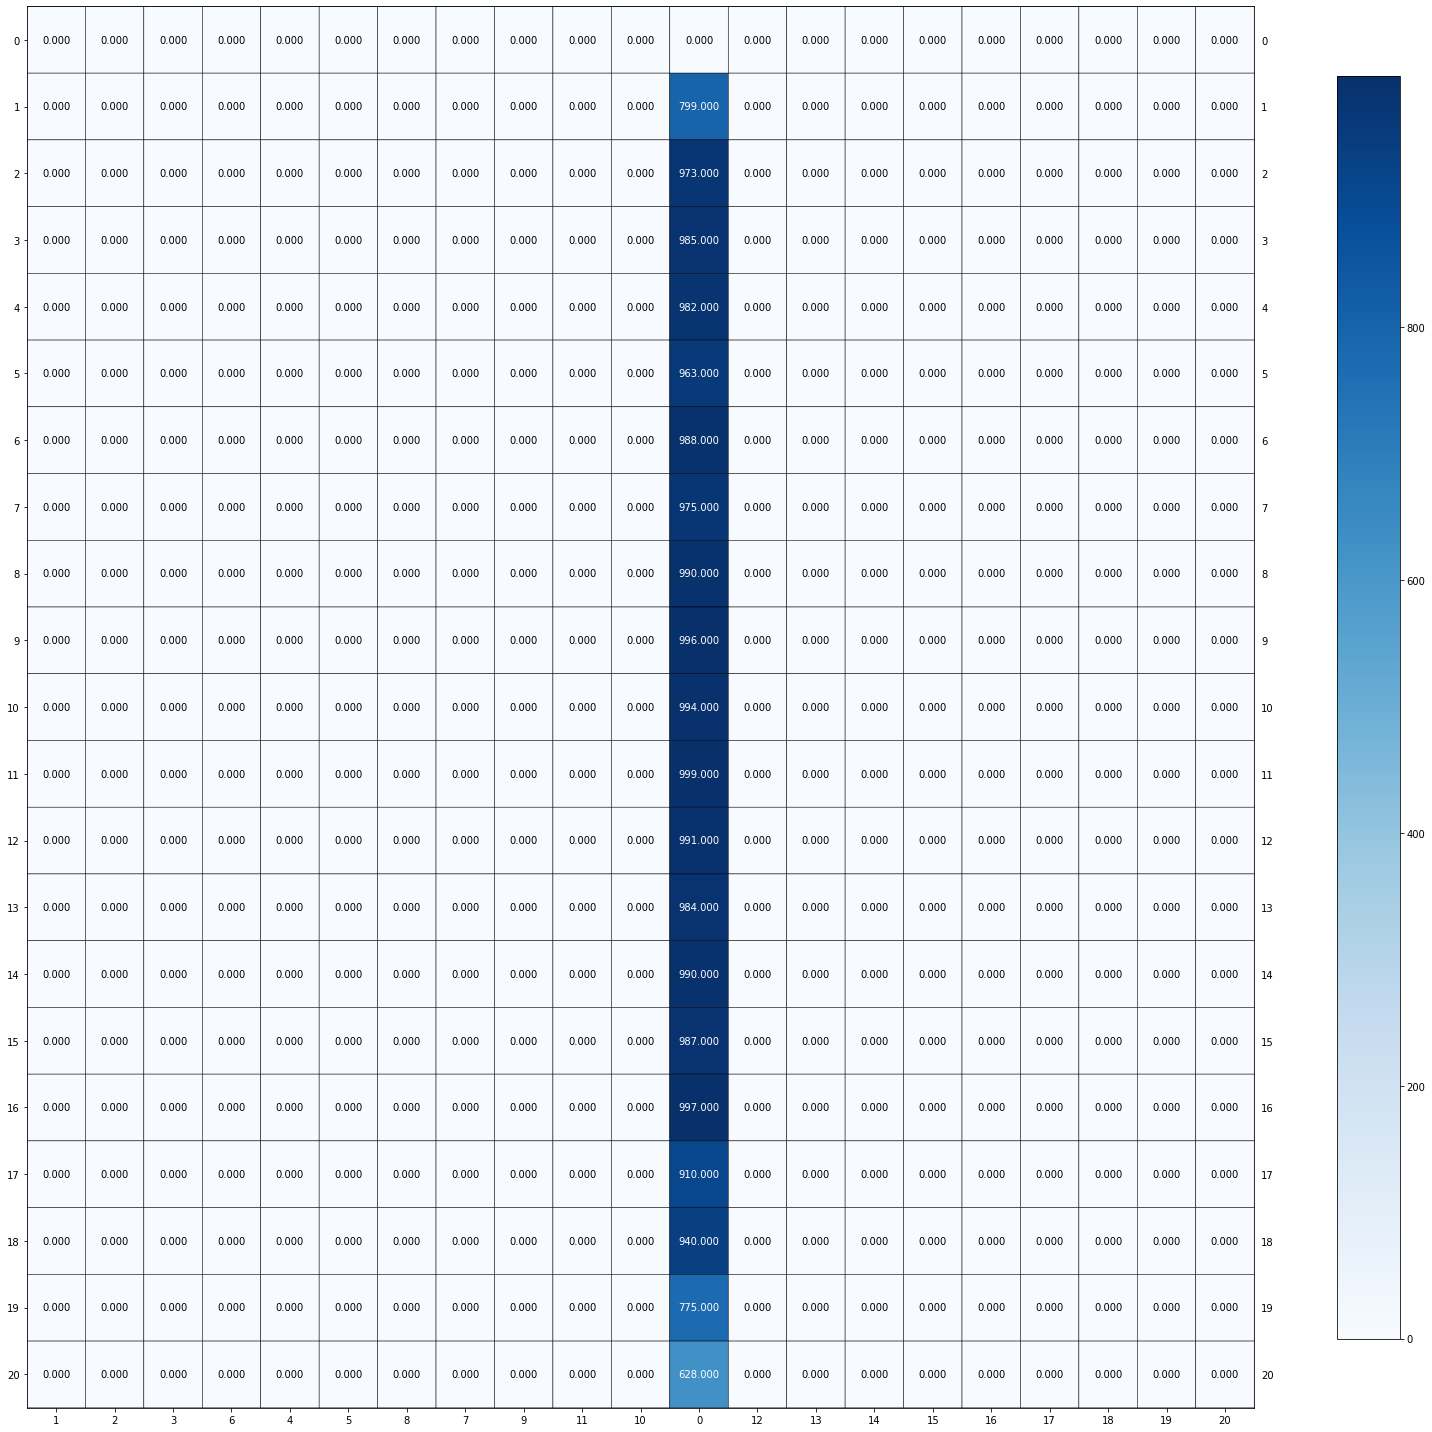

In [ ]:
hdbscan_cluster = hdbscan.HDBSCAN(min_cluster_size=best_k_hdbscan).fit_predict(data_tfidf)

cm = confusion_matrix(data.target, hdbscan_cluster)
rows, cols = linear_sum_assignment(cm, maximize=True)
print("Contigency Matrix for best HDBSCAN clustering")
plot_mat(cm[rows[:, np.newaxis], cols], xticklabels=cols,yticklabels=rows, size=(20,20))

### Best Results

In [ ]:
print('Best Average K-Means SVD values: ',best_svd_kmeans)
print('Best Average K-Means NMF values: ',best_nmf_kmeans)
print('Best Average K-Means UMAP values: ',best_umap_kmeans)
print('Best Average Agglomerative Clustering SVD values: ',best_svd_agg)
print('Best Average Agglomerative Clustering NMF values: ',best_nmf_agg)
print('Best Average Ward Agglomerative UMAP values: ',best_umap_ward)
print('Best Average HDBSCAN SVD values: ',best_svd_hdbscan)
print('Best Average HDBSCAN NMF values: ',best_nmf_hdbscan)
print('Best Average HDBSCAN UMAP values: ',best_umap_hdbscan)
print('Best Average HDBSCAN values: ',best_hdbscan)
print('Best Average Agglomerative Clustering values: ',best_agg)
print('Best Average K-means values: ',best_kmeans)


Best Average K-Means SVD values:  0.34169994830773764
Best Average K-Means NMF values:  0.32824046435310295
Best Average K-Means UMAP values:  0.5565895415418738
Best Average Agglomerative Clustering SVD values:  0.3352603035355667
Best Average Agglomerative Clustering NMF values:  0.3395559351612909
Best Average Ward Agglomerative UMAP values:  0.5419851345032616
Best Average HDBSCAN SVD values:  0.19999999999999998
Best Average HDBSCAN NMF values:  0.19999999999999998
Best Average HDBSCAN UMAP values:  0.44708136795768316
Best Average HDBSCAN values:  0.19999999999999998
Best Average Agglomerative Clustering values:  0.34378284551429156
Best Average K-means values:  0.33907105823854683


In [ ]:
## Best Result is for K means with cluster size 20 and UMAP reduction with

## Question 18
QUESTION 18: Extra credit: If you can find creative ways to further enhance the clustering performance, report your method and the results you obtain.

## Question 19

In a brief paragraph discuss: If the VGG network is trained on a dataset with
perhaps totally different classes as targets, why would one expect the features derived from such a
network to have discriminative power for a custom dataset?

## Question 20
In a brief paragraph explain how the helper code base is performing feature
extraction.

In [ ]:
import torch
import torch.nn as nn
from torchvision import transforms, datasets
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm
import requests
import os
import tarfile

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, adjusted_rand_score, adjusted_mutual_info_score
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin

filename = './flowers_features_and_labels.npz'

if os.path.exists(filename):
    file = np.load(filename)
    f_all, y_all = file['f_all'], file['y_all']

else:
    if not os.path.exists('./flower_photos'):
        # download the flowers dataset and extract its images
        url = 'http://download.tensorflow.org/example_images/flower_photos.tgz'
        with open('./flower_photos.tgz', 'wb') as file:
            file.write(requests.get(url).content)
        with tarfile.open('./flower_photos.tgz') as file:
            file.extractall('./')
        os.remove('./flower_photos.tgz')

    class FeatureExtractor(nn.Module):
        def __init__(self):
            super().__init__()

            vgg = torch.hub.load('pytorch/vision:v0.10.0', 'vgg16', pretrained=True)

            # Extract VGG-16 Feature Layers
            self.features = list(vgg.features)
            self.features = nn.Sequential(*self.features)
            # Extract VGG-16 Average Pooling Layer
            self.pooling = vgg.avgpool
            # Convert the image into one-dimensional vector
            self.flatten = nn.Flatten()
            # Extract the first part of fully-connected layer from VGG16
            self.fc = vgg.classifier[0]

        def forward(self, x):
            # It will take the input 'x' until it returns the feature vector called 'out'
            out = self.features(x)
            out = self.pooling(out)
            out = self.flatten(out)
            out = self.fc(out) 
            return out 

    # Initialize the model
    assert torch.cuda.is_available()
    feature_extractor = FeatureExtractor().cuda().eval()

    dataset = datasets.ImageFolder(root='./flower_photos',
                                   transform=transforms.Compose([transforms.Resize(224),
                                                                 transforms.CenterCrop(224),
                                                                 transforms.ToTensor(),
                                                                 transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])]))
    dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

    # Extract features and store them on disk
    f_all, y_all = np.zeros((0, 4096)), np.zeros((0,))
    for x, y in tqdm(dataloader):
        with torch.no_grad():
            f_all = np.vstack([f_all, feature_extractor(x.cuda()).cpu()])
            y_all = np.concatenate([y_all, y])
    np.savez(filename, f_all=f_all, y_all=y_all)

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

100%|██████████| 58/58 [00:44<00:00,  1.31it/s]


## Question 21
How many pixels are there in the original images? How many features does
the VGG network extract per image; i.e what is the dimension of each feature vector for an image
sample?

In [ ]:
import cv2

im = cv2.imread('/content/flower_photos/daisy/100080576_f52e8ee070_n.jpg')

print("The original shape of the image is",im.shape[0]*im.shape[1]*im.shape[2])

The original shape of the image is 252480


In [ ]:
print("The shape of the image after feature extraction is %d" %(f_all.shape[1]))
num_features = f_all.shape[1]

The shape of the image after feature extraction is 4096


## Question 22
Are the extracted features dense or sparse? (Compare with sparse TF-IDF
features in text.)

In [ ]:
#checking the number of time 0 was present in the feature vector to see if it a sparse matrix
import pandas as pd
import numpy as np
zeros = []
for i in range(f_all.shape[0]):
  zeros.append(pd.DataFrame(f_all[i][f_all[i] == 0]).value_counts())
print(sum(zeros))
print("So not a sparse matrix")

Series([], dtype: int64)

There are no zero values therefore it is a dense matrix

## Question 23
In order to inspect the high-dimensional features, t-SNE is a popular off-the-shelf
choice for visualizing Vision features. Map the features you have extracted onto 2 dimensions with
t-SNE. Then plot the mapped feature vectors along x and y axes. Color-code the data points with
ground-truth labels.

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


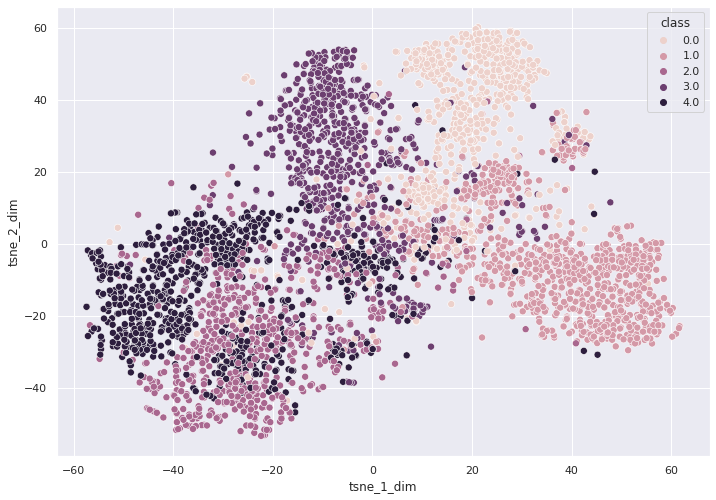

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
tsne_model = TSNE(n_components = 2)
tsne_output = tsne_model.fit_transform(f_all)
tsne_output_y = pd.DataFrame({'tsne_1_dim': tsne_output[:,0], 'tsne_2_dim': tsne_output[:,1], 'class': y_all})
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1_dim', y='tsne_2_dim', hue='class', data=tsne_output_y, ax=ax,s=50)

## Question 24
Report the best result (in terms of rand score) within the table below.
For HDBSCAN, introduce a conservative parameter grid over min cluster size and min samples

In [ ]:
class Autoencoder(torch.nn.Module, TransformerMixin):
    def __init__(self, n_components):
        super().__init__()
        self.n_components = n_components
        self.n_features = None  # to be determined with data
        self.encoder = None
        self.decoder = None
        
    def _create_encoder(self):
        return nn.Sequential(
            nn.Linear(4096, 1280),
            nn.ReLU(True),
            nn.Linear(1280, 640),
            nn.ReLU(True), nn.Linear(640, 120), nn.ReLU(True), nn.Linear(120, self.n_components))
    
    def _create_decoder(self):
        return nn.Sequential(
            nn.Linear(self.n_components, 120),
            nn.ReLU(True),
            nn.Linear(120, 640),
            nn.ReLU(True),
            nn.Linear(640, 1280),
            nn.ReLU(True), nn.Linear(1280, 4096))
    
    def forward(self, X):
        encoded = self.encoder(X)
        decoded = self.decoder(encoded)
        return decoded
    
    def fit(self, X):
        X = torch.tensor(X, dtype=torch.float32, device='cuda')
        self.n_features = X.shape[1]
        self.encoder = self._create_encoder()
        self.decoder = self._create_decoder()
        self.cuda()
        self.train()
        
        criterion = nn.MSELoss()
        optimizer = torch.optim.Adam(self.parameters(), lr=1e-3, weight_decay=1e-5)

        dataset = TensorDataset(X)
        dataloader = DataLoader(dataset, batch_size=128, shuffle=True)

        for epoch in tqdm(range(100)):
            for (X_,) in dataloader:
                X_ = X_.cuda()
                # ===================forward=====================
                output = self(X_)
                loss = criterion(output, X_)
                # ===================backward====================
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

        return self     
        
    def transform(self, X):
        X = torch.tensor(X, dtype=torch.float32, device='cuda')
        self.eval()
        with torch.no_grad():
            return self.encoder(X).cpu().numpy()
X_ae =Autoencoder(50).fit_transform(f_all)

In [ ]:
# doing PCA
import umap.umap_ as umap
import umap.plot
import plotly
import plotmat
from plotmat import plot_mat
from sklearn.metrics.cluster import contingency_matrix
from sklearn.metrics.cluster import homogeneity_score, completeness_score, adjusted_rand_score, adjusted_mutual_info_score,v_measure_score
from sklearn.cluster import KMeans
from sklearn.decomposition import NMF
from sklearn.decomposition import TruncatedSVD

svd_images = TruncatedSVD(n_components=50, random_state=42)
X_svd = svd_images.fit_transform(f_all)

# Using Umap
X_umap = umap.UMAP(n_components= 50, metric= "cosine").fit_transform(f_all)

X = {}
X['nothing'] = f_all
X['SVD'] = X_svd
X['UMAP'] = X_umap
X['Autoencoder'] = X_ae

In [ ]:
rand_scores = {}
rand_scores['kmeans']={}
rand_scores['ac']={}
from sklearn.cluster import AgglomerativeClustering
import hdbscan
for i in ['nothing', 'SVD', 'UMAP', 'Autoencoder']:
  data = X[i]
  for j in ['kmeans', 'ac']:
    if j == 'kmeans':
      model = KMeans(n_clusters=5, random_state=0, max_iter=1000, n_init=30)
      y_pred = model.fit_predict(data)
    else:
      model = AgglomerativeClustering(n_clusters = 5, linkage = 'ward')
      y_pred = model.fit_predict(data)
    rand_scores[j][i] = adjusted_rand_score(y_all, y_pred)
    print("Adjusted Rand Index score for %s dimensionality reduction technique and %s clustering technique is %0.4f" % (i, j, rand_scores[j][i]))
rand_scores_scan = {}
for i in ['nothing', 'SVD', 'UMAP', 'Autoencoder']:
  rand_scores_scan[i] = {}
  data = X[i]
  for j in [2, 3, 5, 7, 9, 11]:
    rand_scores_scan[i][j] = {}
    for k in [15, 30 , 45]:
      model = hdbscan.HDBSCAN(min_cluster_size= j, min_samples= k)
      y_pred = model.fit_predict(data)
      rand_scores_scan[i][j][k] = adjusted_rand_score(y_all, y_pred)
      print("Adjusted Rand Index score for %s dimensionality reduction technique and hdbscan clustering technique with min_cluster_size of %d and min_samples of %d is %0.4f" % (i, j, k, rand_scores_scan[i][j][k]))

Adjusted Rand Index score for nothing dimensionality reduction technique and kmeans clustering technique is 0.1961
Adjusted Rand Index score for nothing dimensionality reduction technique and ac clustering technique is 0.1886
Adjusted Rand Index score for SVD dimensionality reduction technique and kmeans clustering technique is 0.1933
Adjusted Rand Index score for SVD dimensionality reduction technique and ac clustering technique is 0.2173
Adjusted Rand Index score for UMAP dimensionality reduction technique and kmeans clustering technique is 0.4666
Adjusted Rand Index score for UMAP dimensionality reduction technique and ac clustering technique is 0.4540
Adjusted Rand Index score for Autoencoder dimensionality reduction technique and kmeans clustering technique is 0.2118
Adjusted Rand Index score for Autoencoder dimensionality reduction technique and ac clustering technique is 0.2048


In [ ]:
rand_scores_scan = {}
for i in ['nothing', 'SVD', 'UMAP', 'Autoencoder']:
  rand_scores_scan[i] = {}
  data = X[i]
  for j in [2, 3, 5, 7, 9, 11]:
    rand_scores_scan[i][j] = {}
    for k in [15, 30 , 45]:
      model = hdbscan.HDBSCAN(min_cluster_size= j, min_samples= k)
      y_pred = model.fit_predict(data)
      rand_scores_scan[i][j][k] = adjusted_rand_score(y_all, y_pred)
      print("Adjusted Rand Index score for %s dimensionality reduction technique and hdbscan clustering technique with min_cluster_size of %d and min_samples of %d is %0.4f" % (i, j, k, rand_scores_scan[i][j][k]))

Adjusted Rand Index score for nothing dimensionality reduction technique and hdbscan clustering technique with min_cluster_size of 2 and min_samples of 15 is -0.0018
Adjusted Rand Index score for nothing dimensionality reduction technique and hdbscan clustering technique with min_cluster_size of 2 and min_samples of 30 is -0.0008
Adjusted Rand Index score for nothing dimensionality reduction technique and hdbscan clustering technique with min_cluster_size of 2 and min_samples of 45 is 0.0000
Adjusted Rand Index score for nothing dimensionality reduction technique and hdbscan clustering technique with min_cluster_size of 3 and min_samples of 15 is -0.0018
Adjusted Rand Index score for nothing dimensionality reduction technique and hdbscan clustering technique with min_cluster_size of 3 and min_samples of 30 is 0.0000
Adjusted Rand Index score for nothing dimensionality reduction technique and hdbscan clustering technique with min_cluster_size of 3 and min_samples of 45 is 0.0000
Adjuste

## Question 25
Report the test accuracy of the MLP classifier on the original VGG features.
Report the same when using the reduced-dimension features (you have freedom in choosing the
dimensionality reduction algorithm and its parameters). Does the performance of the model suffer
with the reduced-dimension representations? Is it significant? Does the success in classification
make sense in the context of the clustering results obtained for the same features in Question 24.

In [ ]:
class MLP(torch.nn.Module):
    def __init__(self, num_features):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(num_features, 1280),
            nn.ReLU(True),
            nn.Linear(1280, 640),
            nn.ReLU(True), 
            nn.Linear(640, 5),
            nn.LogSoftmax(dim=1)
        )
        self.cuda()
    
    
    def forward(self, X):
        return self.model(X)
    
    def train(self, X, y):
        X = torch.tensor(X, dtype=torch.float32, device='cuda')
        y = torch.tensor(y, dtype=torch.int64, device='cuda')

        self.model.train()
        
        criterion = nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(self.parameters(), lr=1e-3, weight_decay=1e-5)

        dataset = TensorDataset(X, y)
        dataloader = DataLoader(dataset, batch_size=128, shuffle=True)

        for epoch in tqdm(range(100)):
            for (X_, y_) in dataloader:
                X_ = X_.cuda()
                # ===================forward=====================
                loss = criterion(self(X_),y_.cuda())
                # ===================backward====================
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
        return self
    
    def eval(self, X_test, y_test):
        X_test = torch.tensor(X_test,dtype=torch.float32, device='cuda')
        y_test = torch.tensor(y_test,dtype=torch.float32, device='cuda')
        logits = self(X_test).argmax(dim = 1)
        accuracy = torch.sum(logits == y_test)/X_test.shape[0]
        with torch.no_grad():
          accuracy = accuracy.cpu().numpy()
        return accuracy

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(f_all, y_all, test_size=0.2, random_state=42)
mlp = MLP(4096)
print("Using original VGG extracted features.\n")
mlp.train(X_train, y_train)
accuracy = mlp.eval(X_test, y_test)
print(f"\nAccuracy: {accuracy}")

Using original VGG extracted features.



100%|██████████| 100/100 [00:08<00:00, 11.45it/s]



Accuracy: 0.9155313372612


In [ ]:
# using the best model that was found using the grid search of different dimensionality reduction techniques in the last question
import umap.umap_ as umap
accuracies = {}
for i in ['umap', 'svd']:
  accuracies[i] = {}
  for j in [25, 50, 100]:
    if i == "umap" :
      X = umap.UMAP(n_components= j, metric= "cosine").fit_transform(f_all)
    else:
      X = TruncatedSVD(n_components= j, random_state=42).fit_transform(f_all)
    X_train, X_test, y_train, y_test = train_test_split(X, y_all, test_size=0.25, random_state=42)
    mlp = MLP(j)
    mlp.train(X_train, y_train)
    accuracies[i][j] = mlp.eval(X_test, y_test)
    print("Using %s with %d components the accuracy is %f" %(i, j, accuracies[i][j]))

100%|██████████| 100/100 [00:06<00:00, 15.95it/s]


Using umap with 25 components the accuracy is 0.846405


100%|██████████| 100/100 [00:06<00:00, 15.73it/s]


Using umap with 50 components the accuracy is 0.857298


100%|██████████| 100/100 [00:06<00:00, 15.92it/s]


Using umap with 100 components the accuracy is 0.832244


100%|██████████| 100/100 [00:06<00:00, 14.53it/s]


Using svd with 25 components the accuracy is 0.894336


100%|██████████| 100/100 [00:07<00:00, 14.15it/s]


Using svd with 50 components the accuracy is 0.899782


100%|██████████| 100/100 [00:06<00:00, 15.73it/s]

Using svd with 100 components the accuracy is 0.910675
